# Table of Contents
###  1. Import delle librerie e dei dati
###  2. Esplorazione del dataset con visualizzazioni e strumenti statistici
### 3  Preprocessing
###  3.1 Train Test split
###  3.2 Encoding
### 3.3 Scaling
### 4. Modelli
### 4.1 Modello 1
### 4.2 Modello 2

# 1. Import delle librerie e dei dati

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors as mcolors
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef, f1_score

Importo i dati tramite la libreria pandas come dataframe

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [172]:
train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Analizzo le colonne e controllo non ci siano elementi nulli

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In entrambi i dataframe 'Arrival Delay in Minutes' ha elementi nulli, anche se in numero basso.
Cerco di analizzare meglio la situazione.
Inoltre cerco di trasformare gli elementi categorici (object) in numerici (int64) usando la metodologia OneHotEncoder (attraverso la funzione getdummies di pandas) eliminando le colonne categoriche e sostituendole con colonne formate dalle possibili risposte categoriche. Ogni colonna risposta sarà riempita con 1 nelle rispettive caselle nelle quali quella risposta era vera nella colonna originale e 0 negli altri casi.

Per quanto riguarda la colonna satisfaction applico Label Encoding in quanto non posso dividerla in 2 colonne con One Hot Encoding essendo la colonna target per i modelli futuri.
Posso applicare il Label Encoding invece del One Hot Encoding in quanto gli algoritmi che si basano sulla distanza (es. KNN) non vengono influenzati dalla variabile target, ma solo dalle features.

In [6]:
train_null_count= pd.isnull(train[['Arrival Delay in Minutes']]).sum()
train_null_count
train_rows=train.shape[0]
train_null_count/train_rows*100

Arrival Delay in Minutes    0.298352
dtype: float64

In [7]:
test_null_count= pd.isnull(test[['Arrival Delay in Minutes']]).sum()
test_null_count
test_rows=test.shape[0]
test_null_count/test_rows*100

Arrival Delay in Minutes    0.319526
dtype: float64

In [8]:
train_null_row=train[train['Arrival Delay in Minutes'].isnull()]
train_null_row

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,satisfied


In [174]:
columns= train.columns.drop('satisfaction')
train_nosat_int64= pd.get_dummies(train[columns])
test_nosat_int64= pd.get_dummies(test[columns])
#Elimino i dati categorici per avere solo dati di tipo numerico tranne Costumer Satisfaction
#Mantengo anche la colonna 'Unnamed:0' per poter fare l'unione successiva dei 2 dataframe che ho usato per fare gli encoding
train_sat_int64=train[['Unnamed: 0','satisfaction']].apply(LabelEncoder().fit_transform)
test_sat_int64=test[['Unnamed: 0','satisfaction']].apply(LabelEncoder().fit_transform)
#Il Label Encoder ha inserito 0 come soddisfatto e 1 come insoddisfatto o neutrale

train_int64=pd.merge(left=train_nosat_int64, right=train_sat_int64, on='Unnamed: 0')
train_int64
test_int64=pd.merge(left=test_nosat_int64, right=test_sat_int64, on='Unnamed: 0')
test_int64

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0,19556,52,160,5,4,3,4,3,4,...,1,0,1,0,1,0,0,1,0,1
1,1,90035,36,2863,1,1,3,1,5,4,...,1,0,1,0,1,0,1,0,0,1
2,2,12360,20,192,2,0,2,4,2,2,...,0,1,0,1,1,0,0,1,0,0
3,3,77959,44,3377,0,0,0,2,3,4,...,0,1,1,0,1,0,1,0,0,1
4,4,36875,49,1182,2,3,4,3,4,1,...,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,526,3,3,3,1,4,3,...,0,1,0,1,1,0,1,0,0,0
25972,25972,71167,23,646,4,4,4,4,4,4,...,0,1,1,0,1,0,1,0,0,1
25973,25973,37675,17,828,2,5,1,5,2,1,...,1,0,1,0,0,1,0,1,0,0
25974,25974,90086,14,1127,3,3,3,3,4,4,...,0,1,1,0,1,0,1,0,0,1


In [214]:
corr_total=train_int64.corr()
corr_total.style.background_gradient(cmap="Spectral")

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045,-0.003978,0.003978,0.002844,-0.002844,-0.000856,0.000856,0.000983,-0.000559,-0.000823,-0.004731
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254,0.000606,-0.000606,-0.000145,0.000145,-0.000475,0.000475,0.104712,-0.080079,-0.048194,0.013734
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147,-0.008928,0.008928,0.281674,-0.281674,0.048524,-0.048524,0.138939,-0.132551,-0.013376,0.137167
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426,-0.005828,0.005828,0.225200,-0.225200,0.267344,-0.267344,0.466896,-0.404493,-0.123674,0.298780
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095,-0.008974,0.008974,0.007543,-0.007543,0.105085,-0.105085,0.032885,-0.037197,0.008034,0.284245
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864,-0.009142,0.009142,0.206869,-0.206869,-0.259763,0.259763,-0.096870,0.082321,0.028740,-0.051601
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984,-0.006951,0.006951,0.019509,-0.019509,0.133511,-0.133511,0.107436,-0.098039,-0.018914,0.171705
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143,-0.000333,0.000333,-0.006078,0.006078,0.030700,-0.030700,0.004526,-0.003488,-0.002031,0.000682
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524,-0.005772,0.005772,0.059454,-0.059454,0.063439,-0.063439,0.087114,-0.078801,-0.016671,0.209936
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949,0.042260,-0.042260,0.189262,-0.189262,0.224803,-0.224803,0.330549,-0.293103,-0.074608,0.503557


Dato che la soddisfazione è indicata con il numero 0, mentre la neutralità o insoddisfazione con il numero 1. Quando la correlazione è media/forte > 0,4 allora quella feature porta a insoddisfazione generalmente, mentre <0,4 porta a soddisfazione.

In [220]:
Satisfied_corr = -corr_total[(corr_total['satisfaction'] <= -0.4)] 
Satisfied_corr[['satisfaction']].style.background_gradient(cmap="Spectral")

,satisfaction
Type of Travel_Personal Travel,0.449000
Class_Eco,0.451118


In [218]:
No_Satisfied_corr = corr_total[(corr_total['satisfaction'] >= 0.4)] 
No_Satisfied_corr[['satisfaction']].style.background_gradient(cmap="Spectral")

,satisfaction
Online boarding,0.503557
Type of Travel_Business travel,0.449000
Class_Business,0.503848
satisfaction,1.000000


Ho provato a controllare se ci fossero correlazioni significative tra la colonna 'Arrival Delay in Minutes' e altre colonne del Dataframe. L'unica correlazione davvero significativa è con la colonna 'Departure Delay in Minutes', ma non sembrano esserci motivi per cui dato un valore di 'Departure Delay in Minutes' si trovi null in 'Arriving Delay in Minutes'. Molto probabilmente mancano solo per un motivo di errore nella segnalazione del dato.
Non avendo visto altre correlazioni significative e data la bassa percentuale di dati nulli sul campione ho deciso di eliminare i dati nulli sia nel train che nel test. Una possibile soluzione sarebbe potuta essere inserire come valore nullo lo stesso della colonna 'Departure Delay in Minutes' data la correlazione forte, nel caso mi fossero serviti ulteriori dati del campione.

In [11]:
train_null_row=train[train['Arrival Delay in Minutes'].isnull()]
train_null_row
train_nonull=train_int64.dropna(0,'any')
test_nonull=test_int64.dropna(0,'any')
train_nonull

/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_45413/3932113788.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  train_nonull=train_int64.dropna(0,'any')
/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_45413/3932113788.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  test_nonull=test_int64.dropna(0,'any')


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0,70172,13,460,3,4,3,1,5,3,...,0,1,1,0,0,1,0,0,1,0
1,1,5047,25,235,3,2,3,3,1,3,...,0,1,0,1,1,0,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,1,0,1,0,1,0,1,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,...,1,0,1,0,1,0,1,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,1,0,0,1,1,0,0,1,0,0
103900,103900,73097,49,2347,4,4,4,4,2,4,...,0,1,1,0,1,0,1,0,0,1
103901,103901,68825,30,1995,1,1,1,3,4,1,...,0,1,0,1,1,0,1,0,0,0
103902,103902,54173,22,1000,1,1,1,5,1,1,...,1,0,0,1,1,0,0,1,0,0


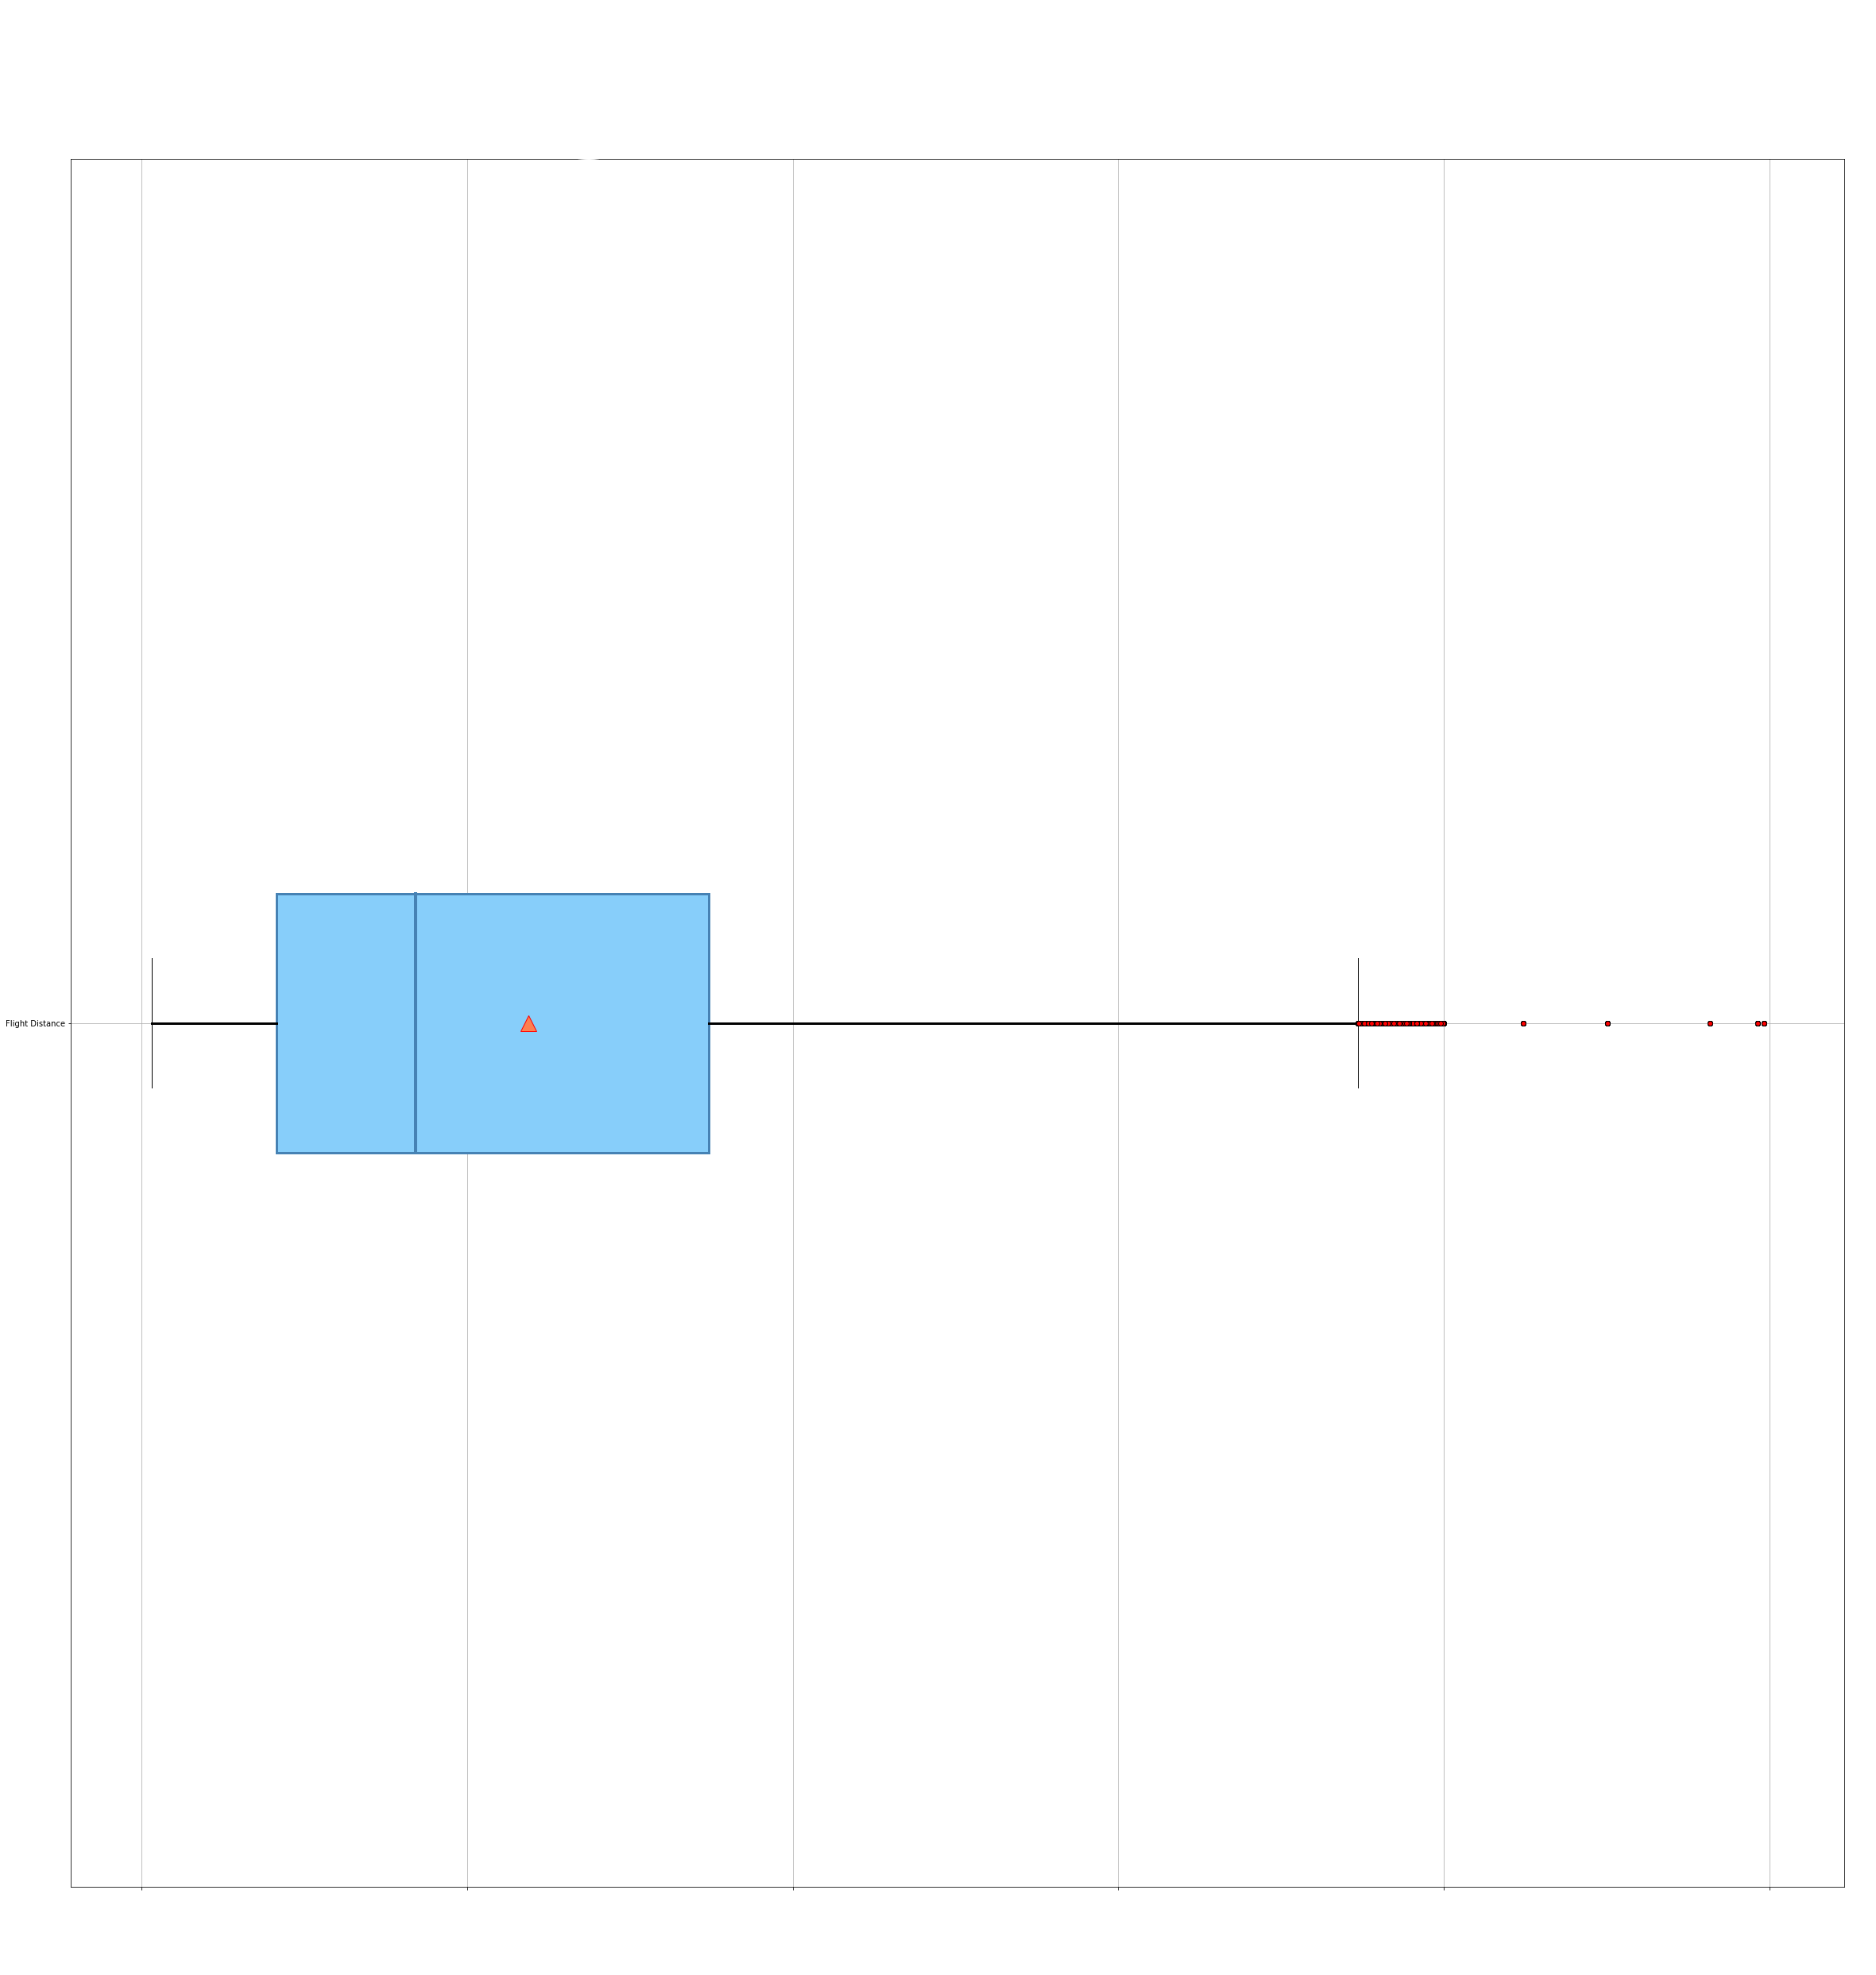

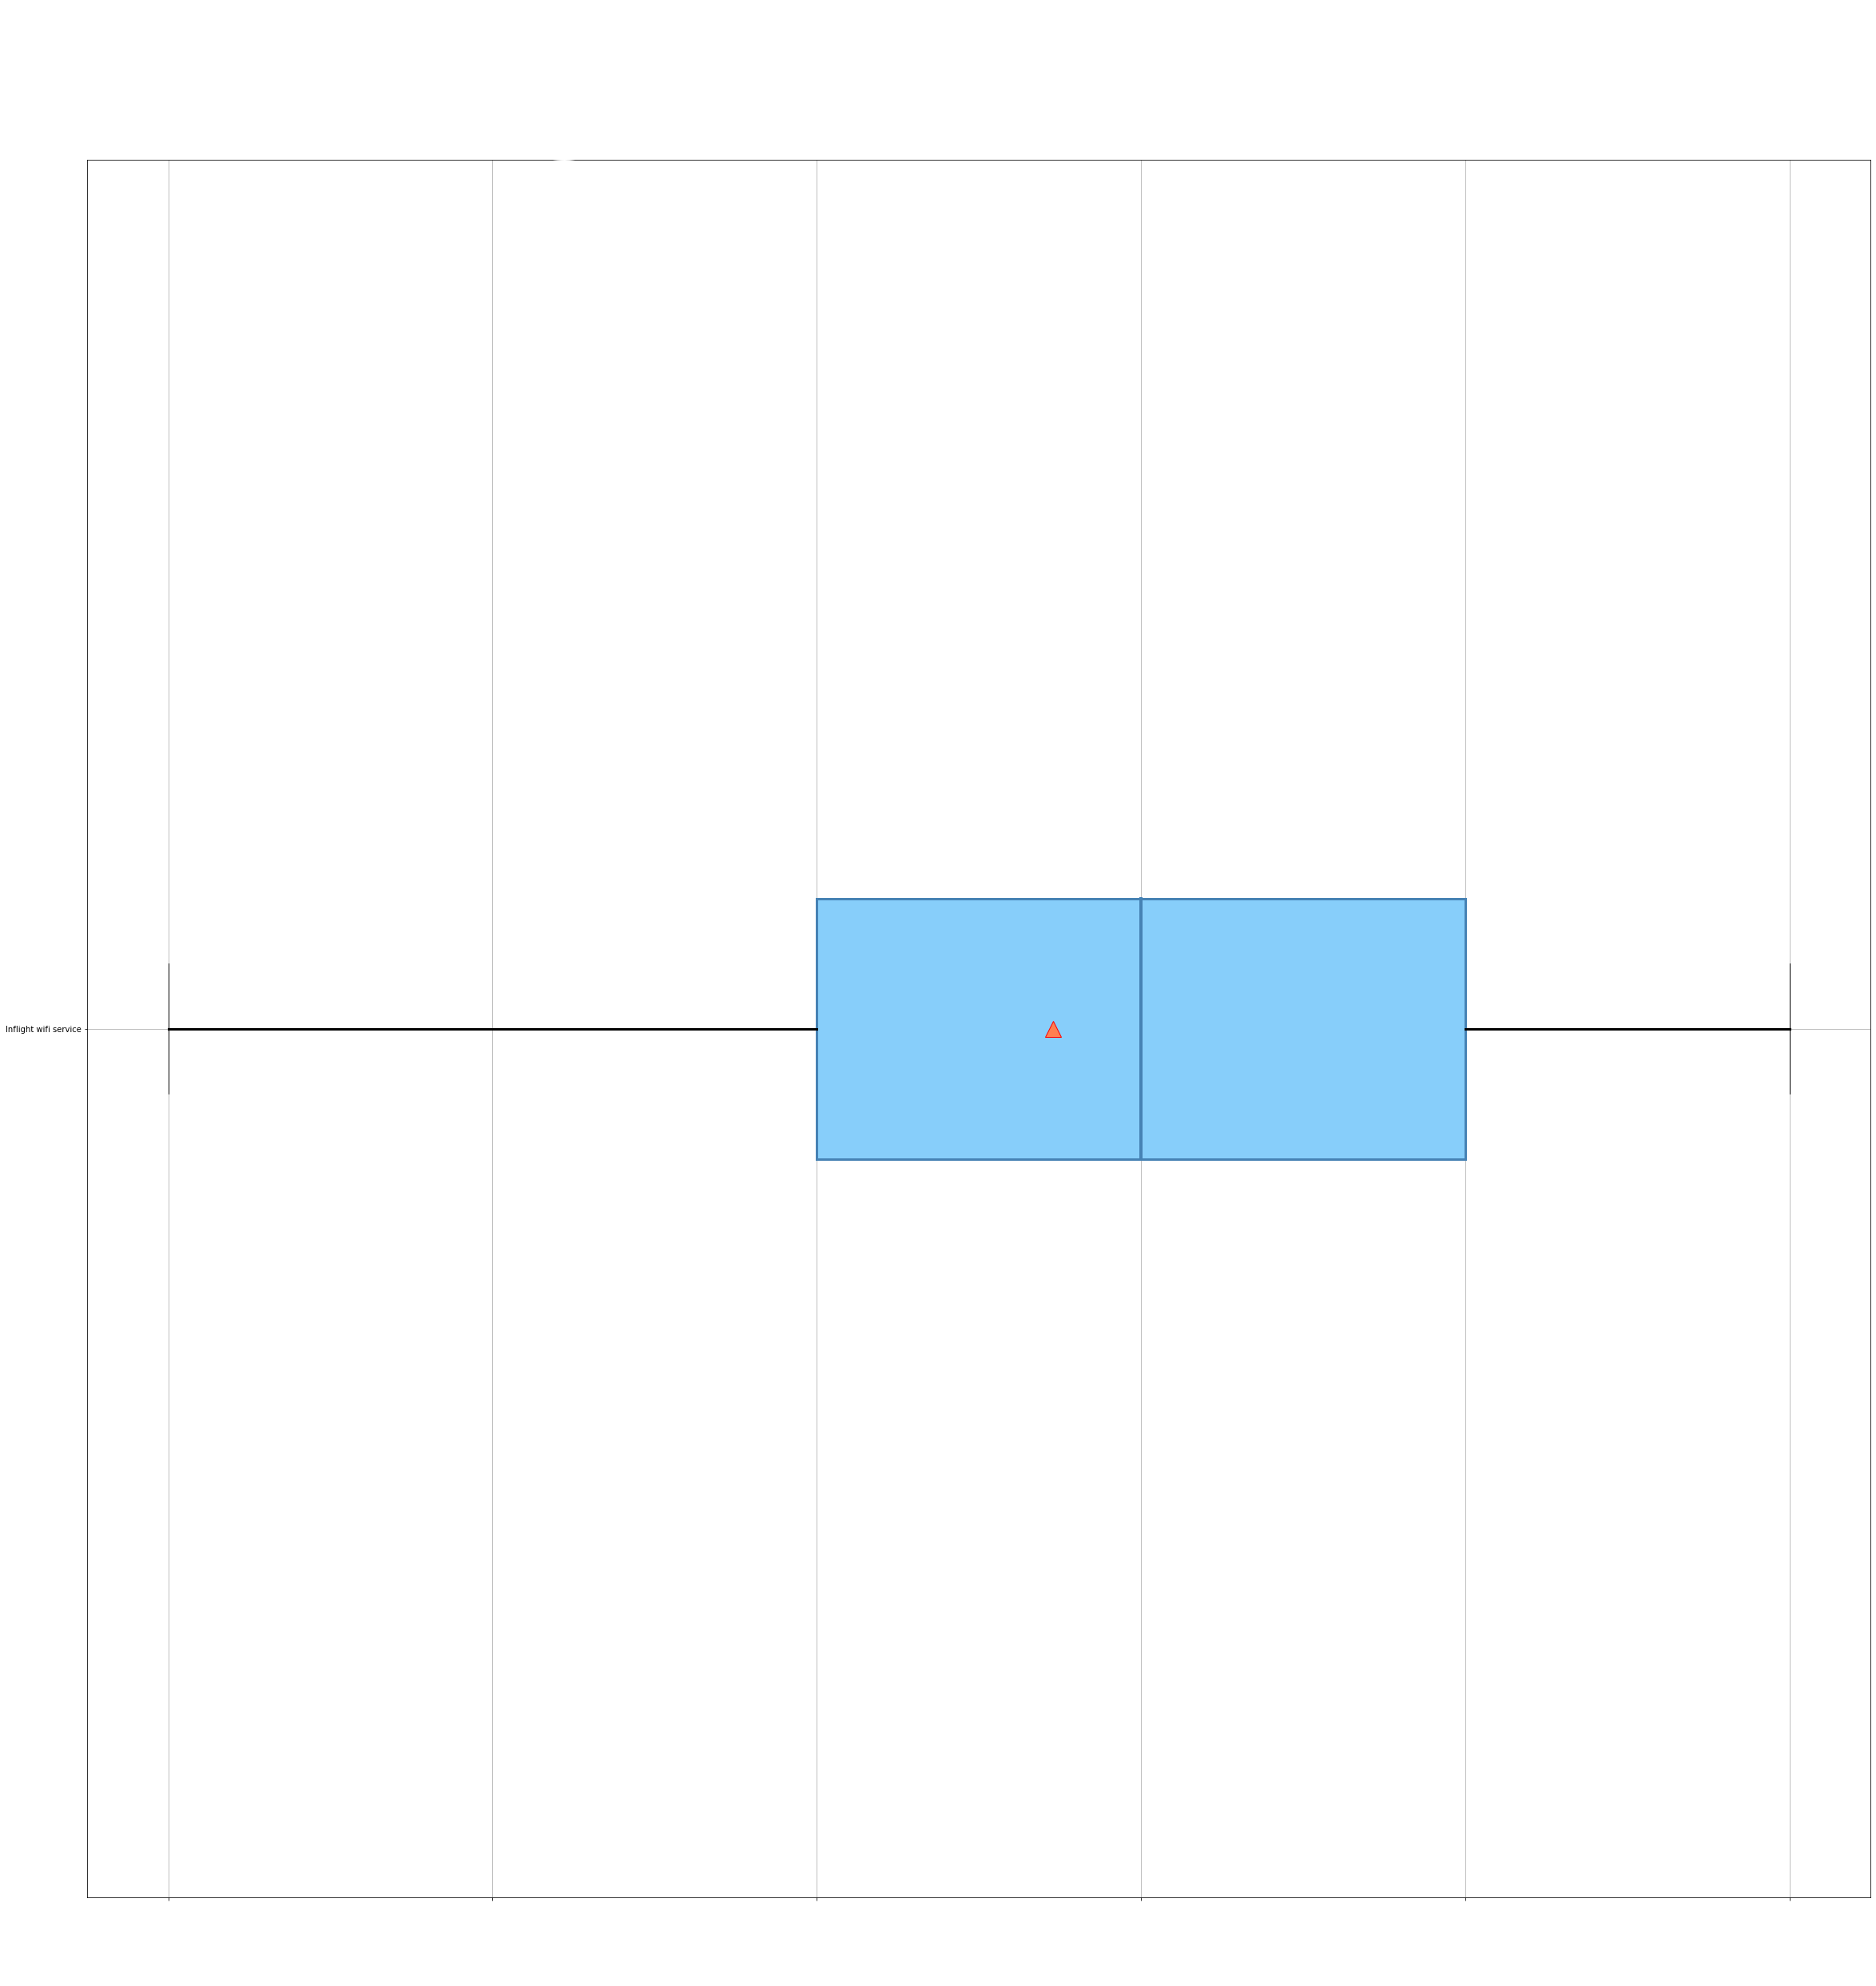

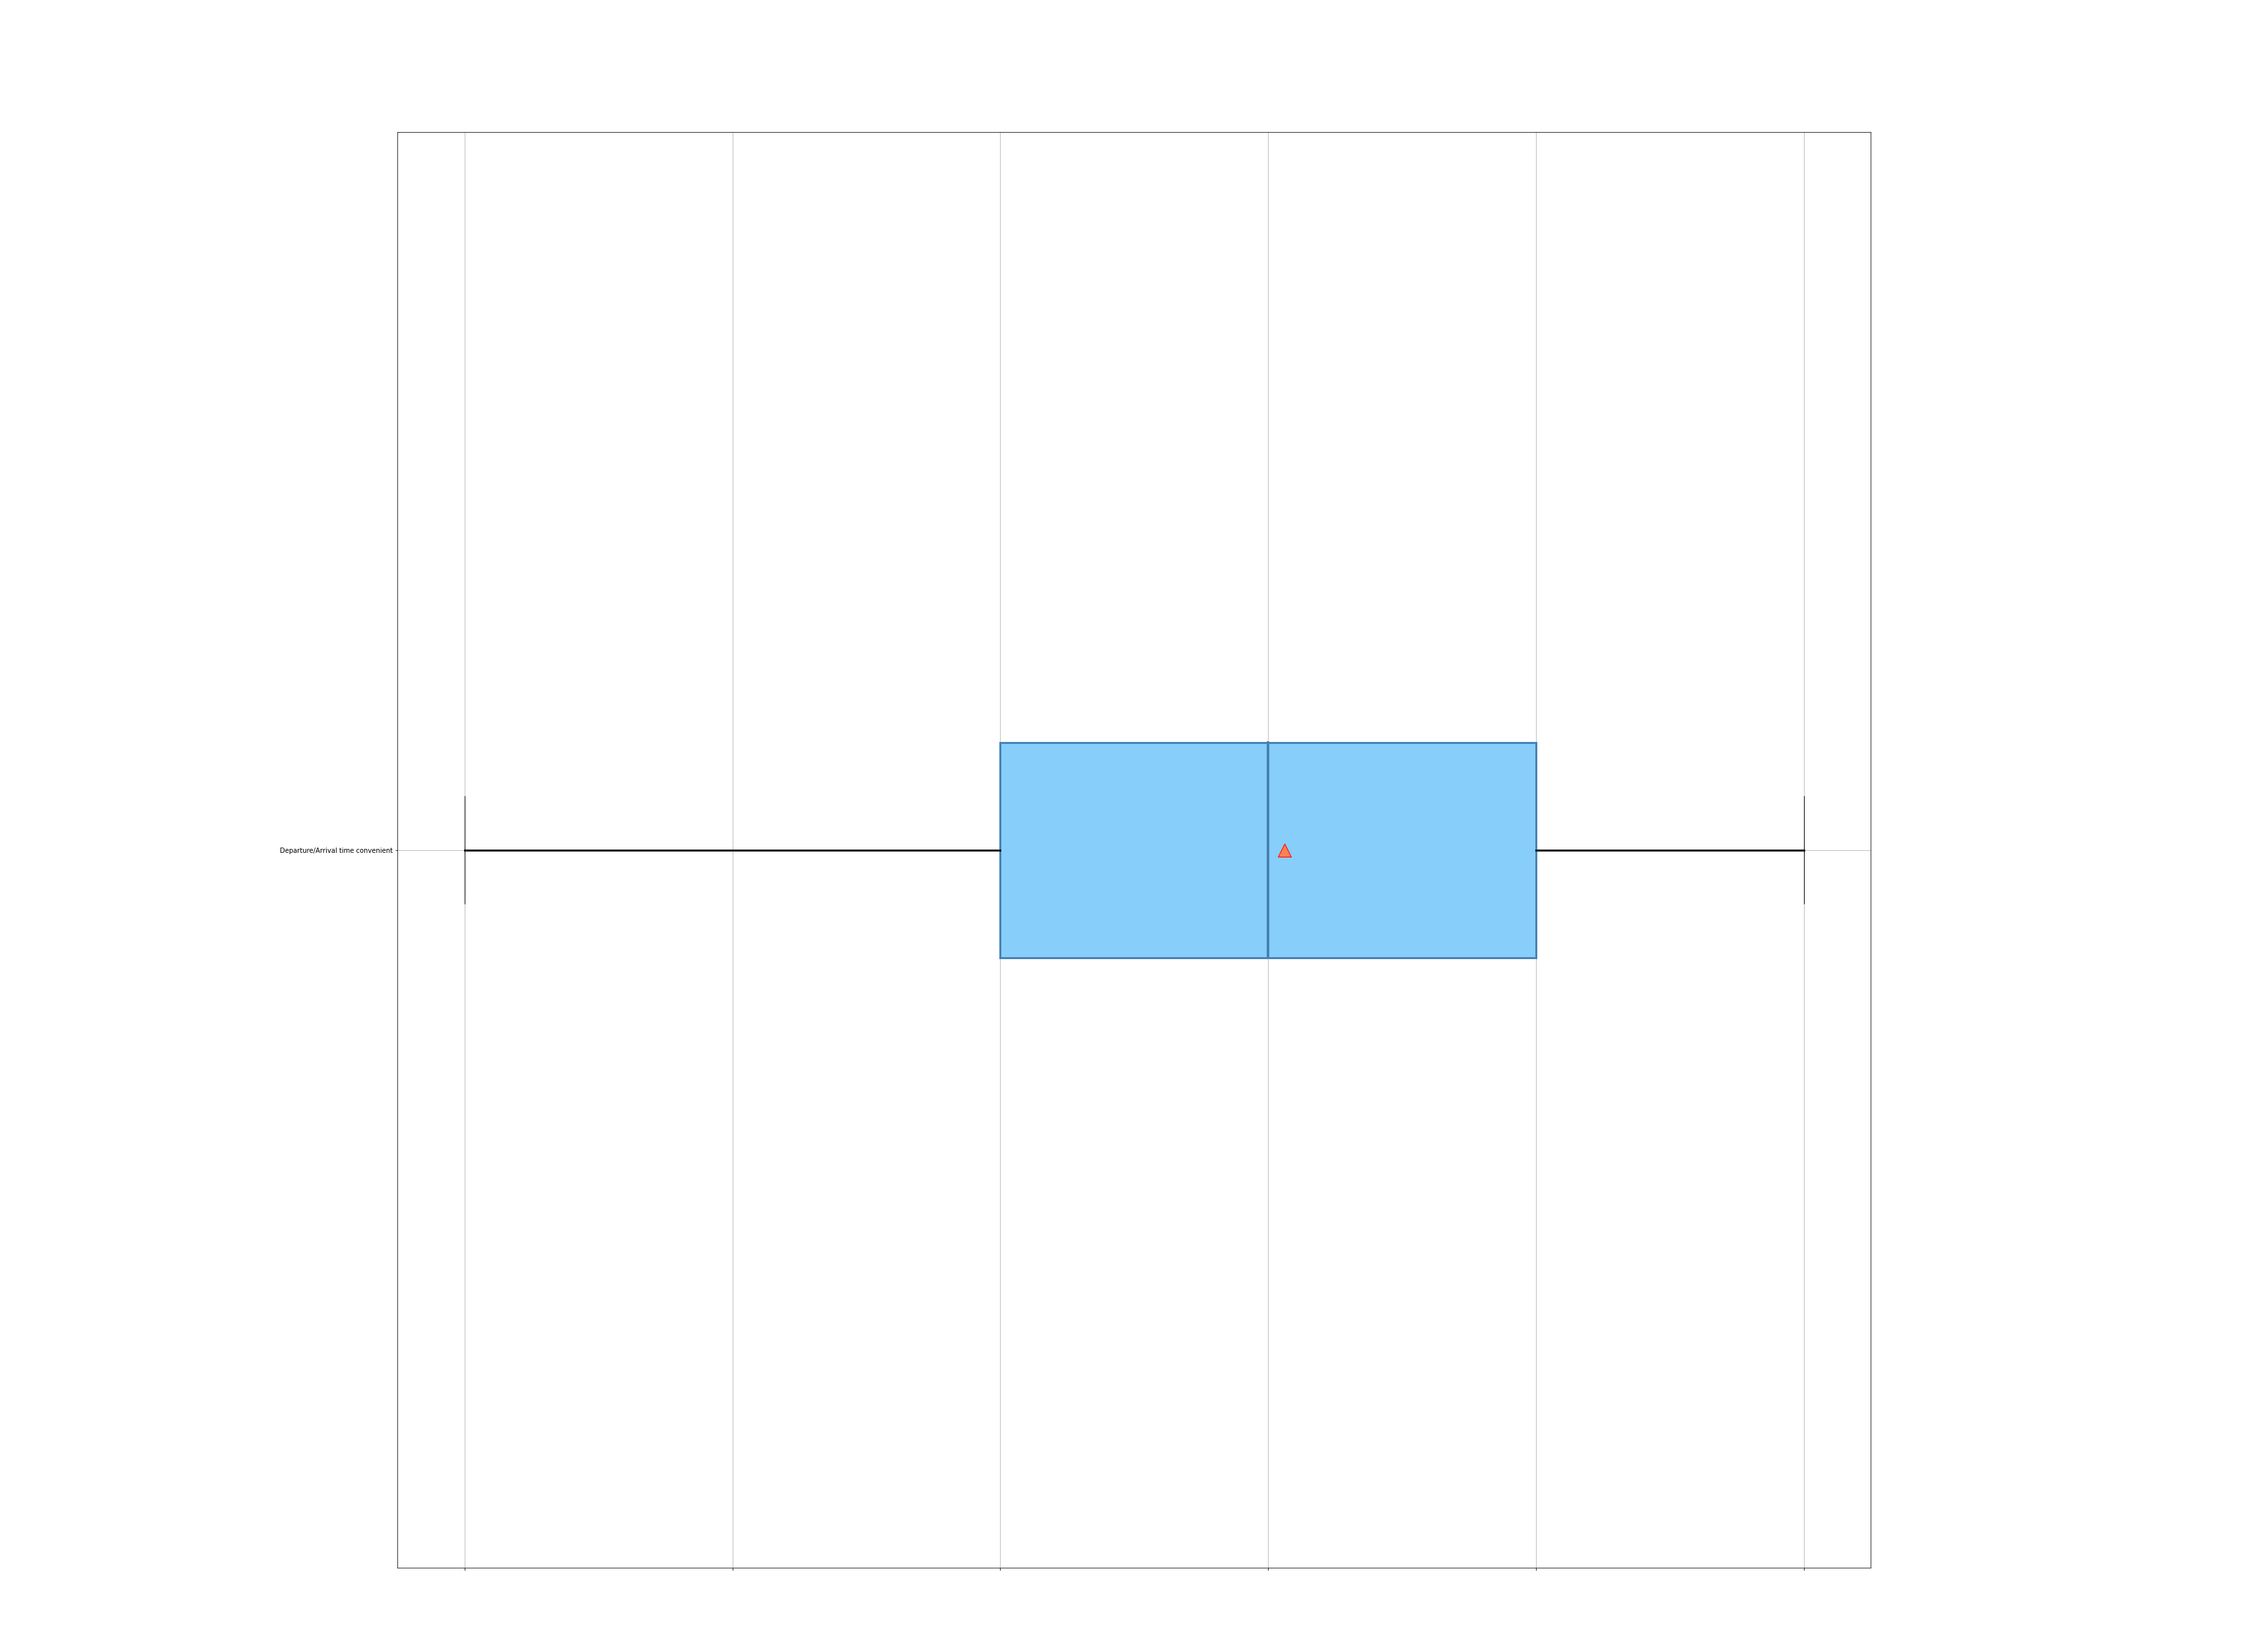

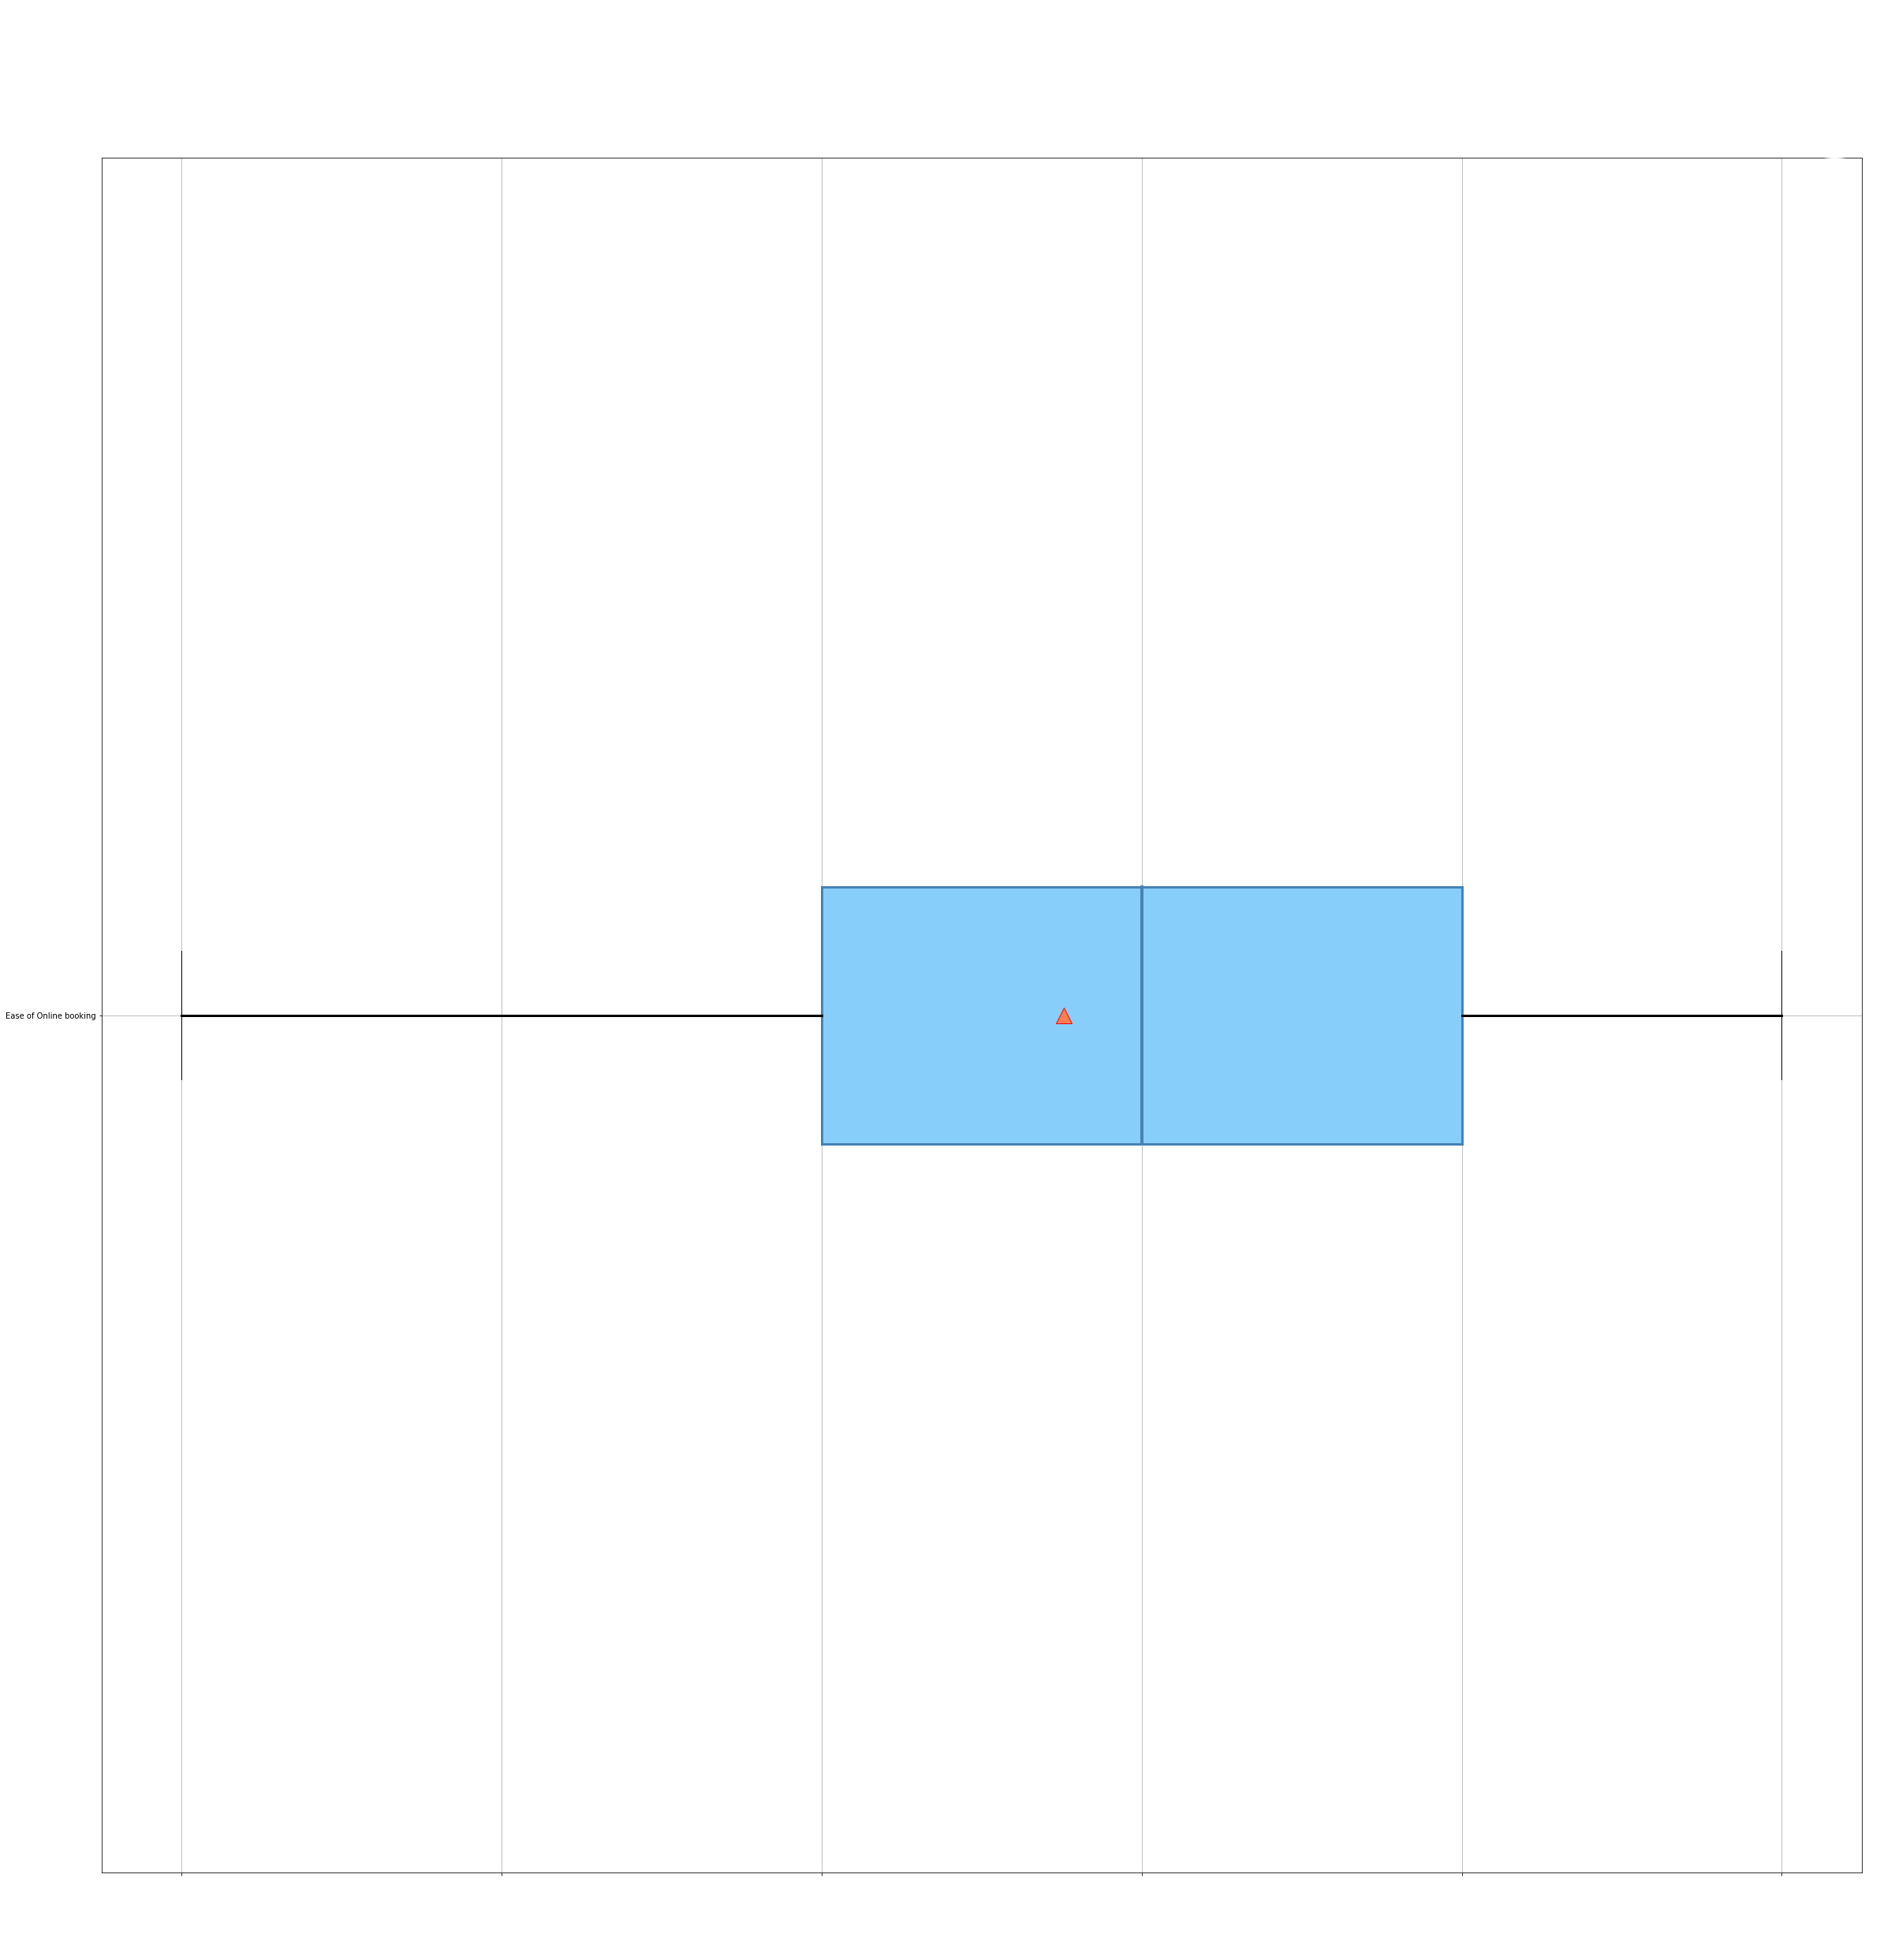

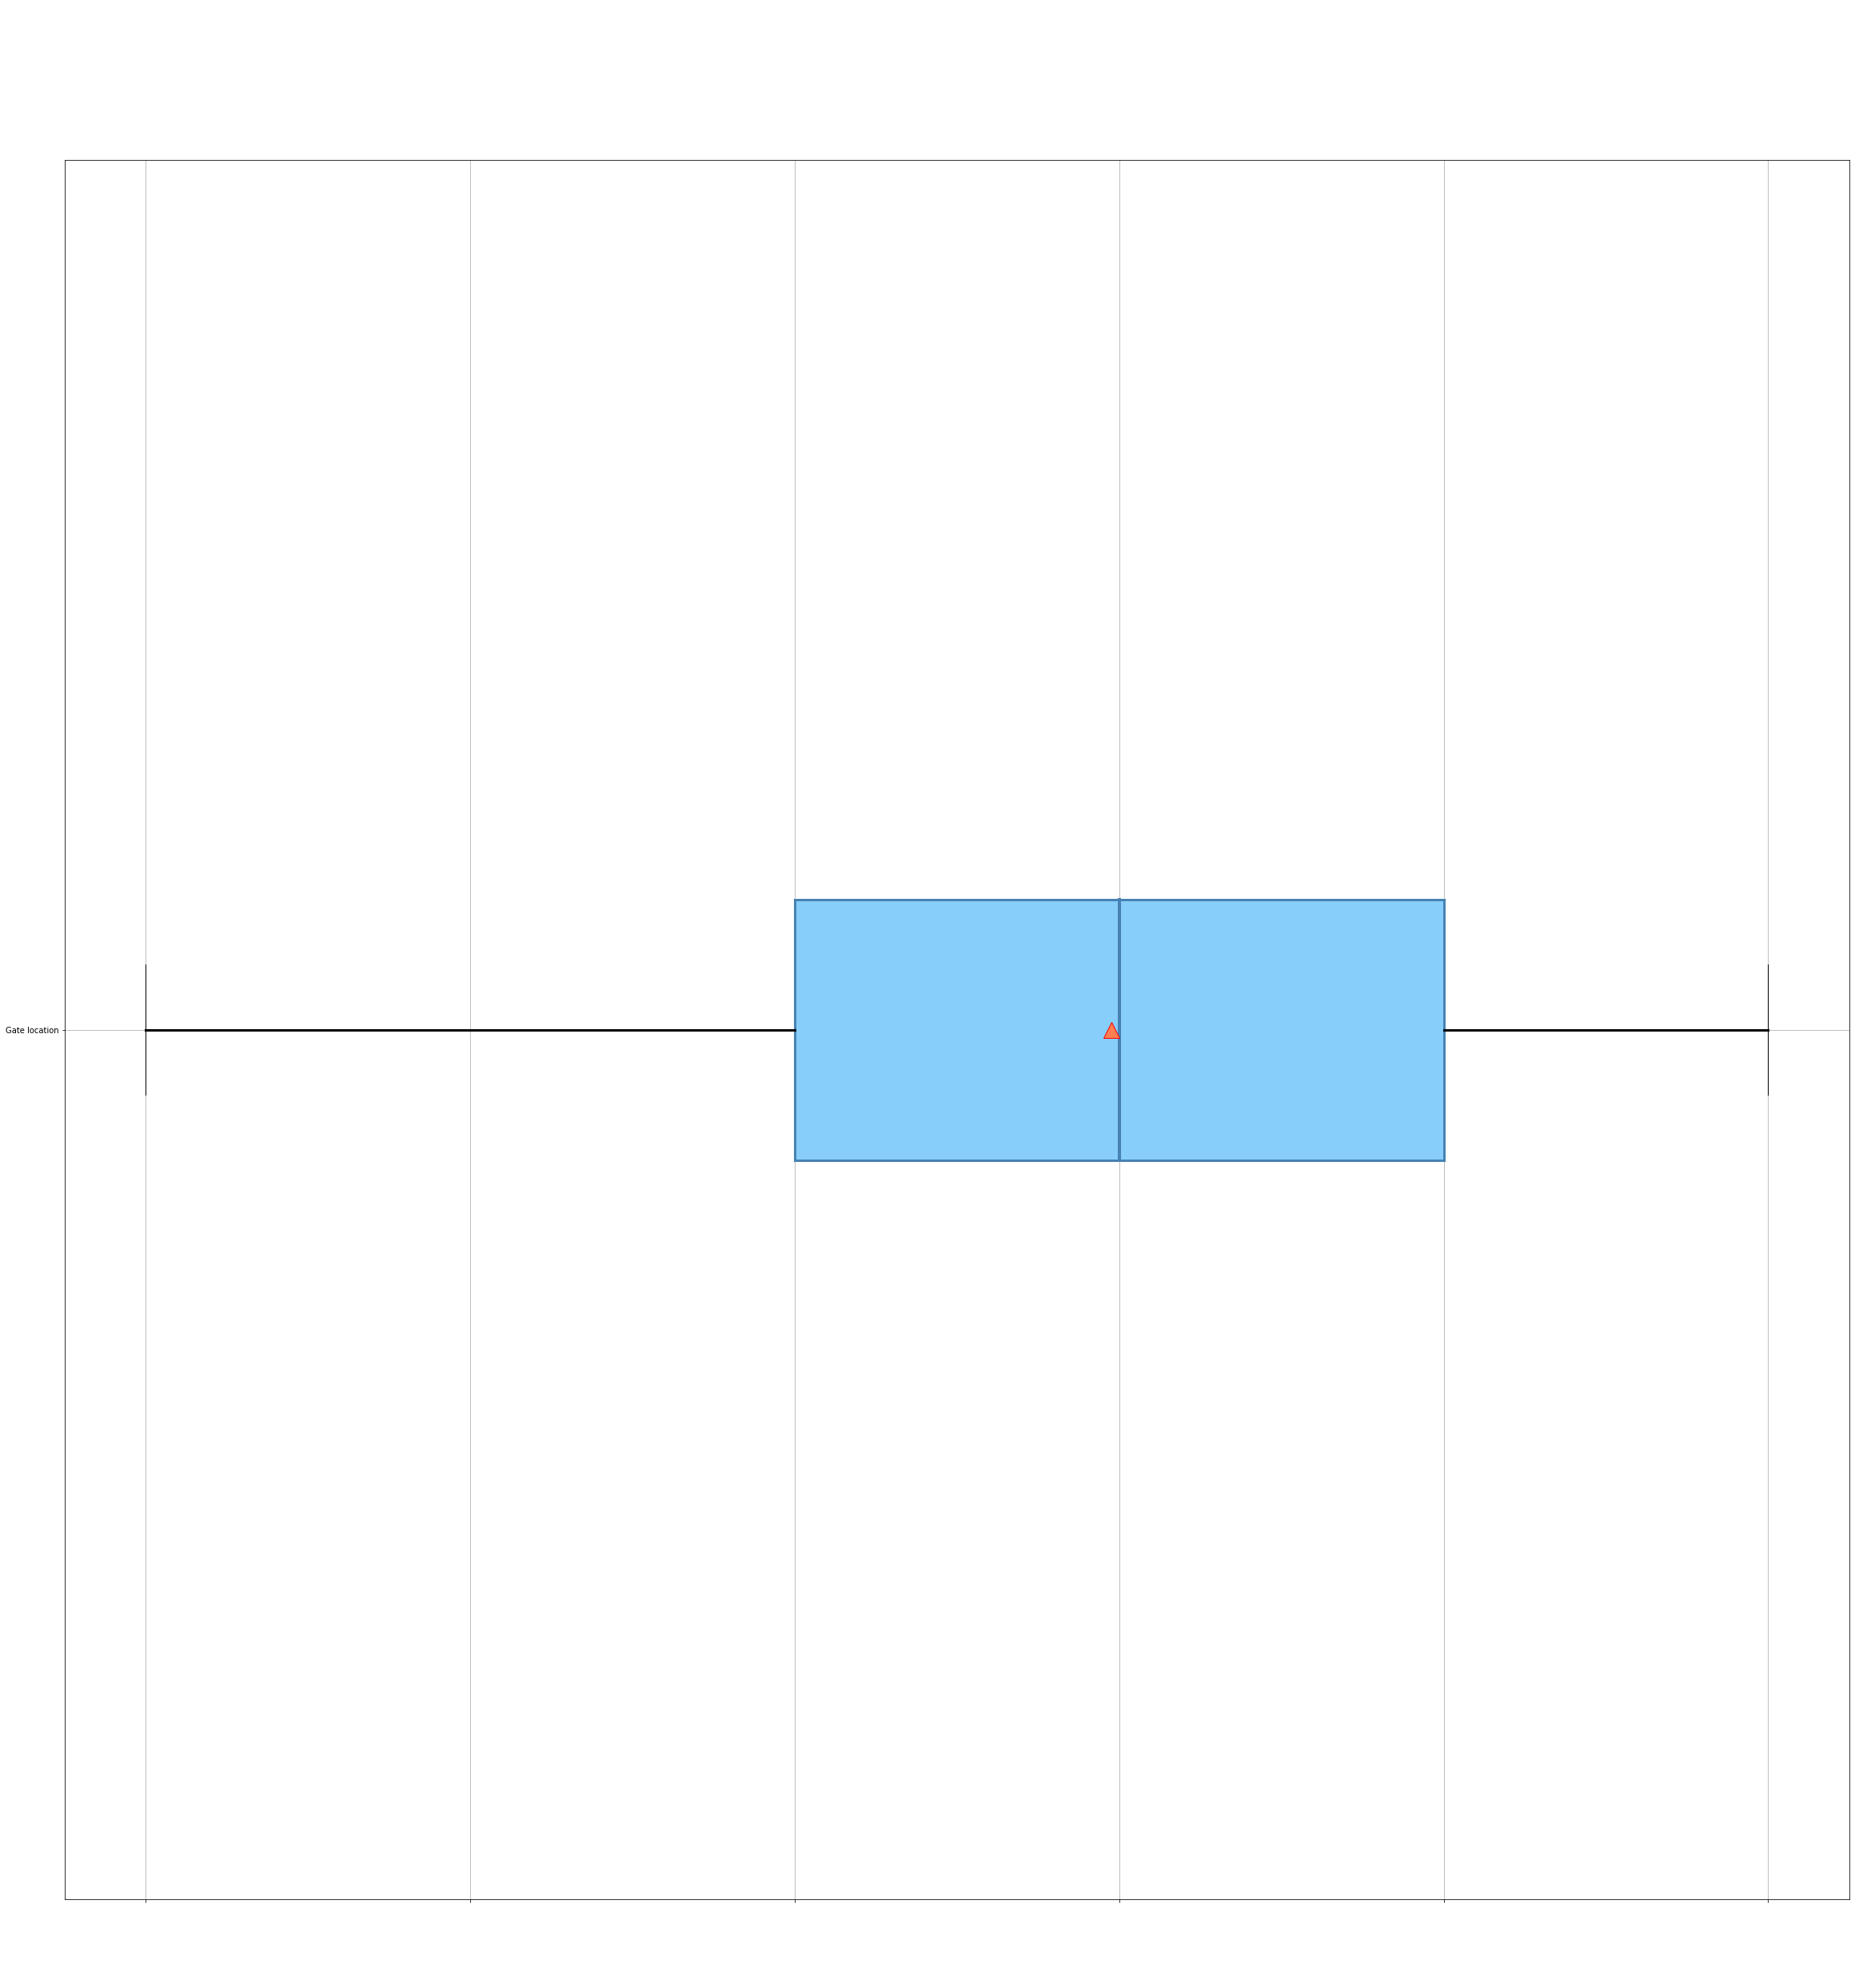

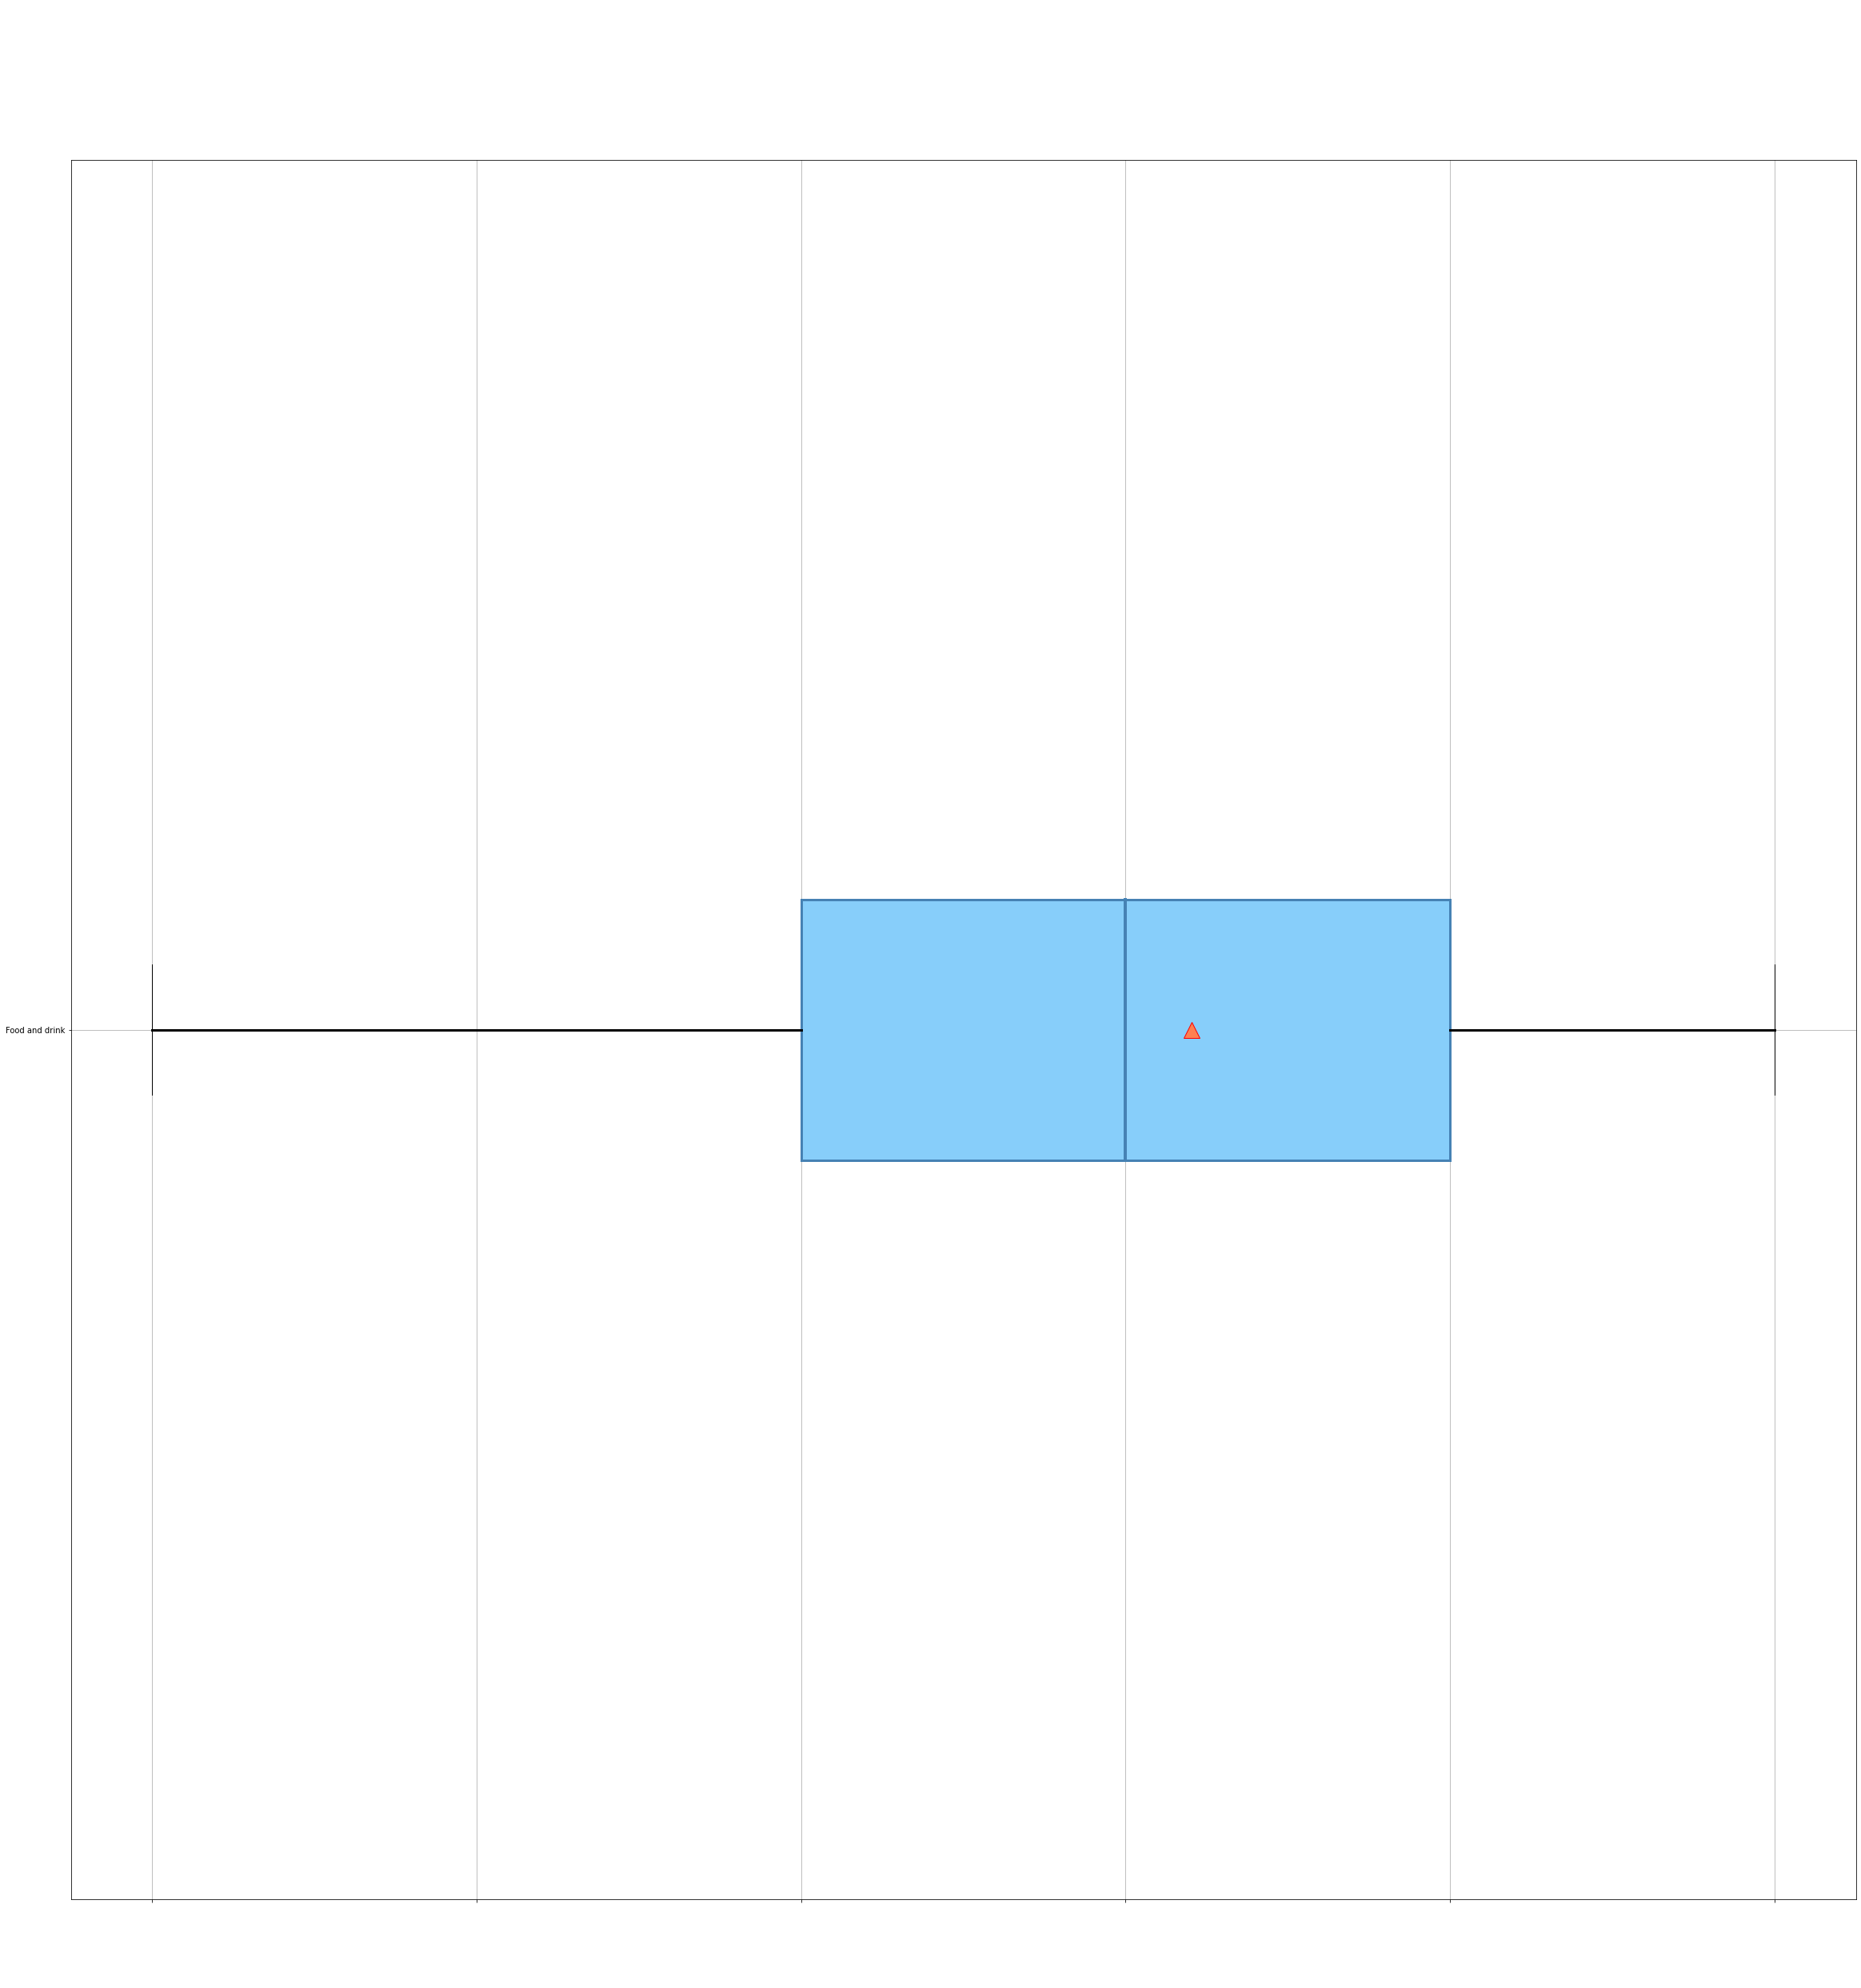

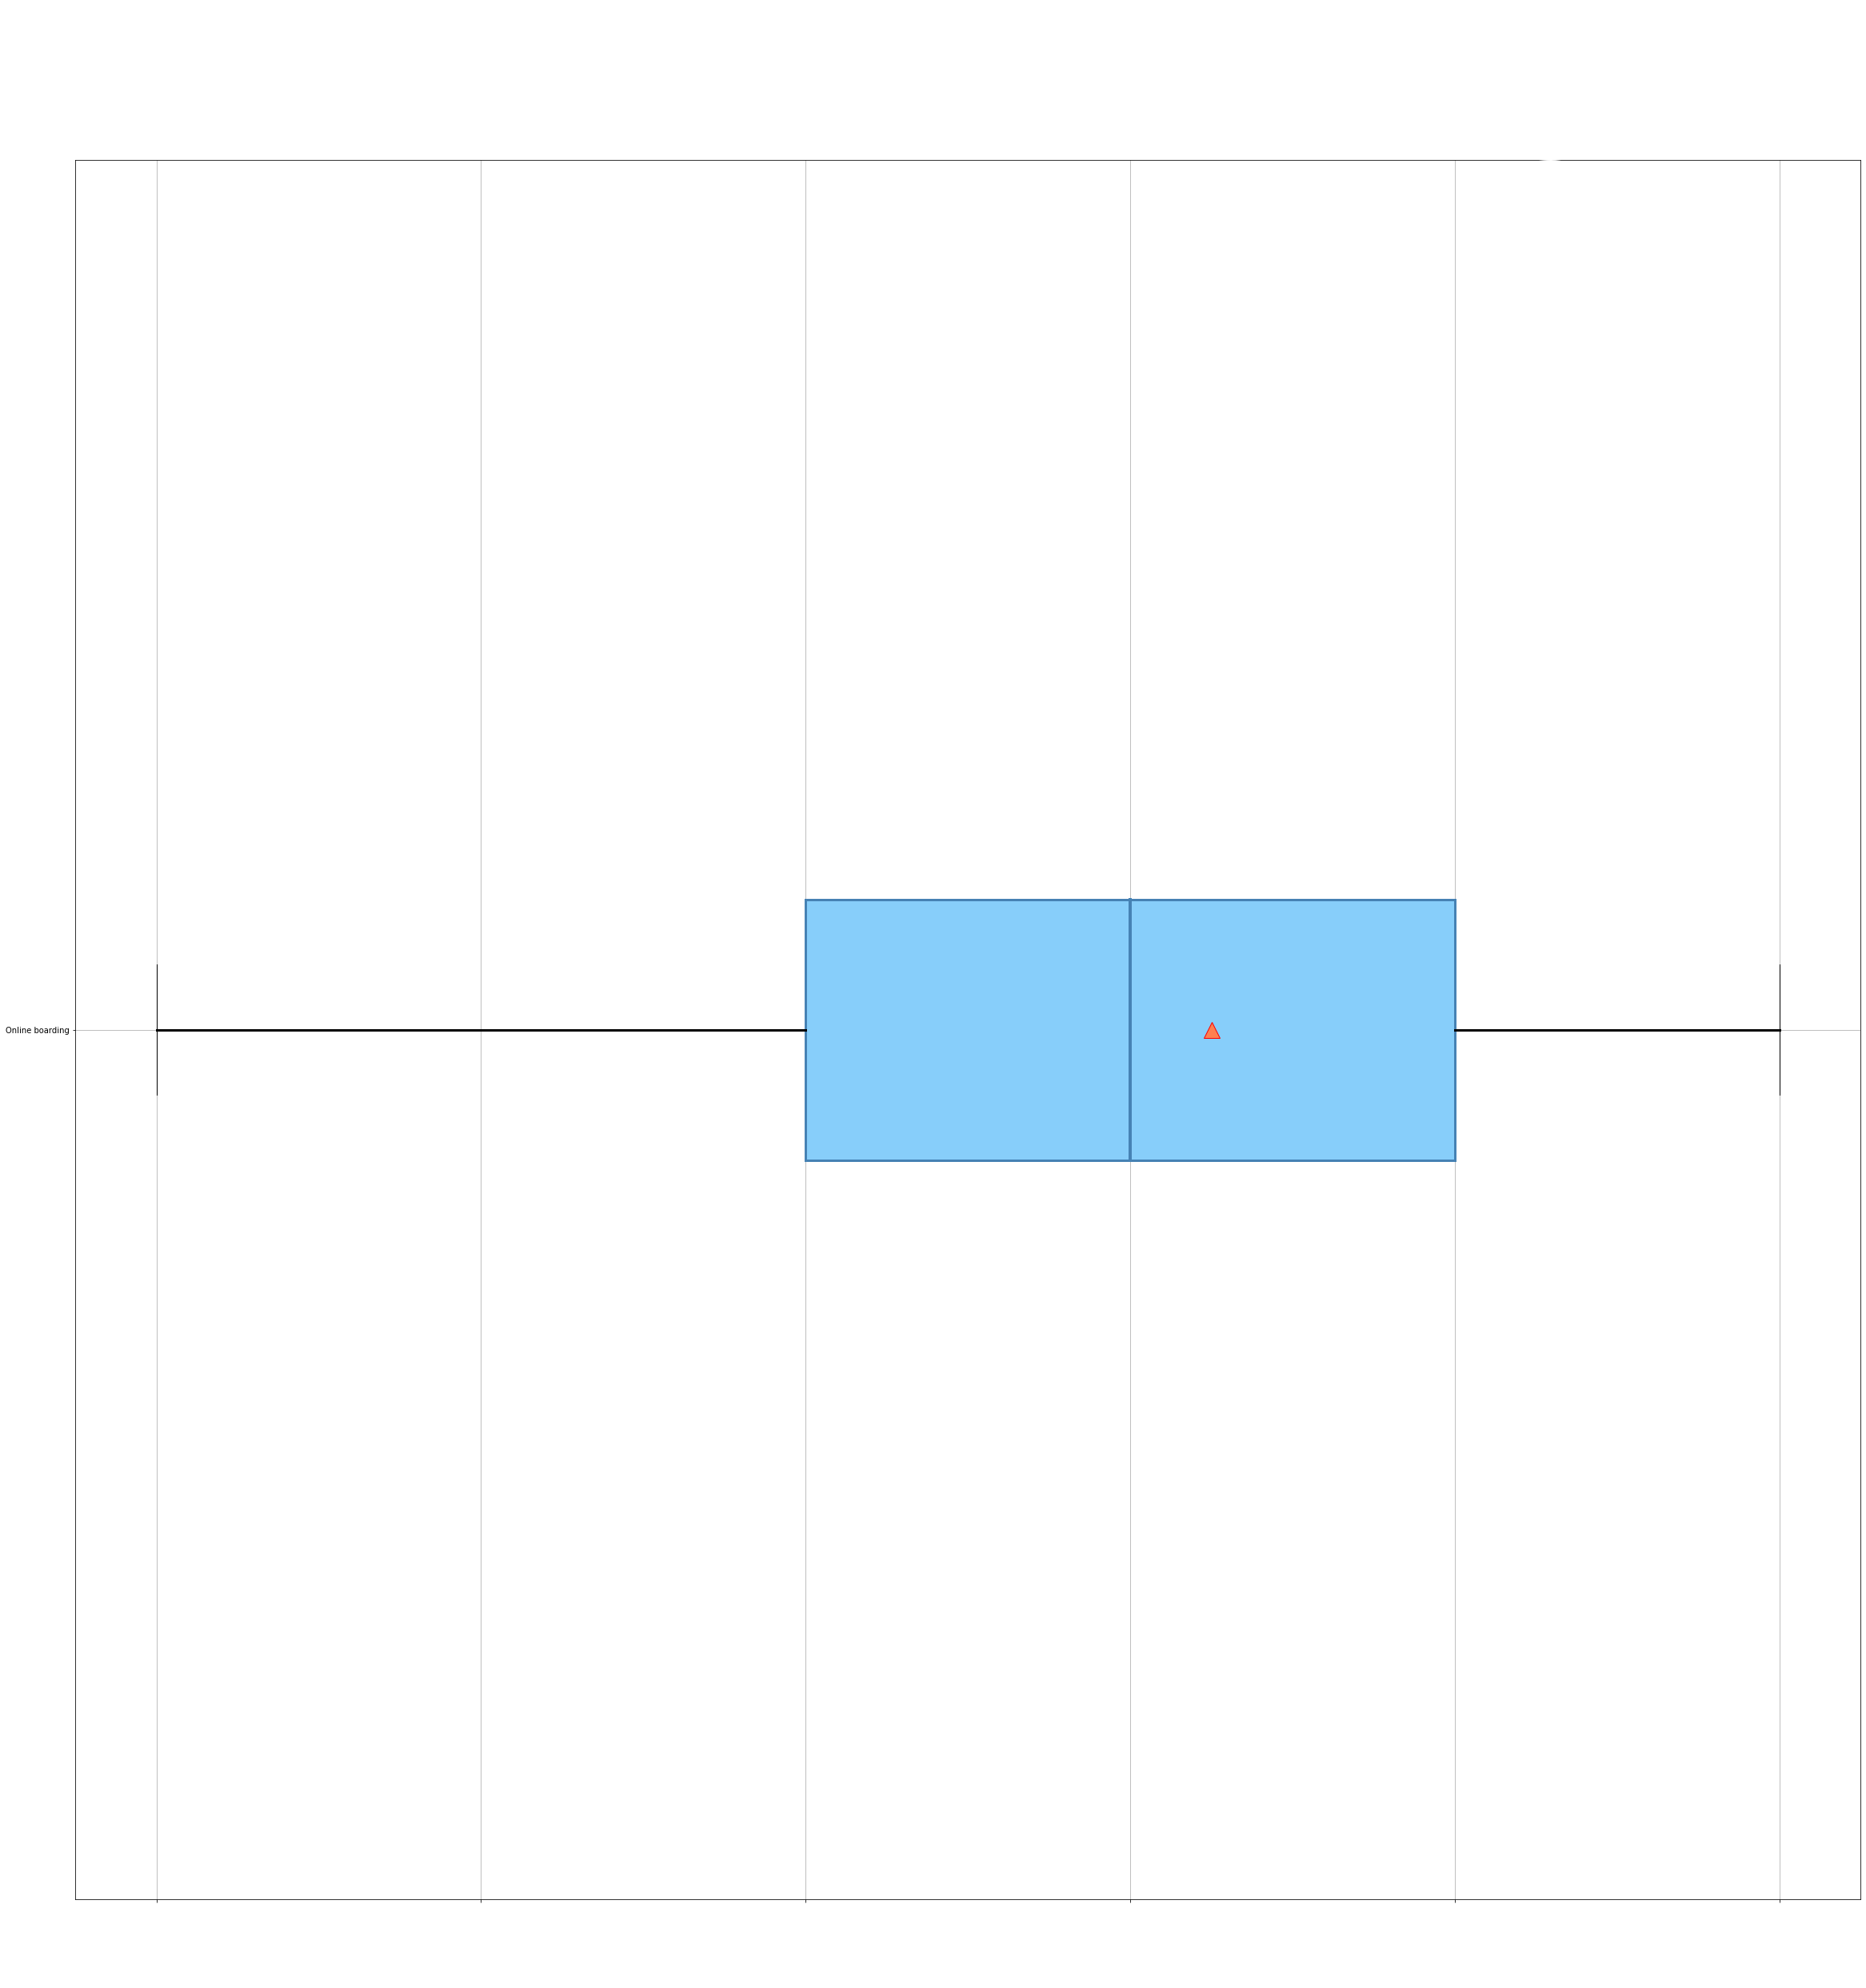

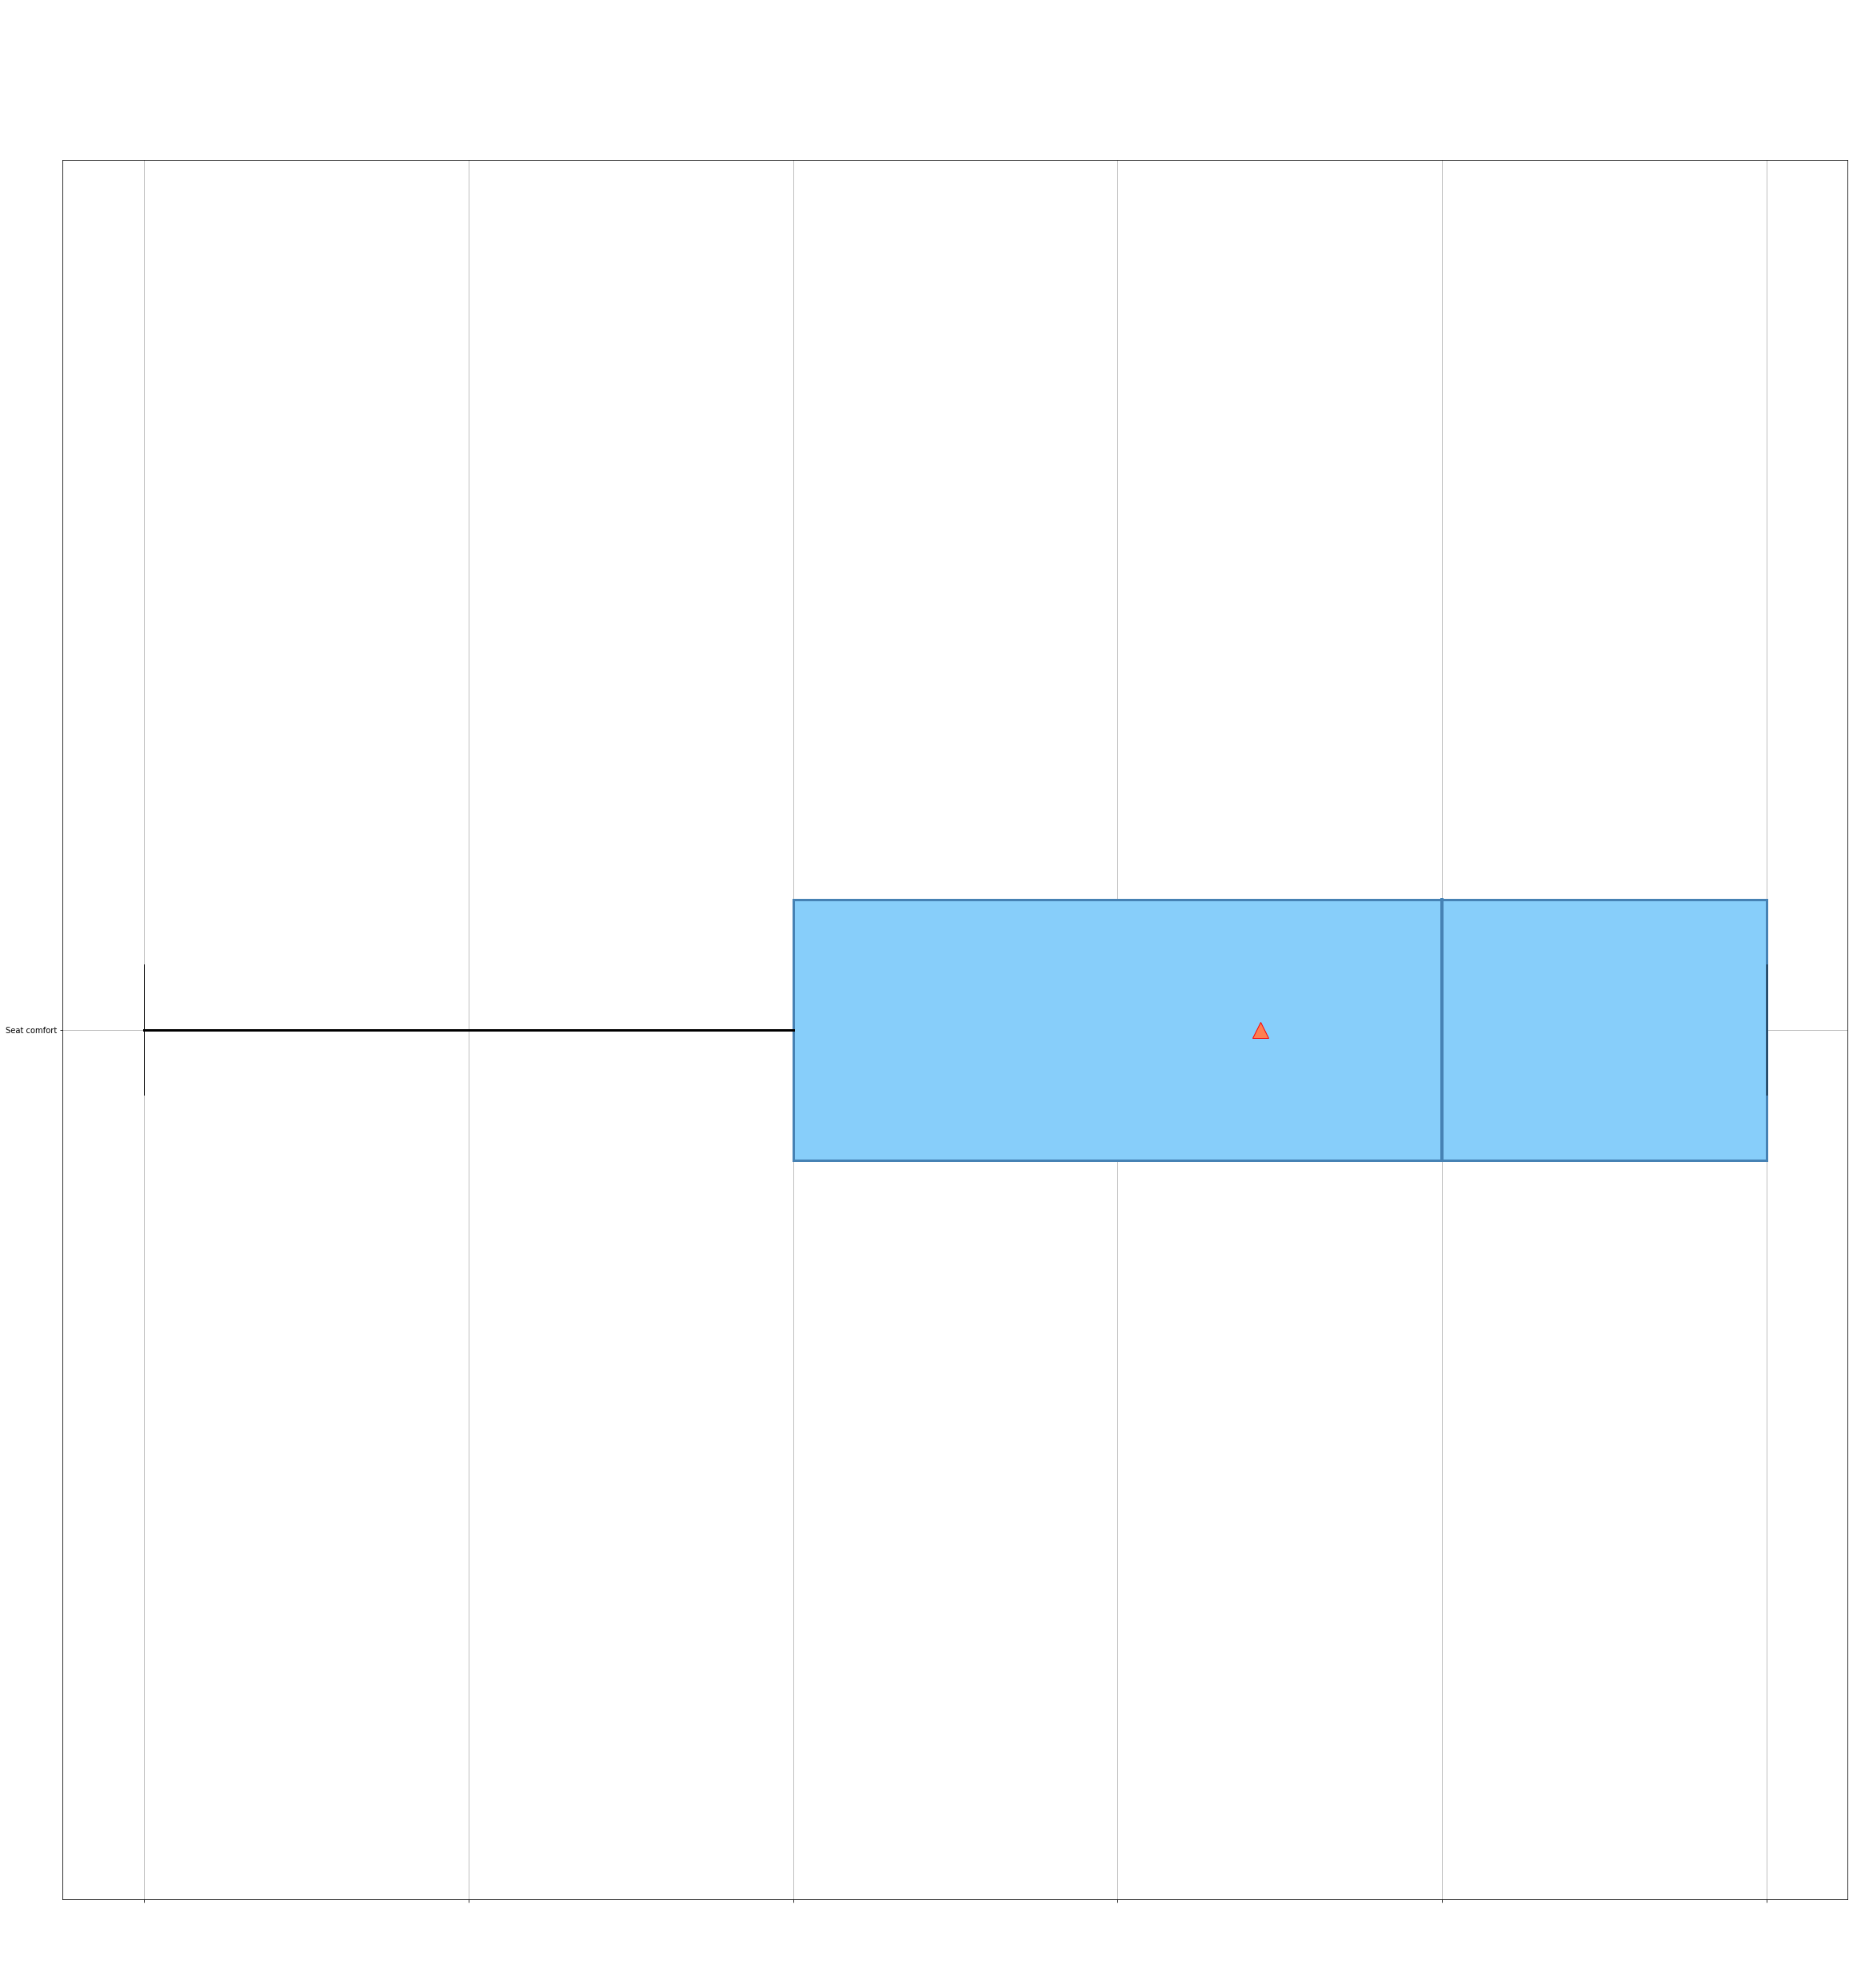

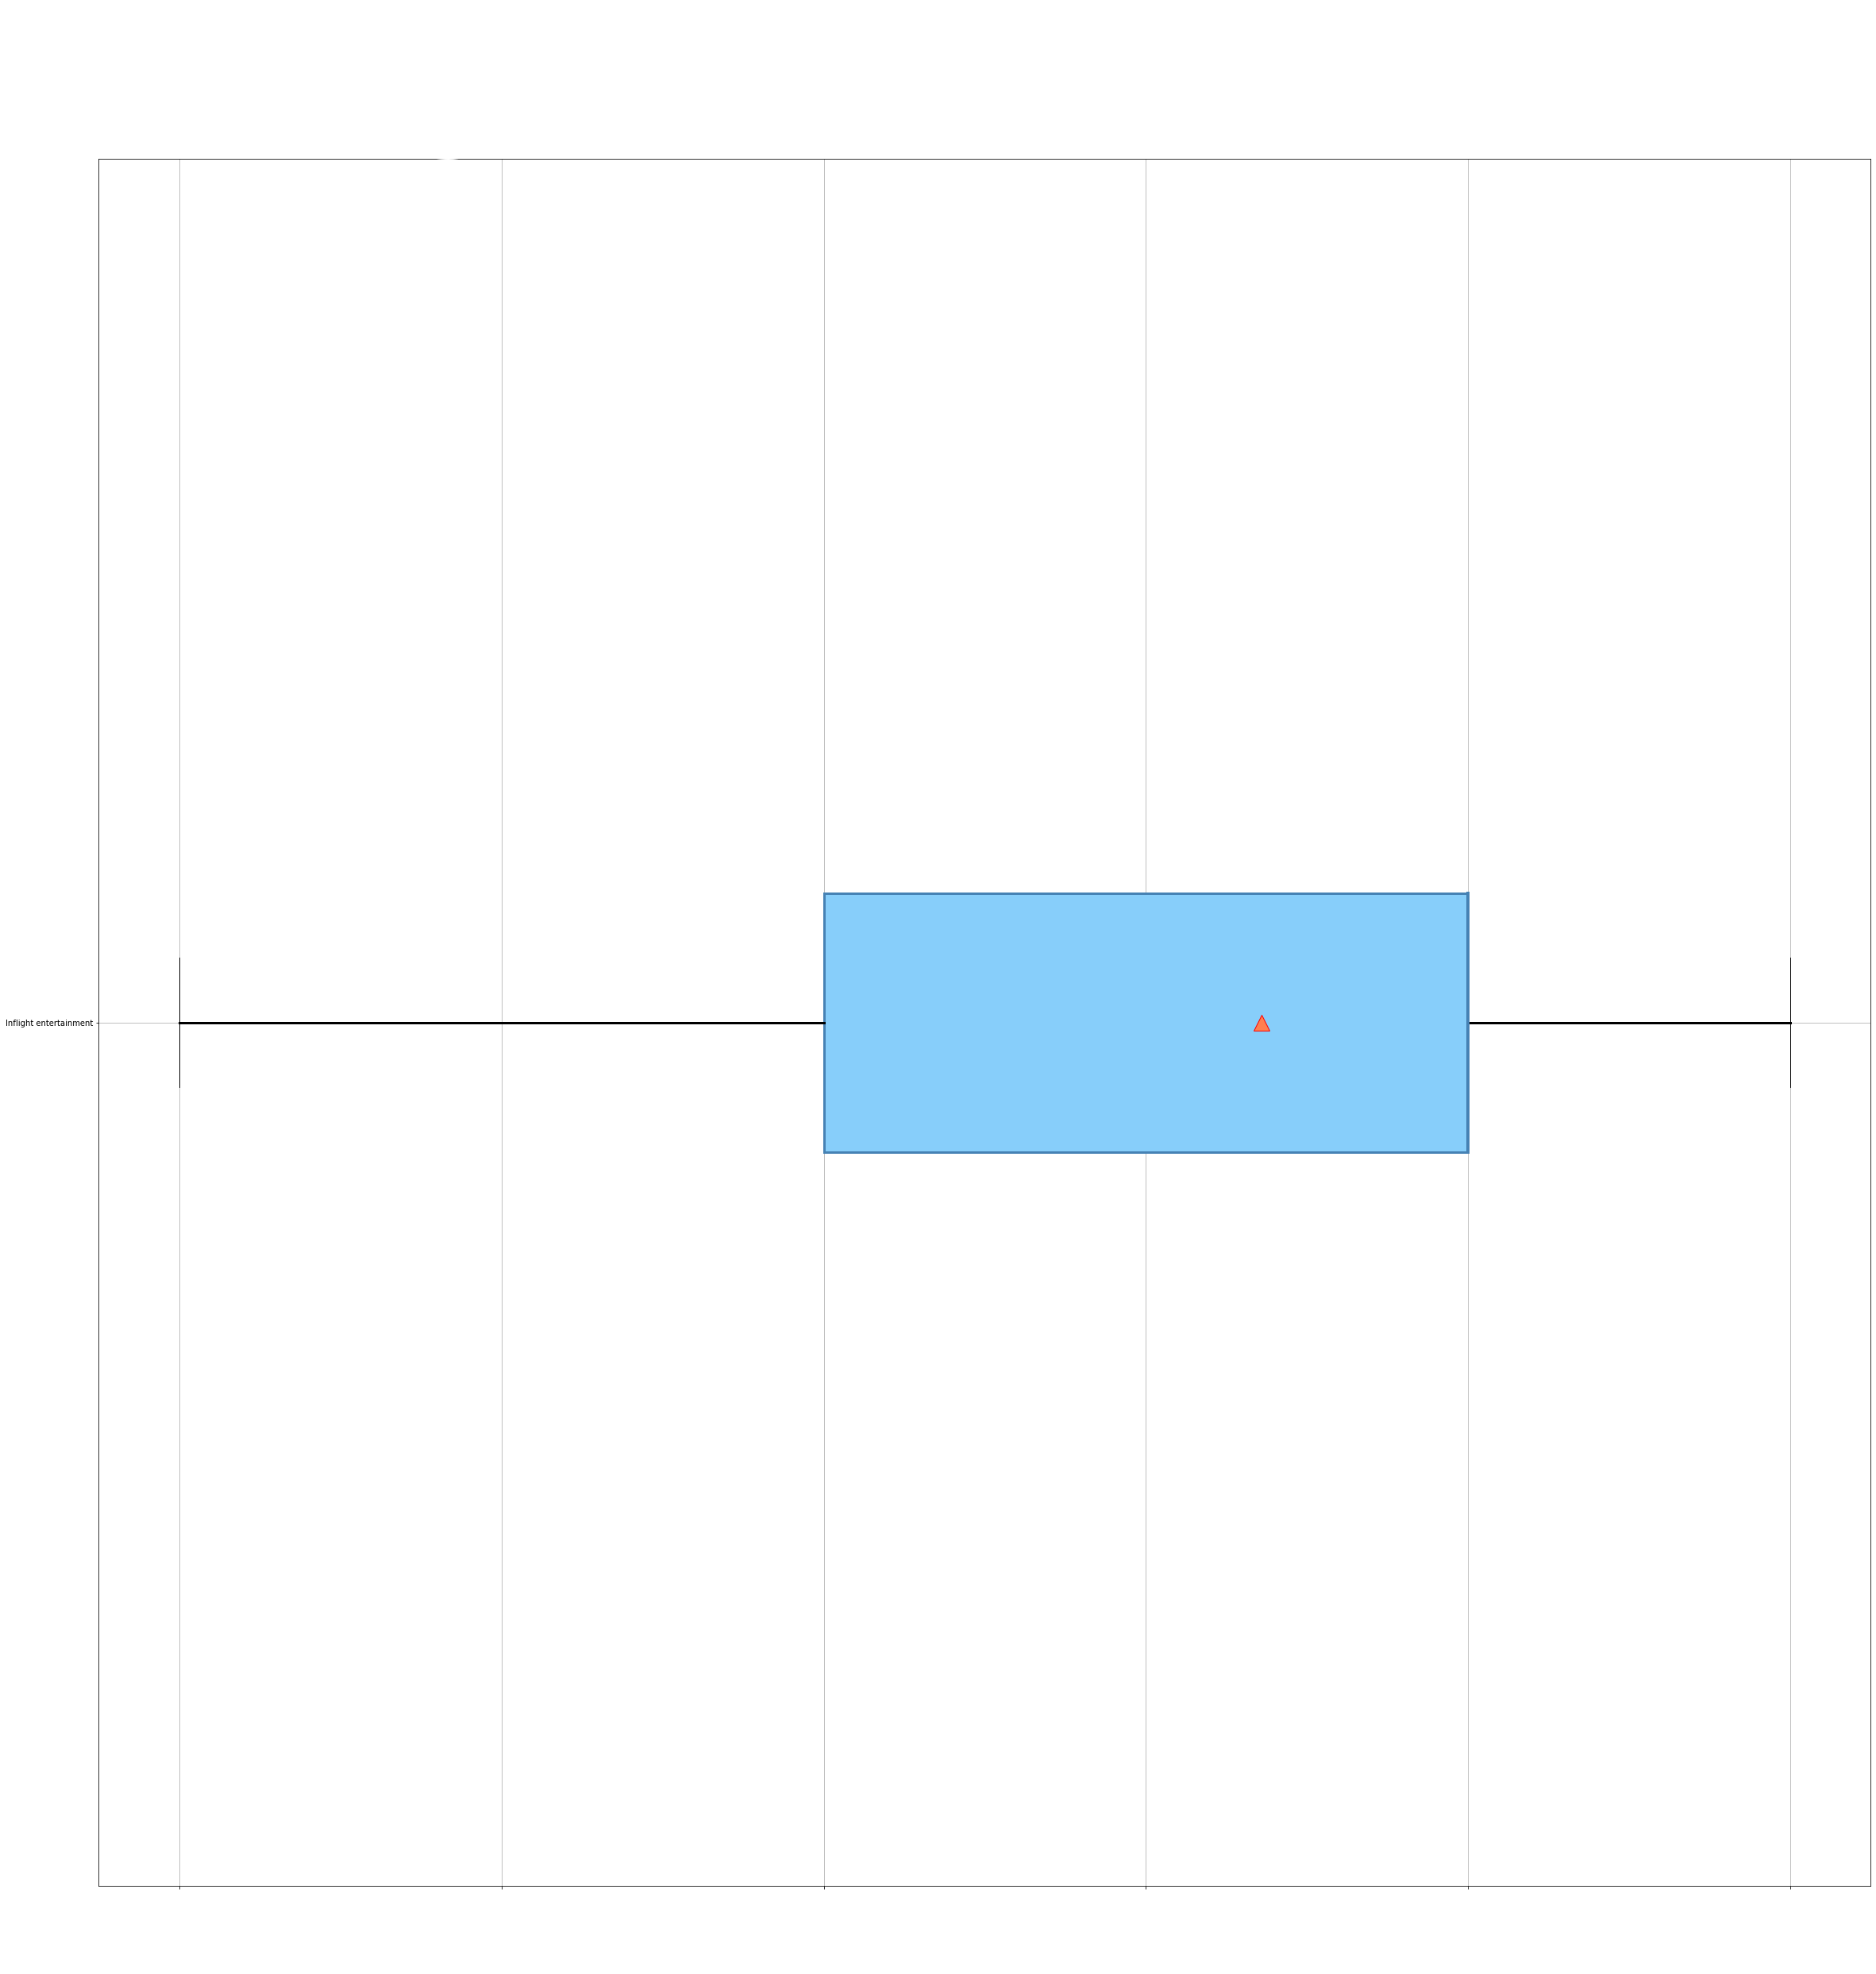

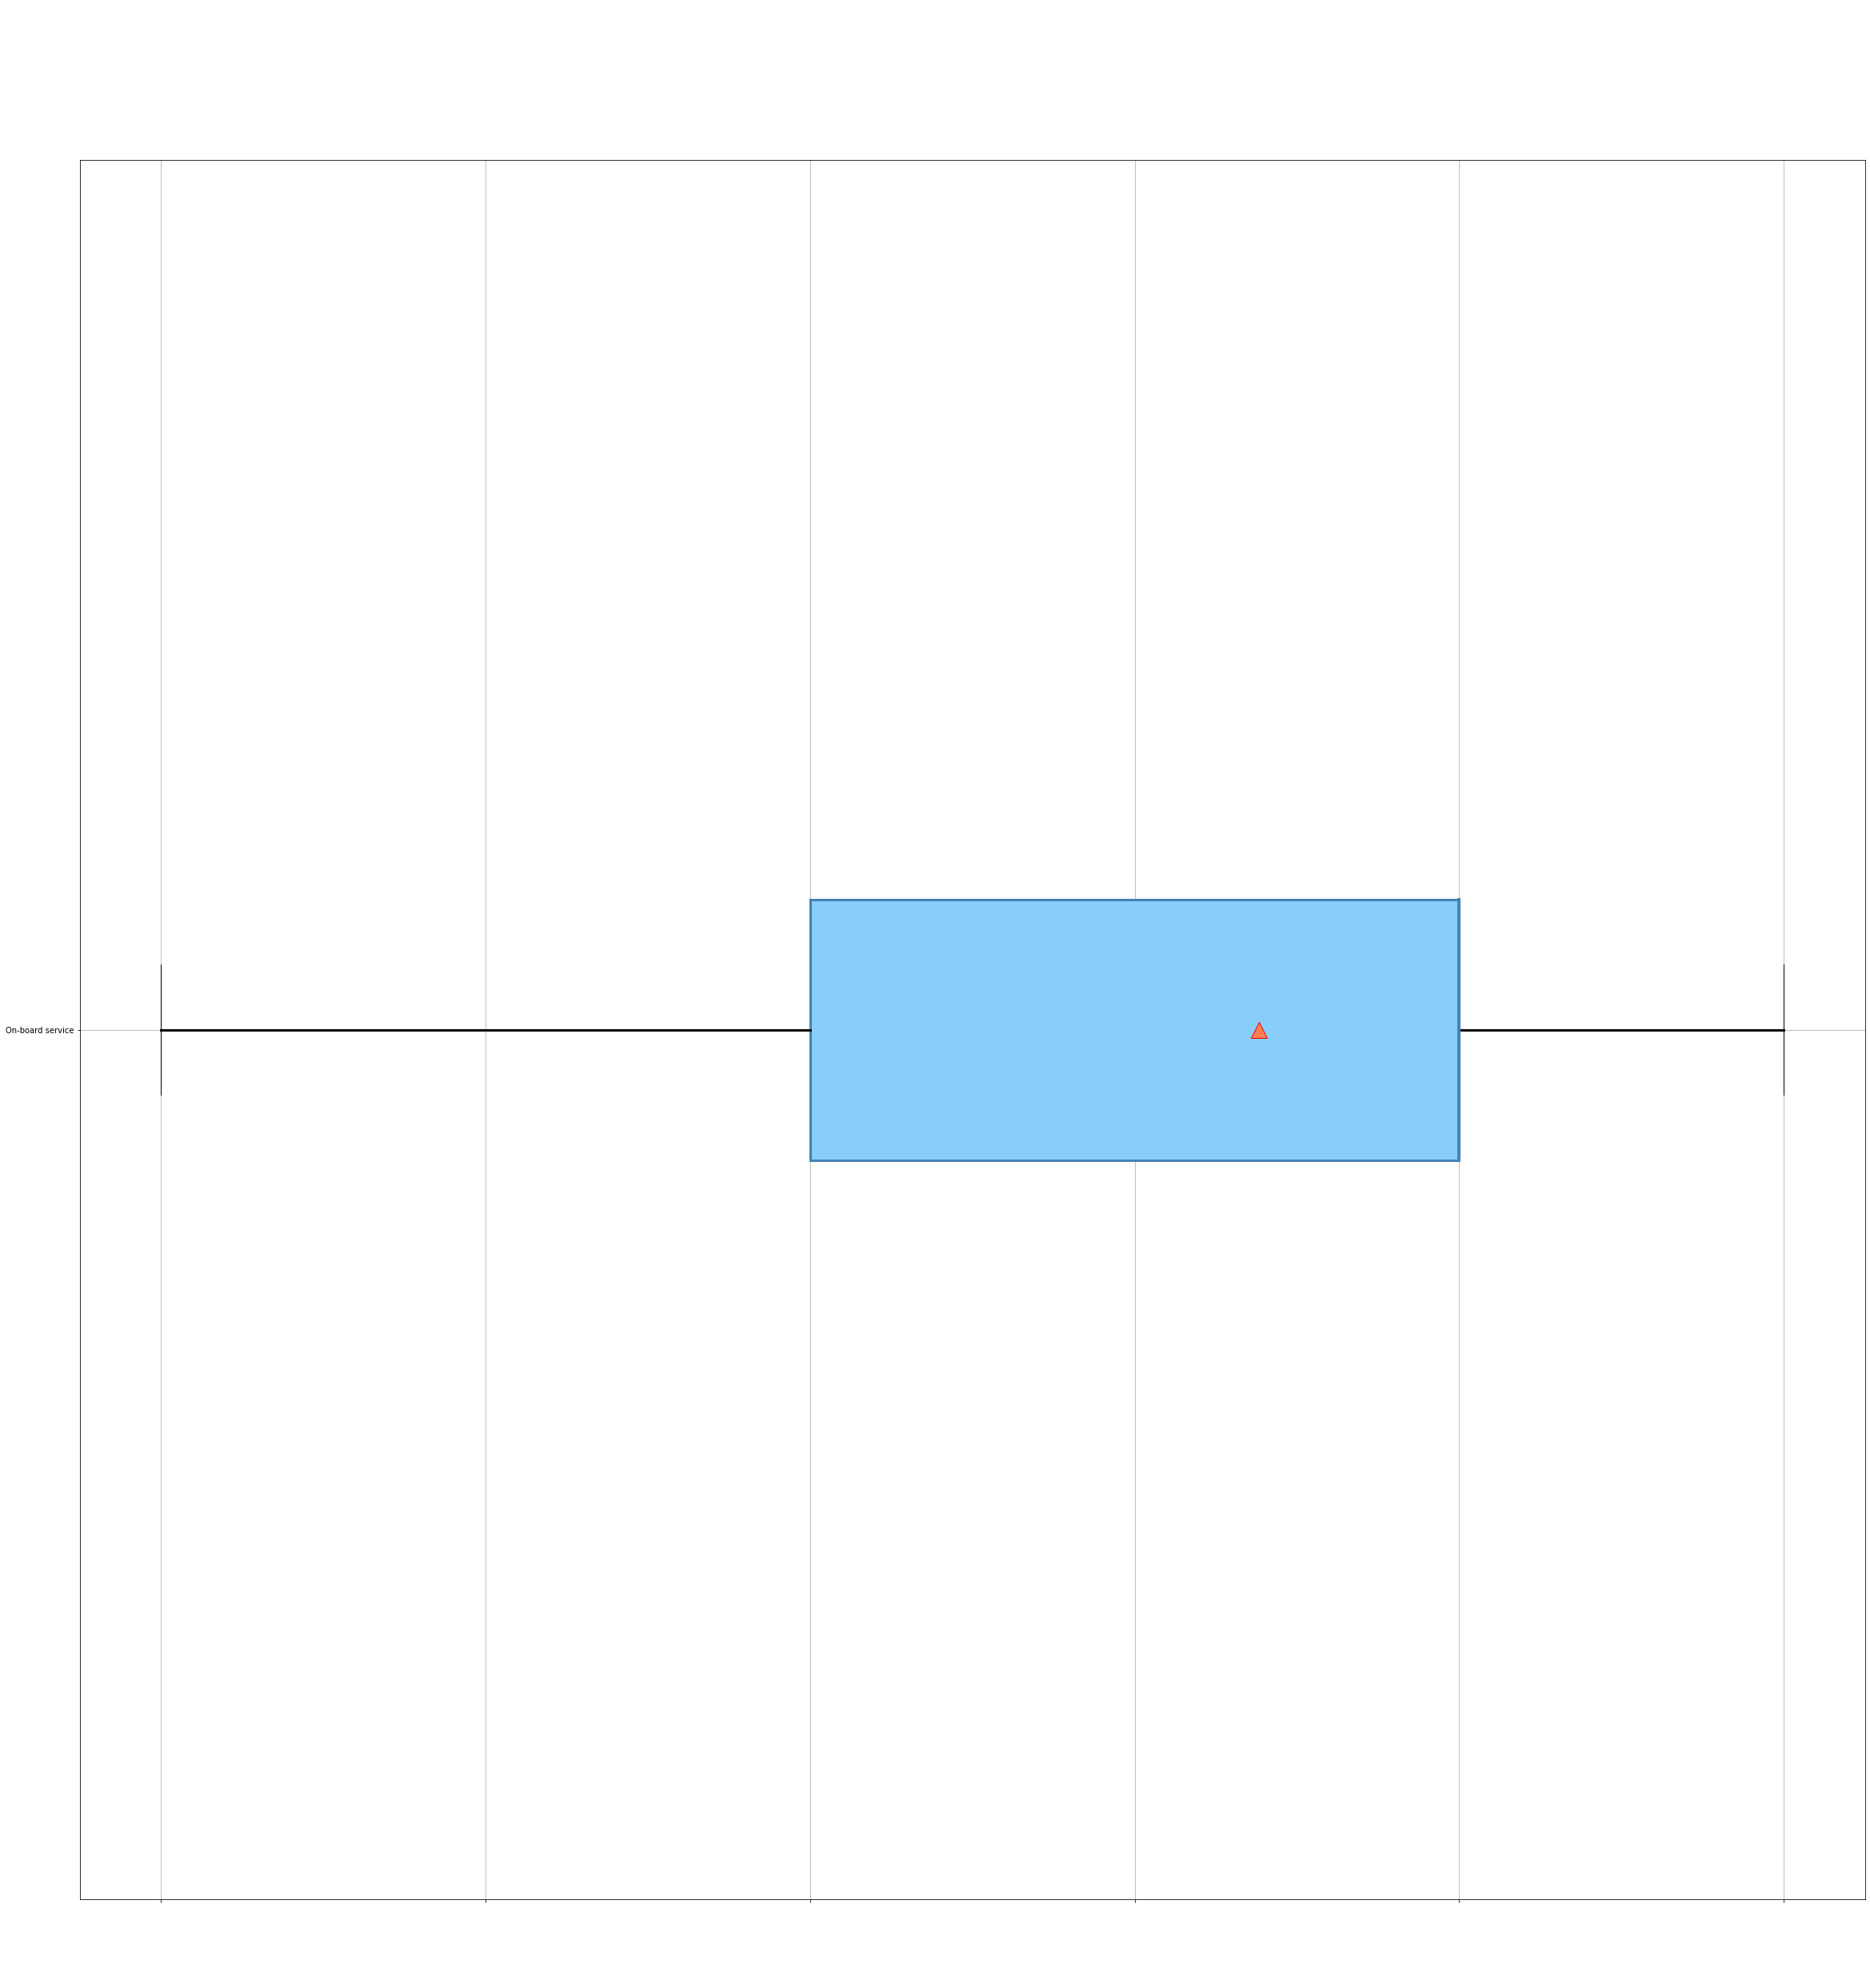

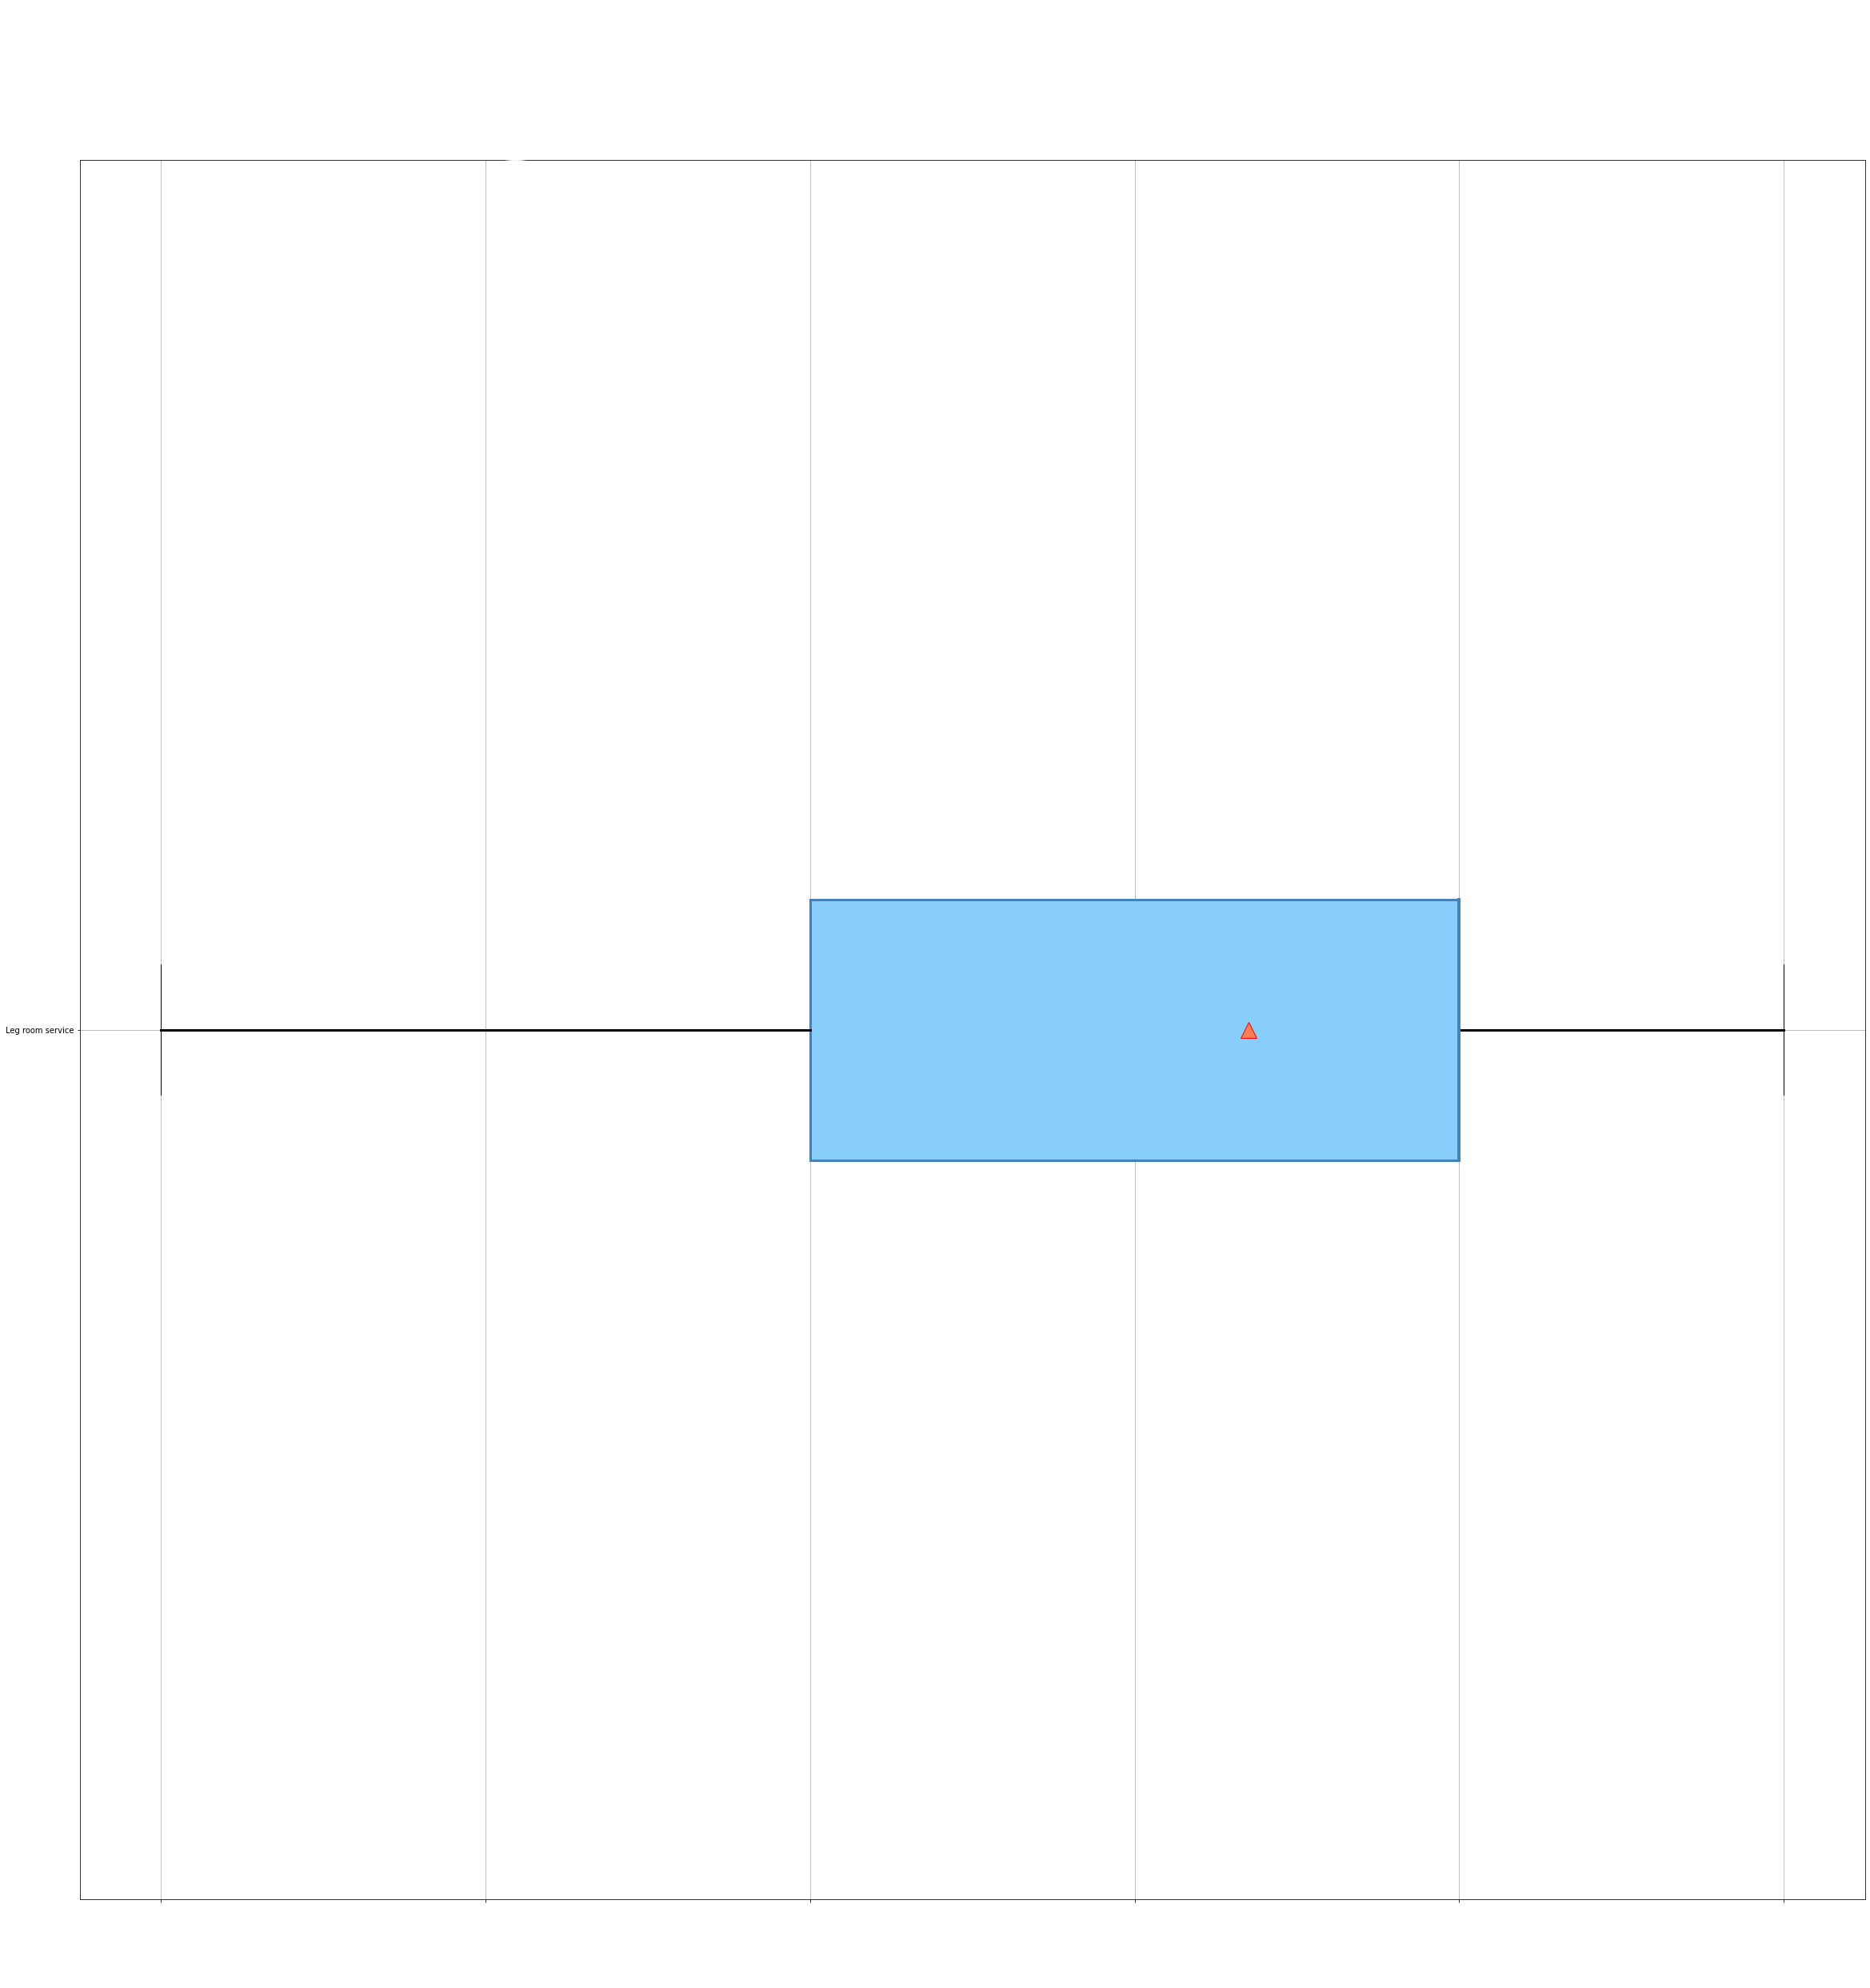

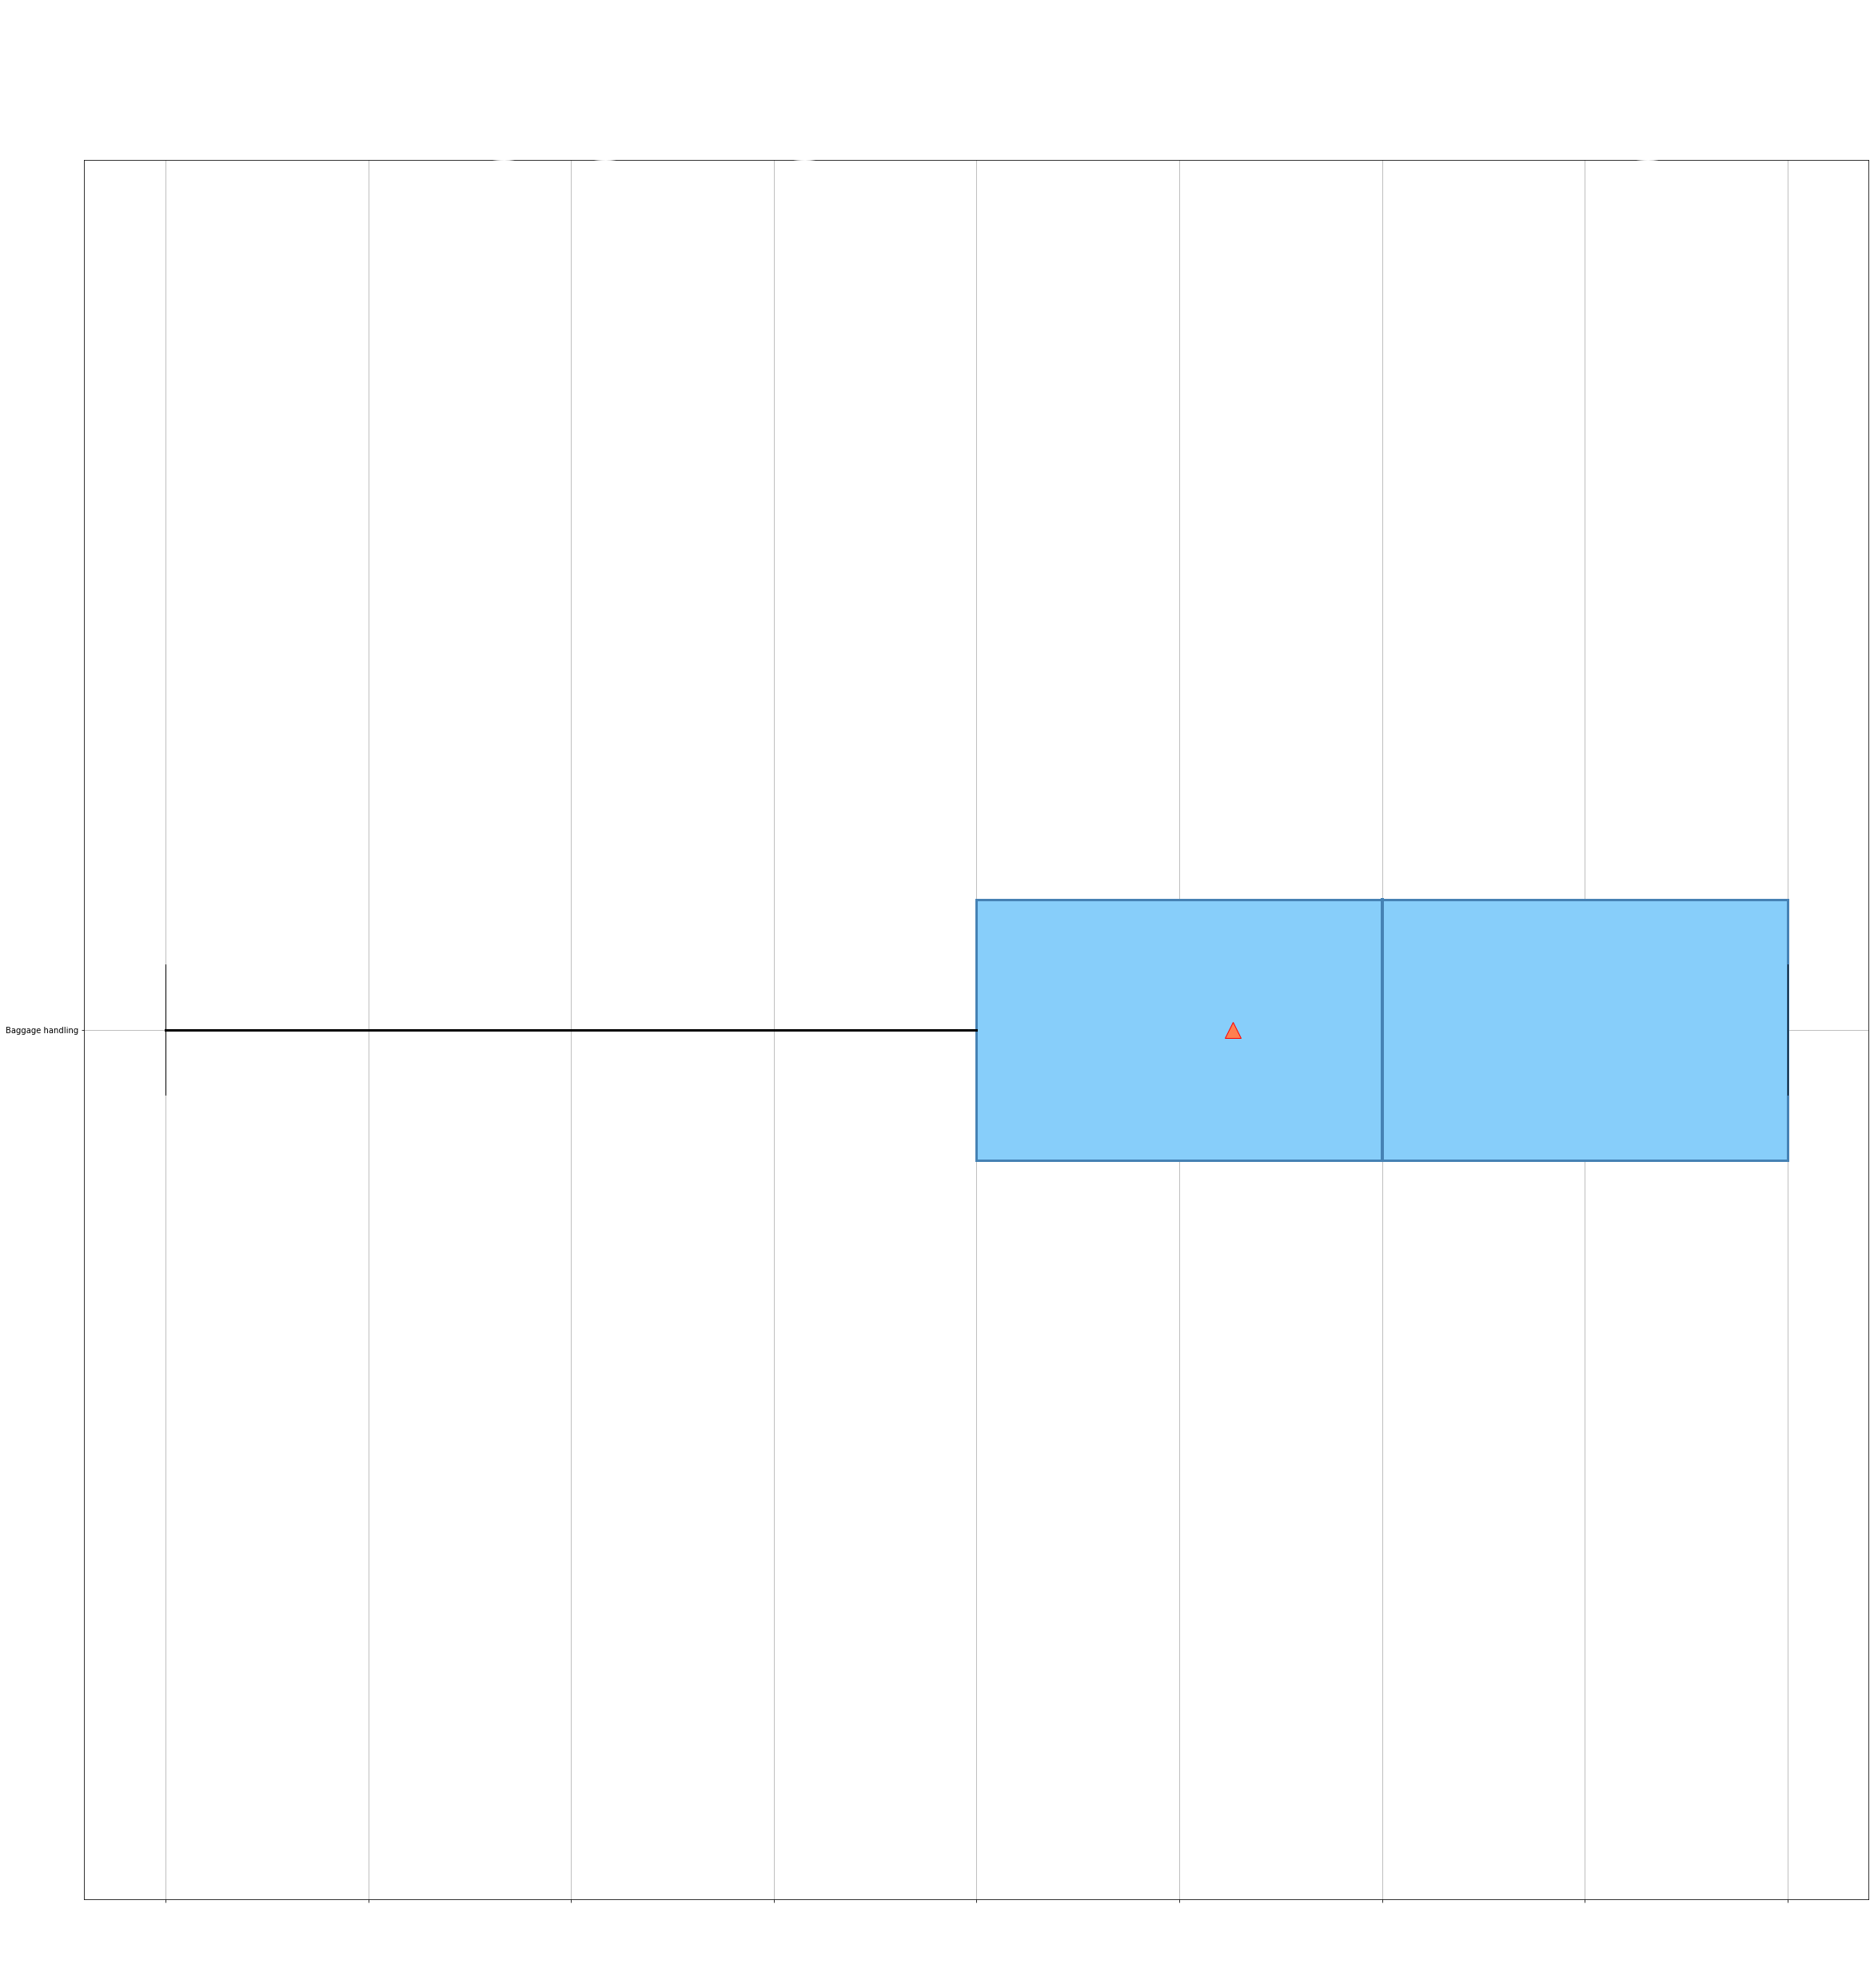

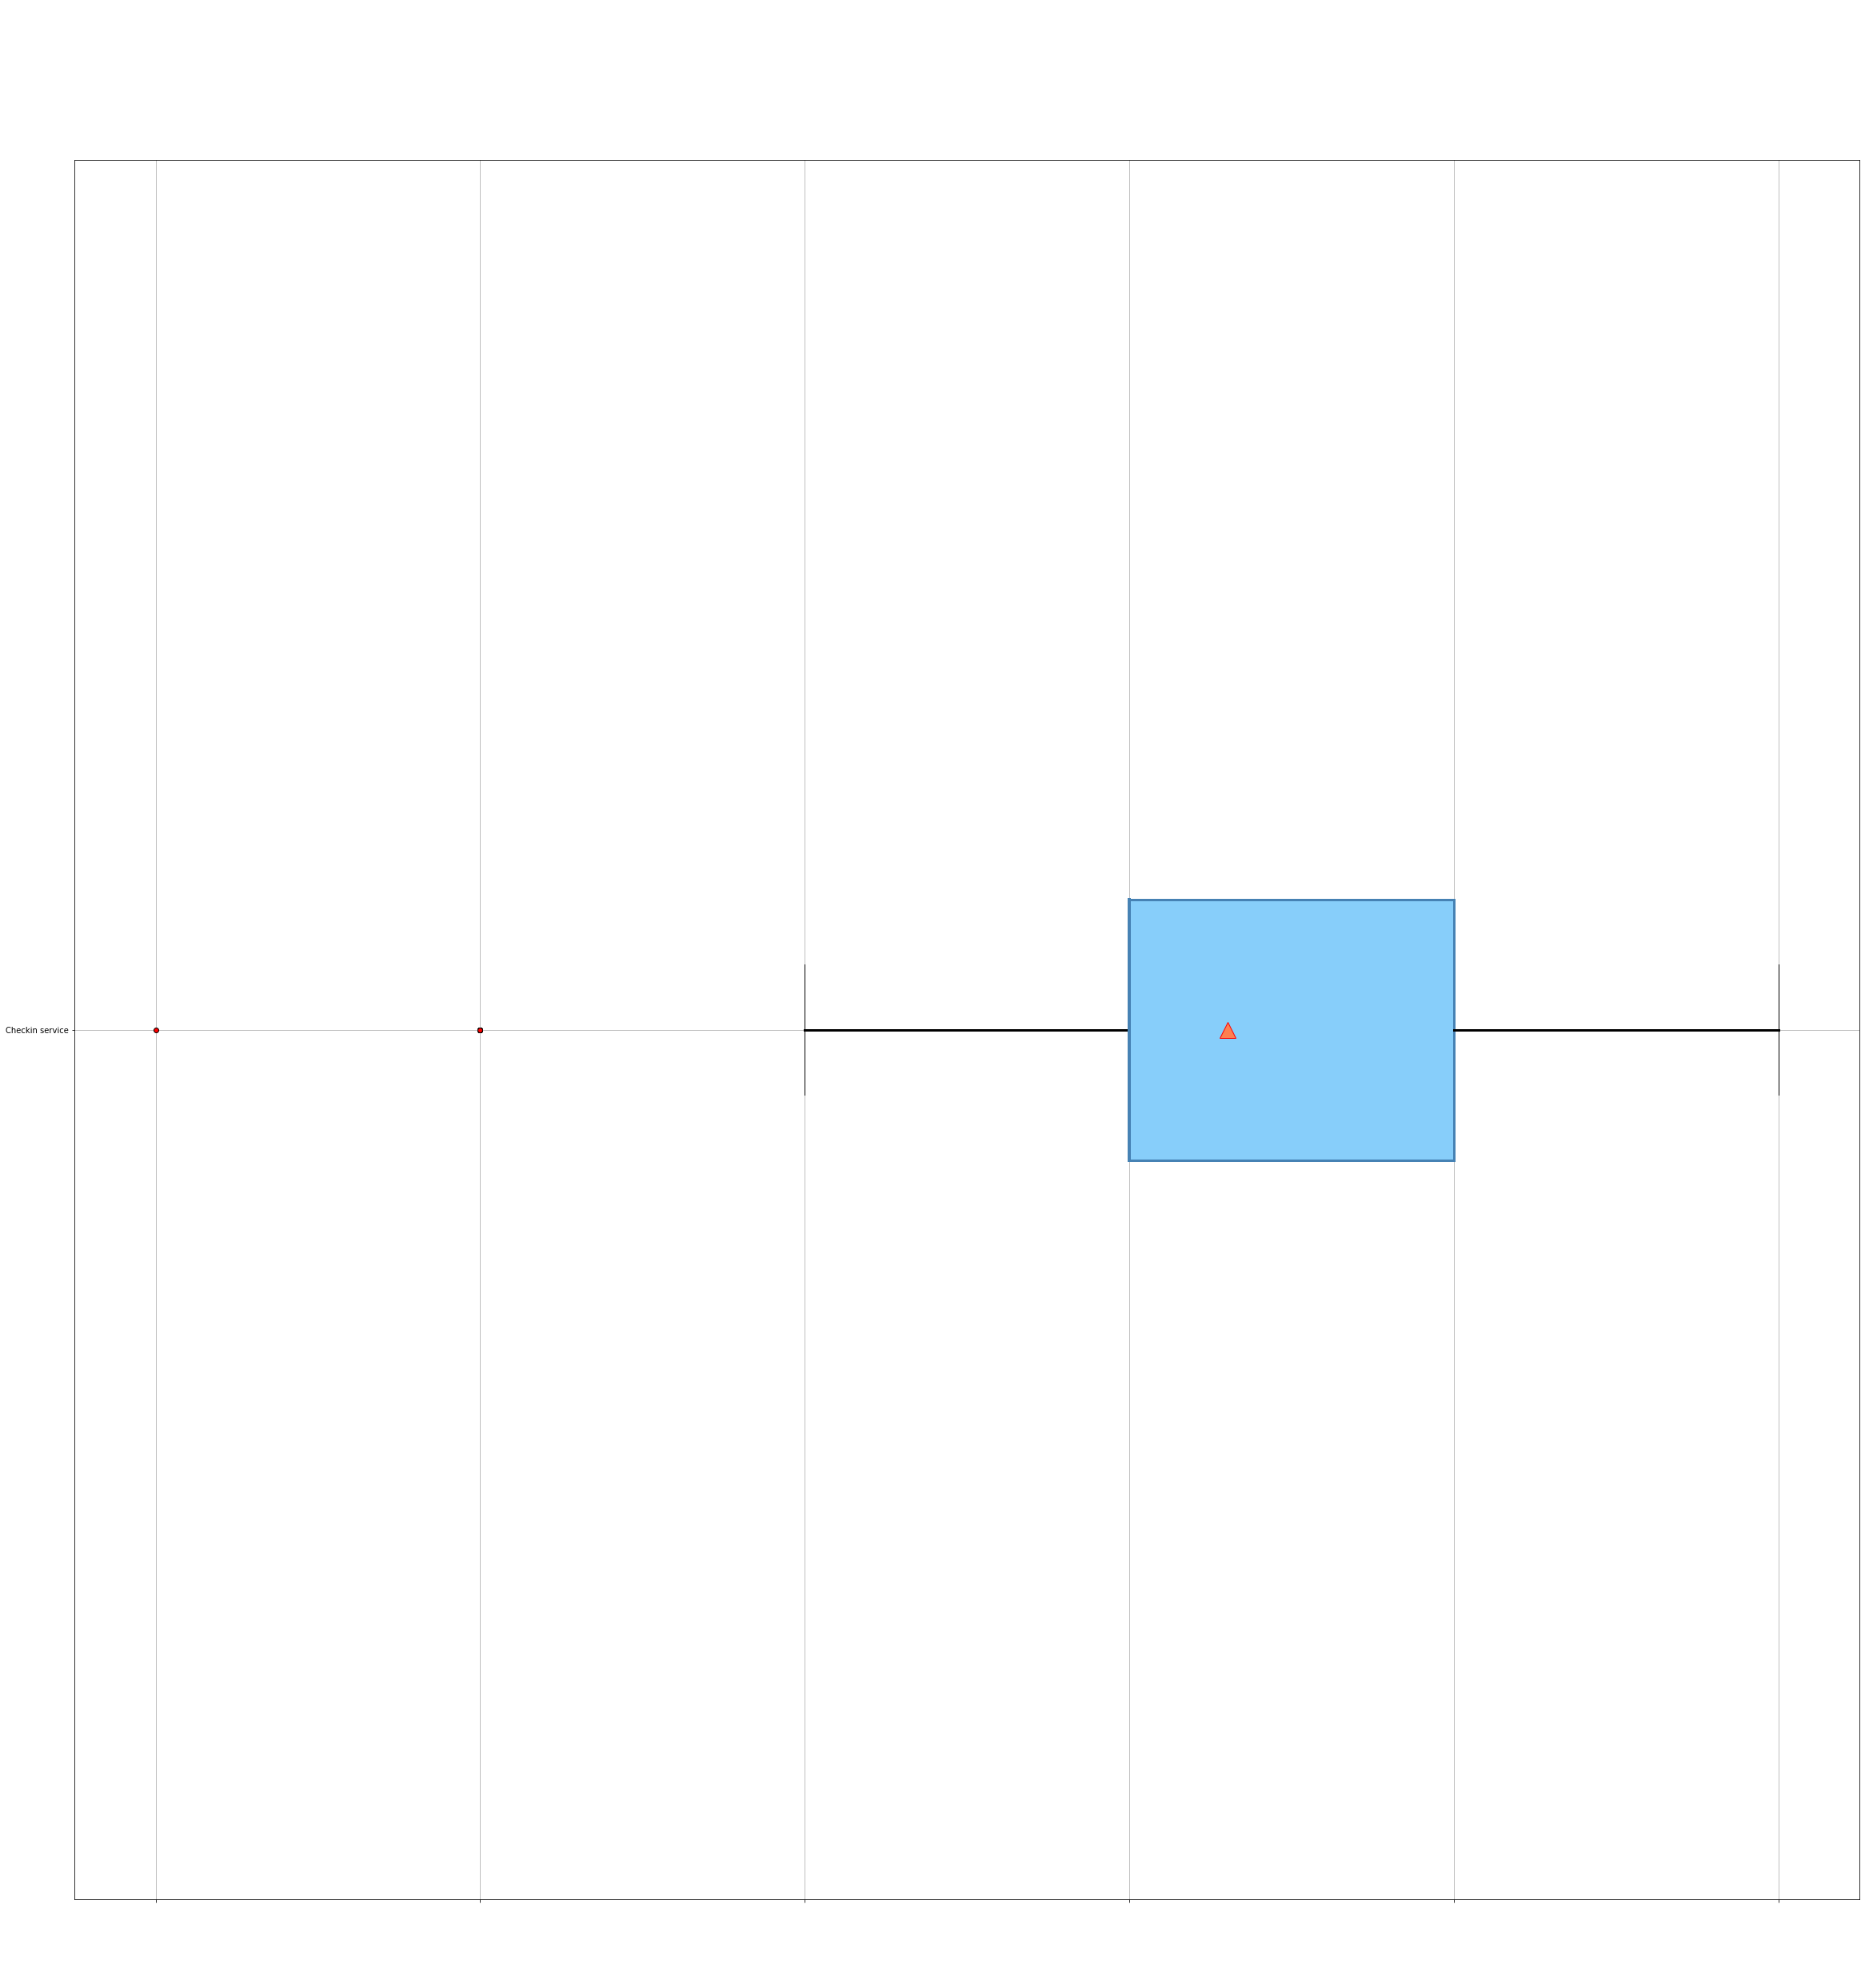

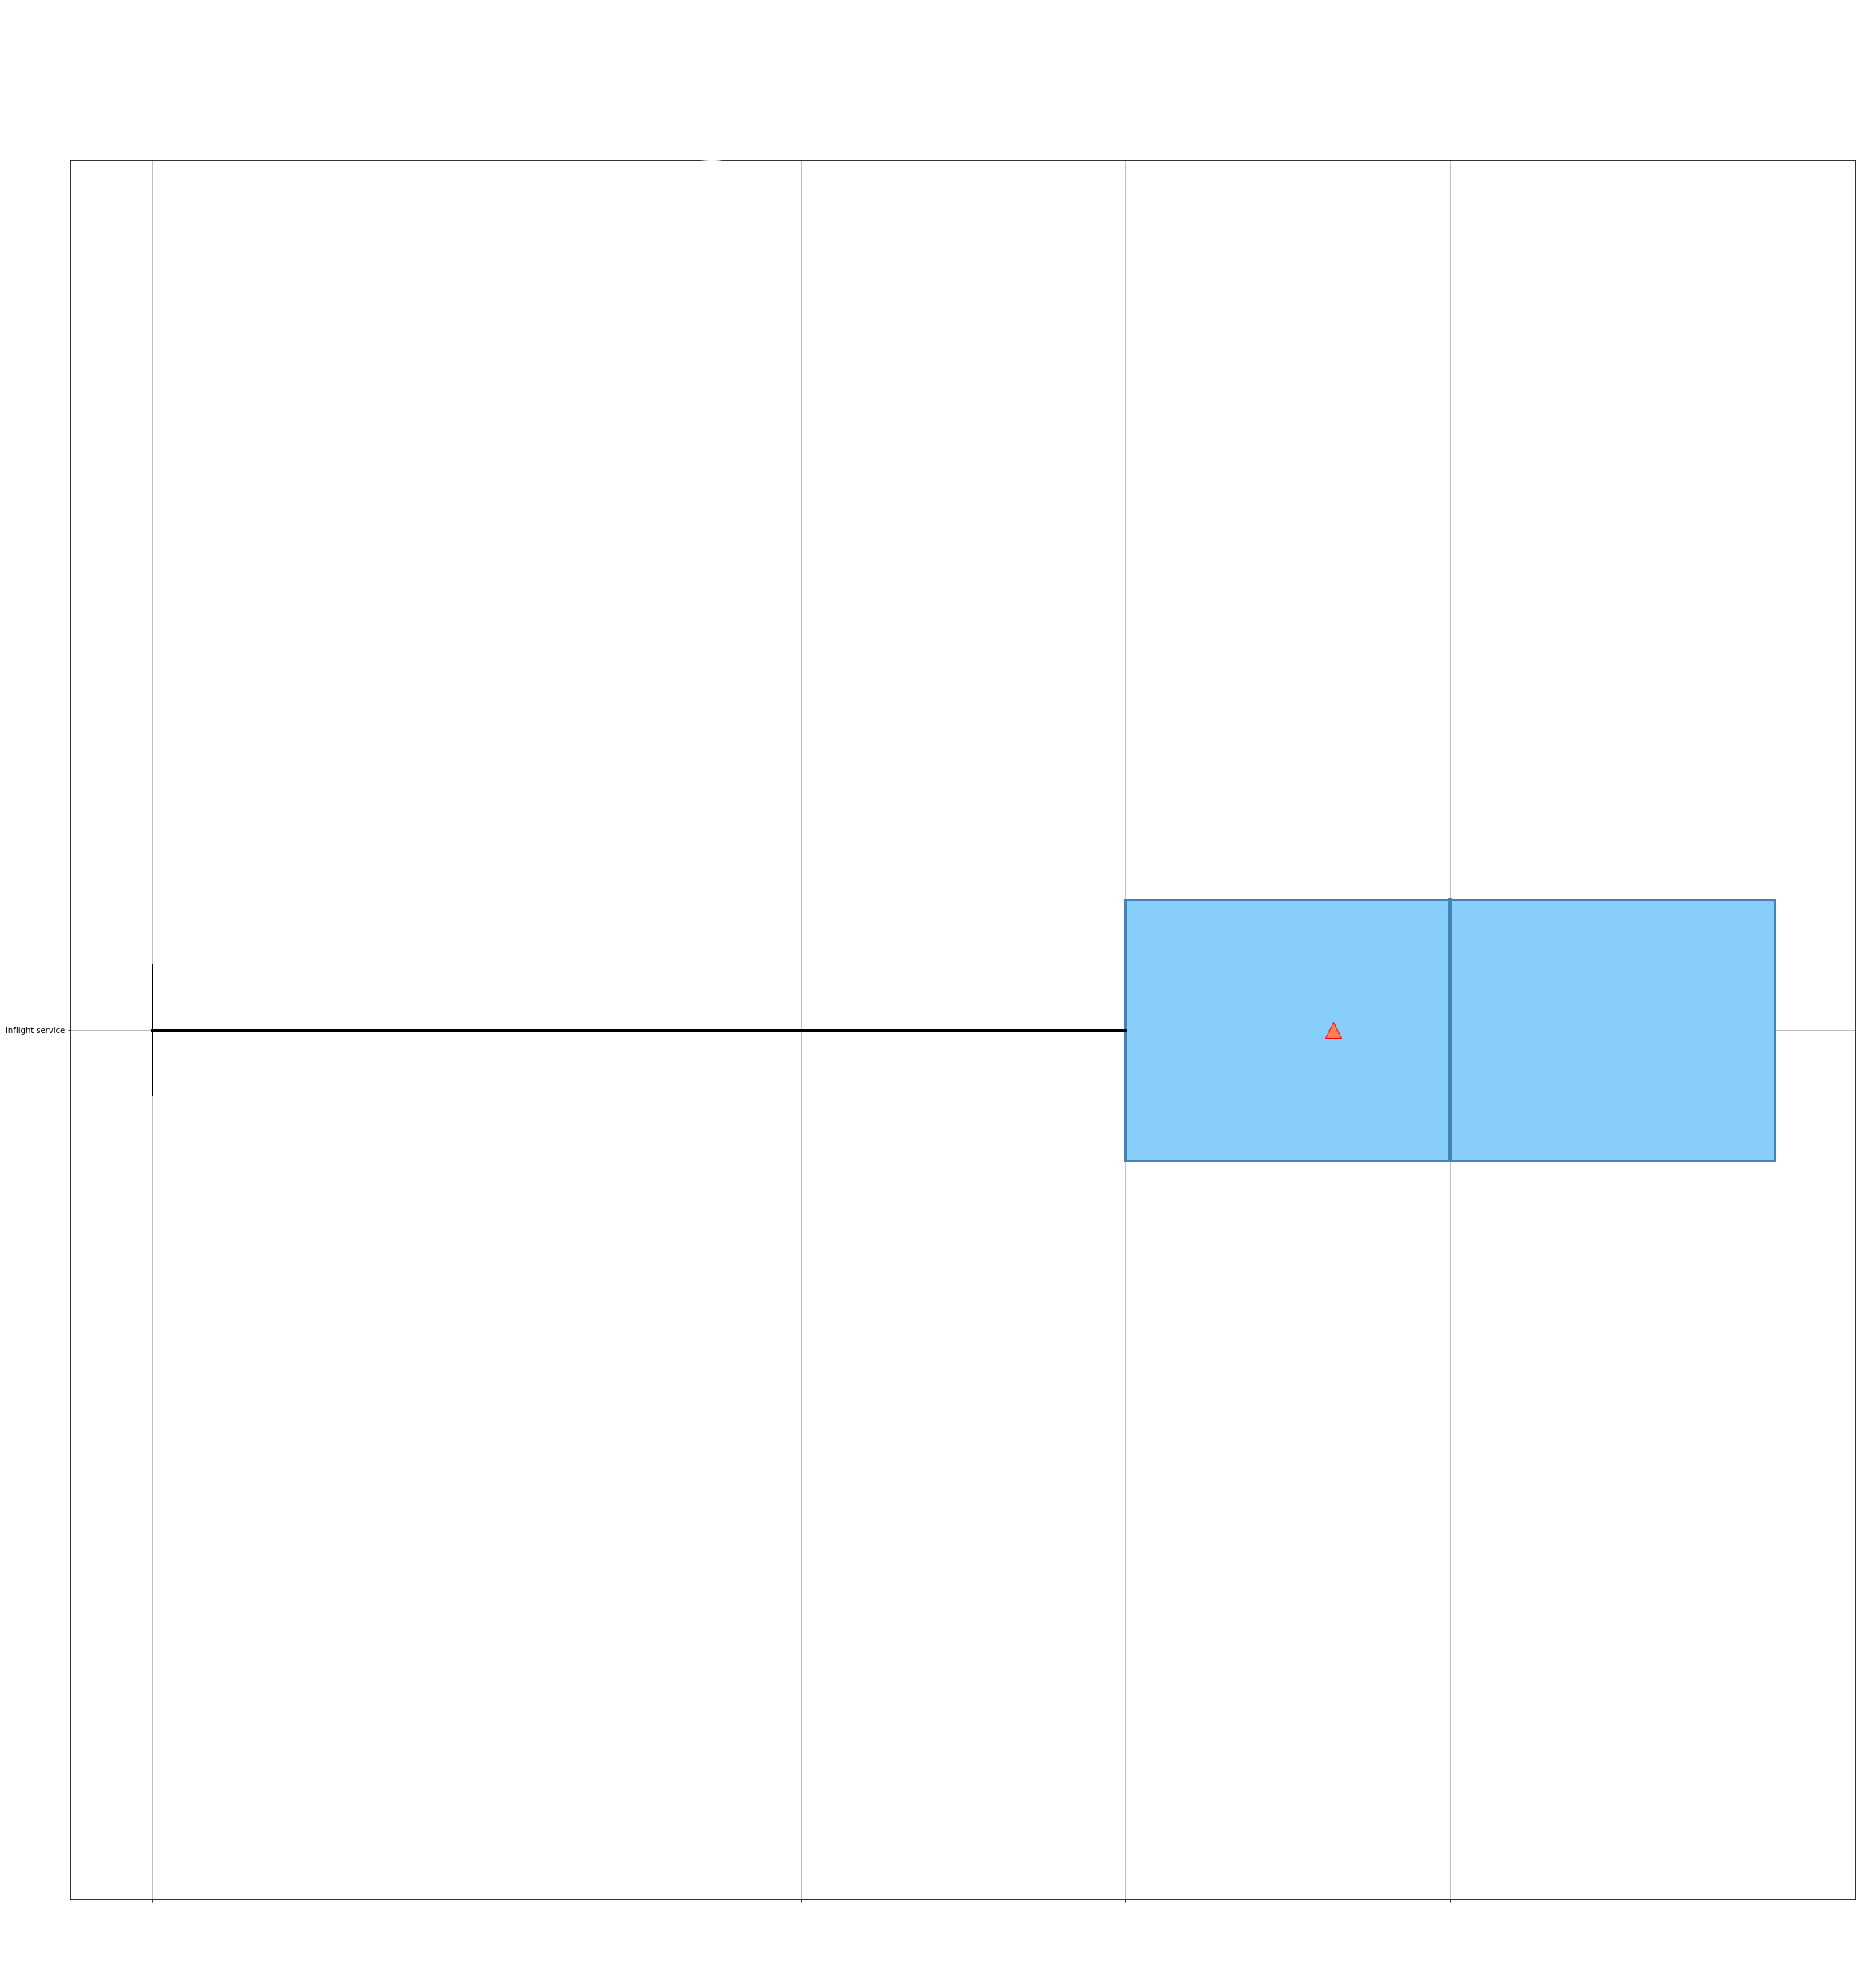

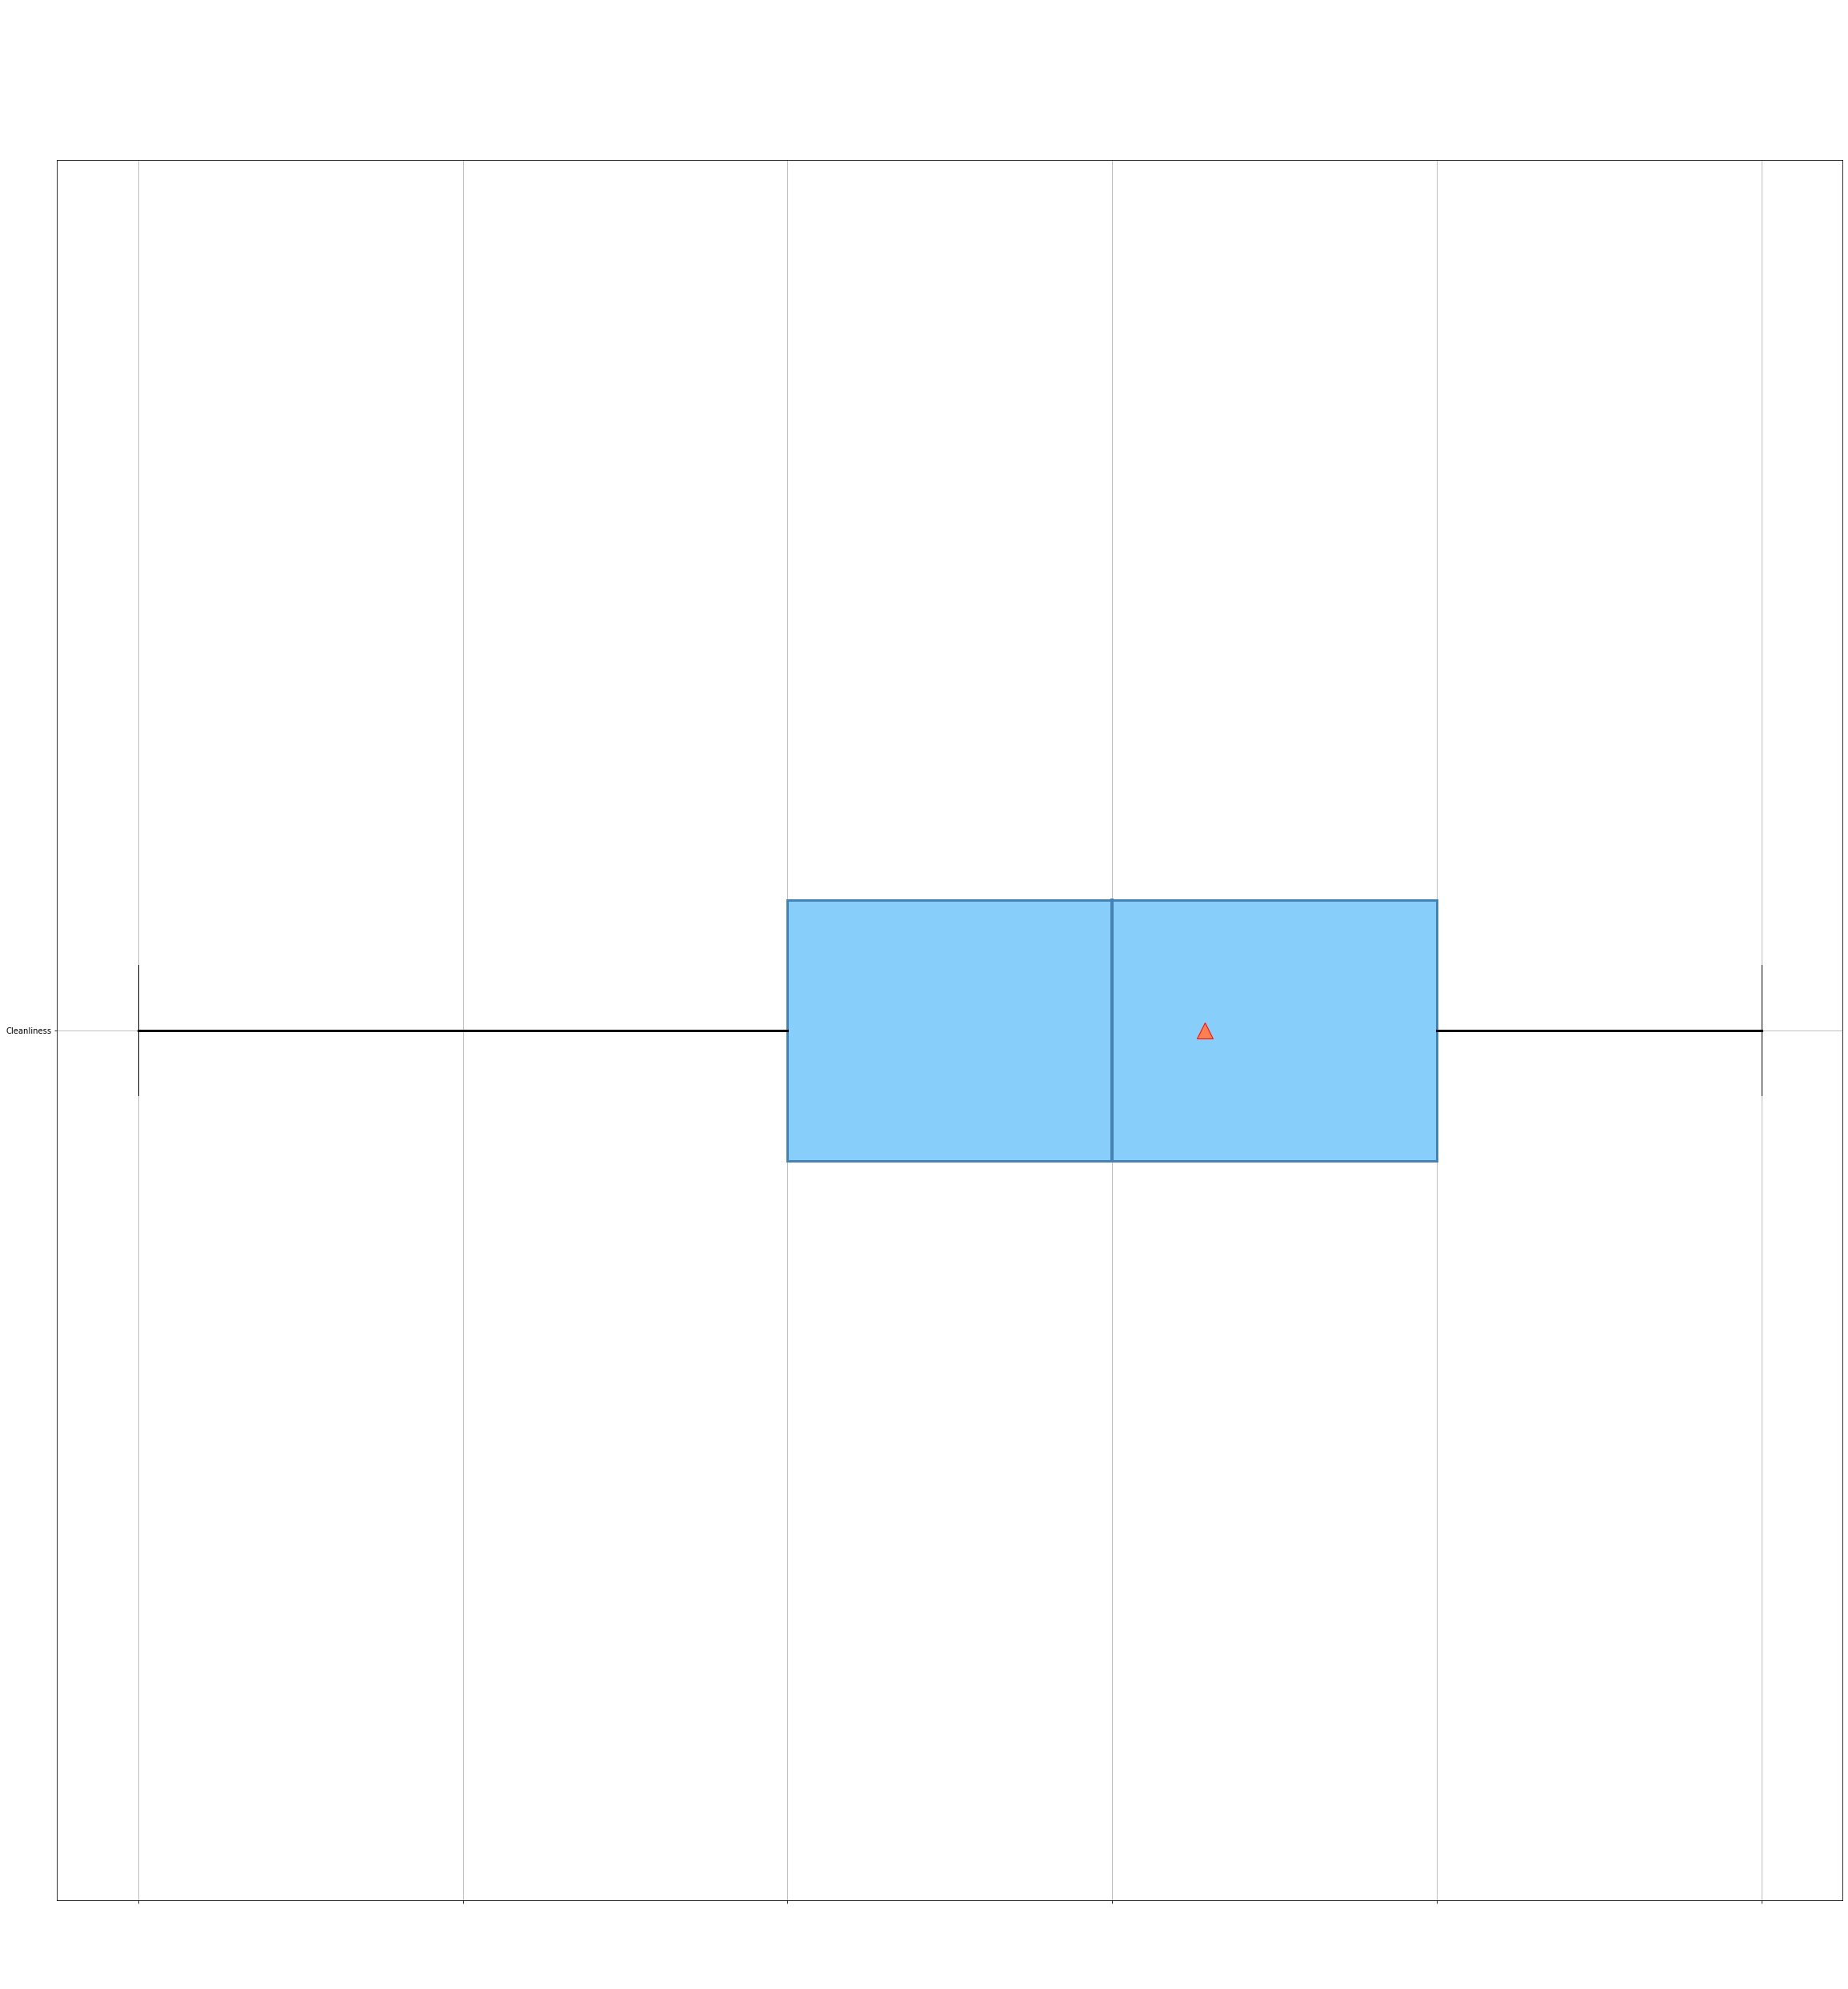

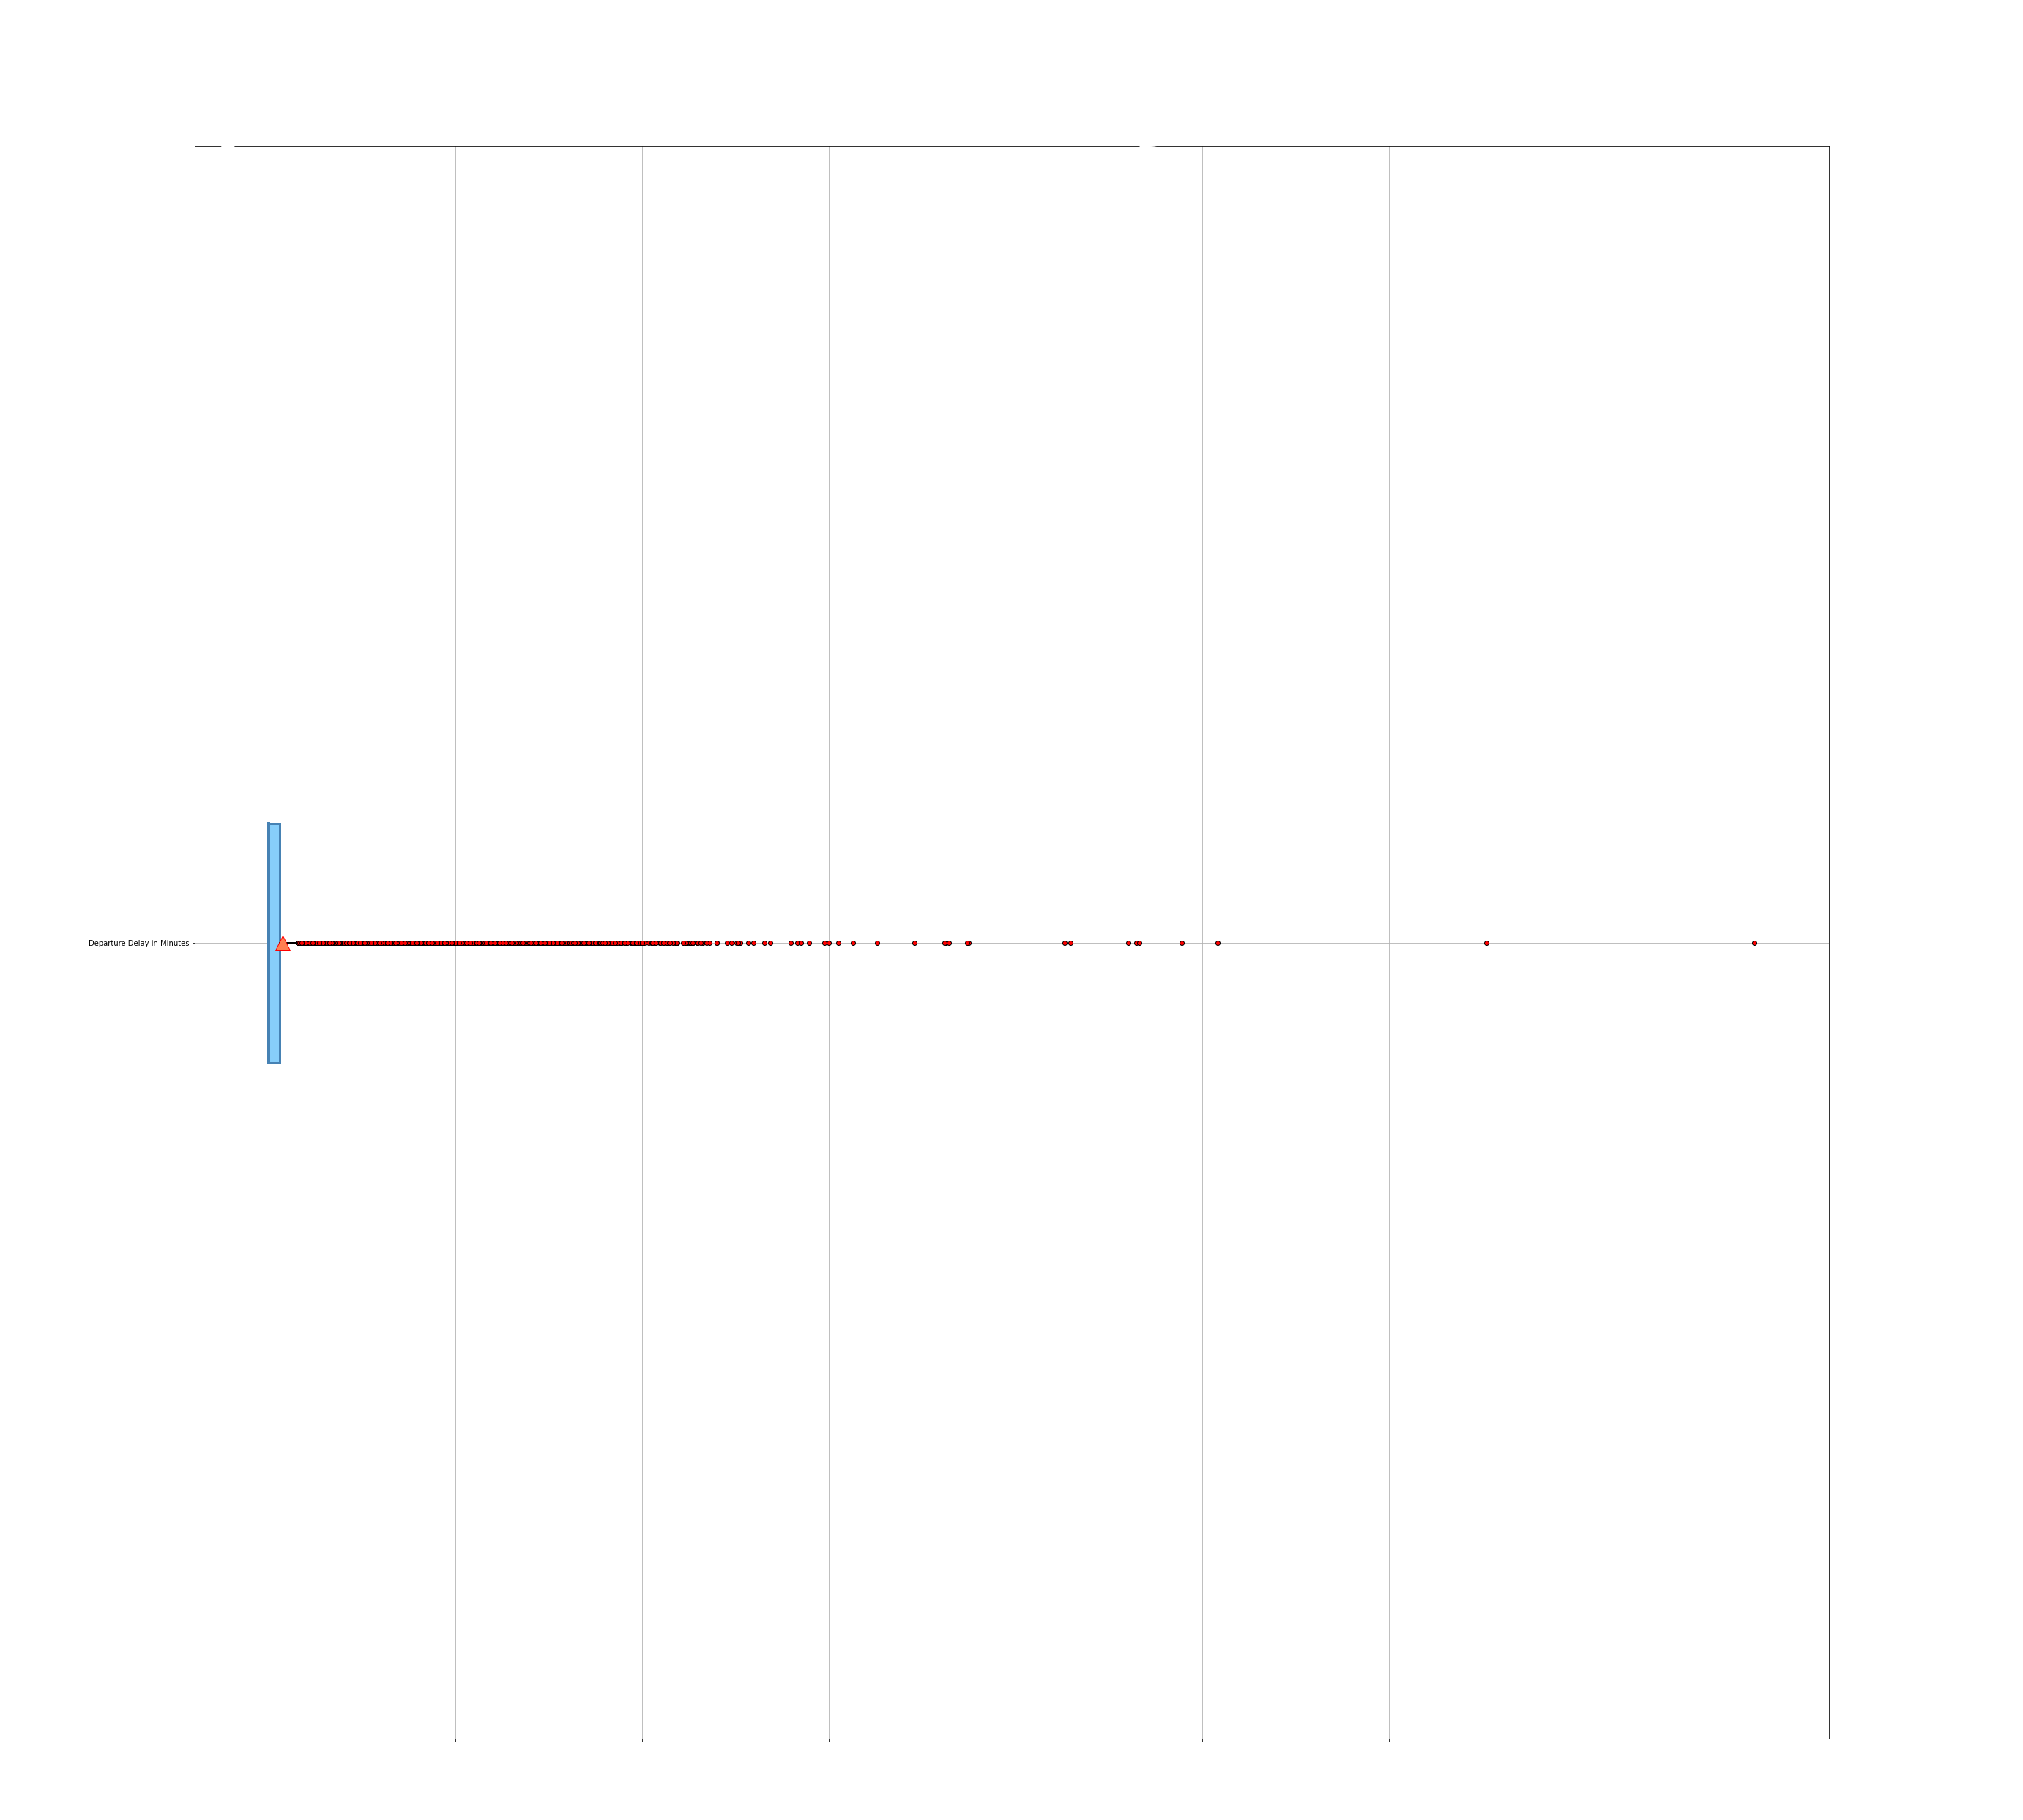

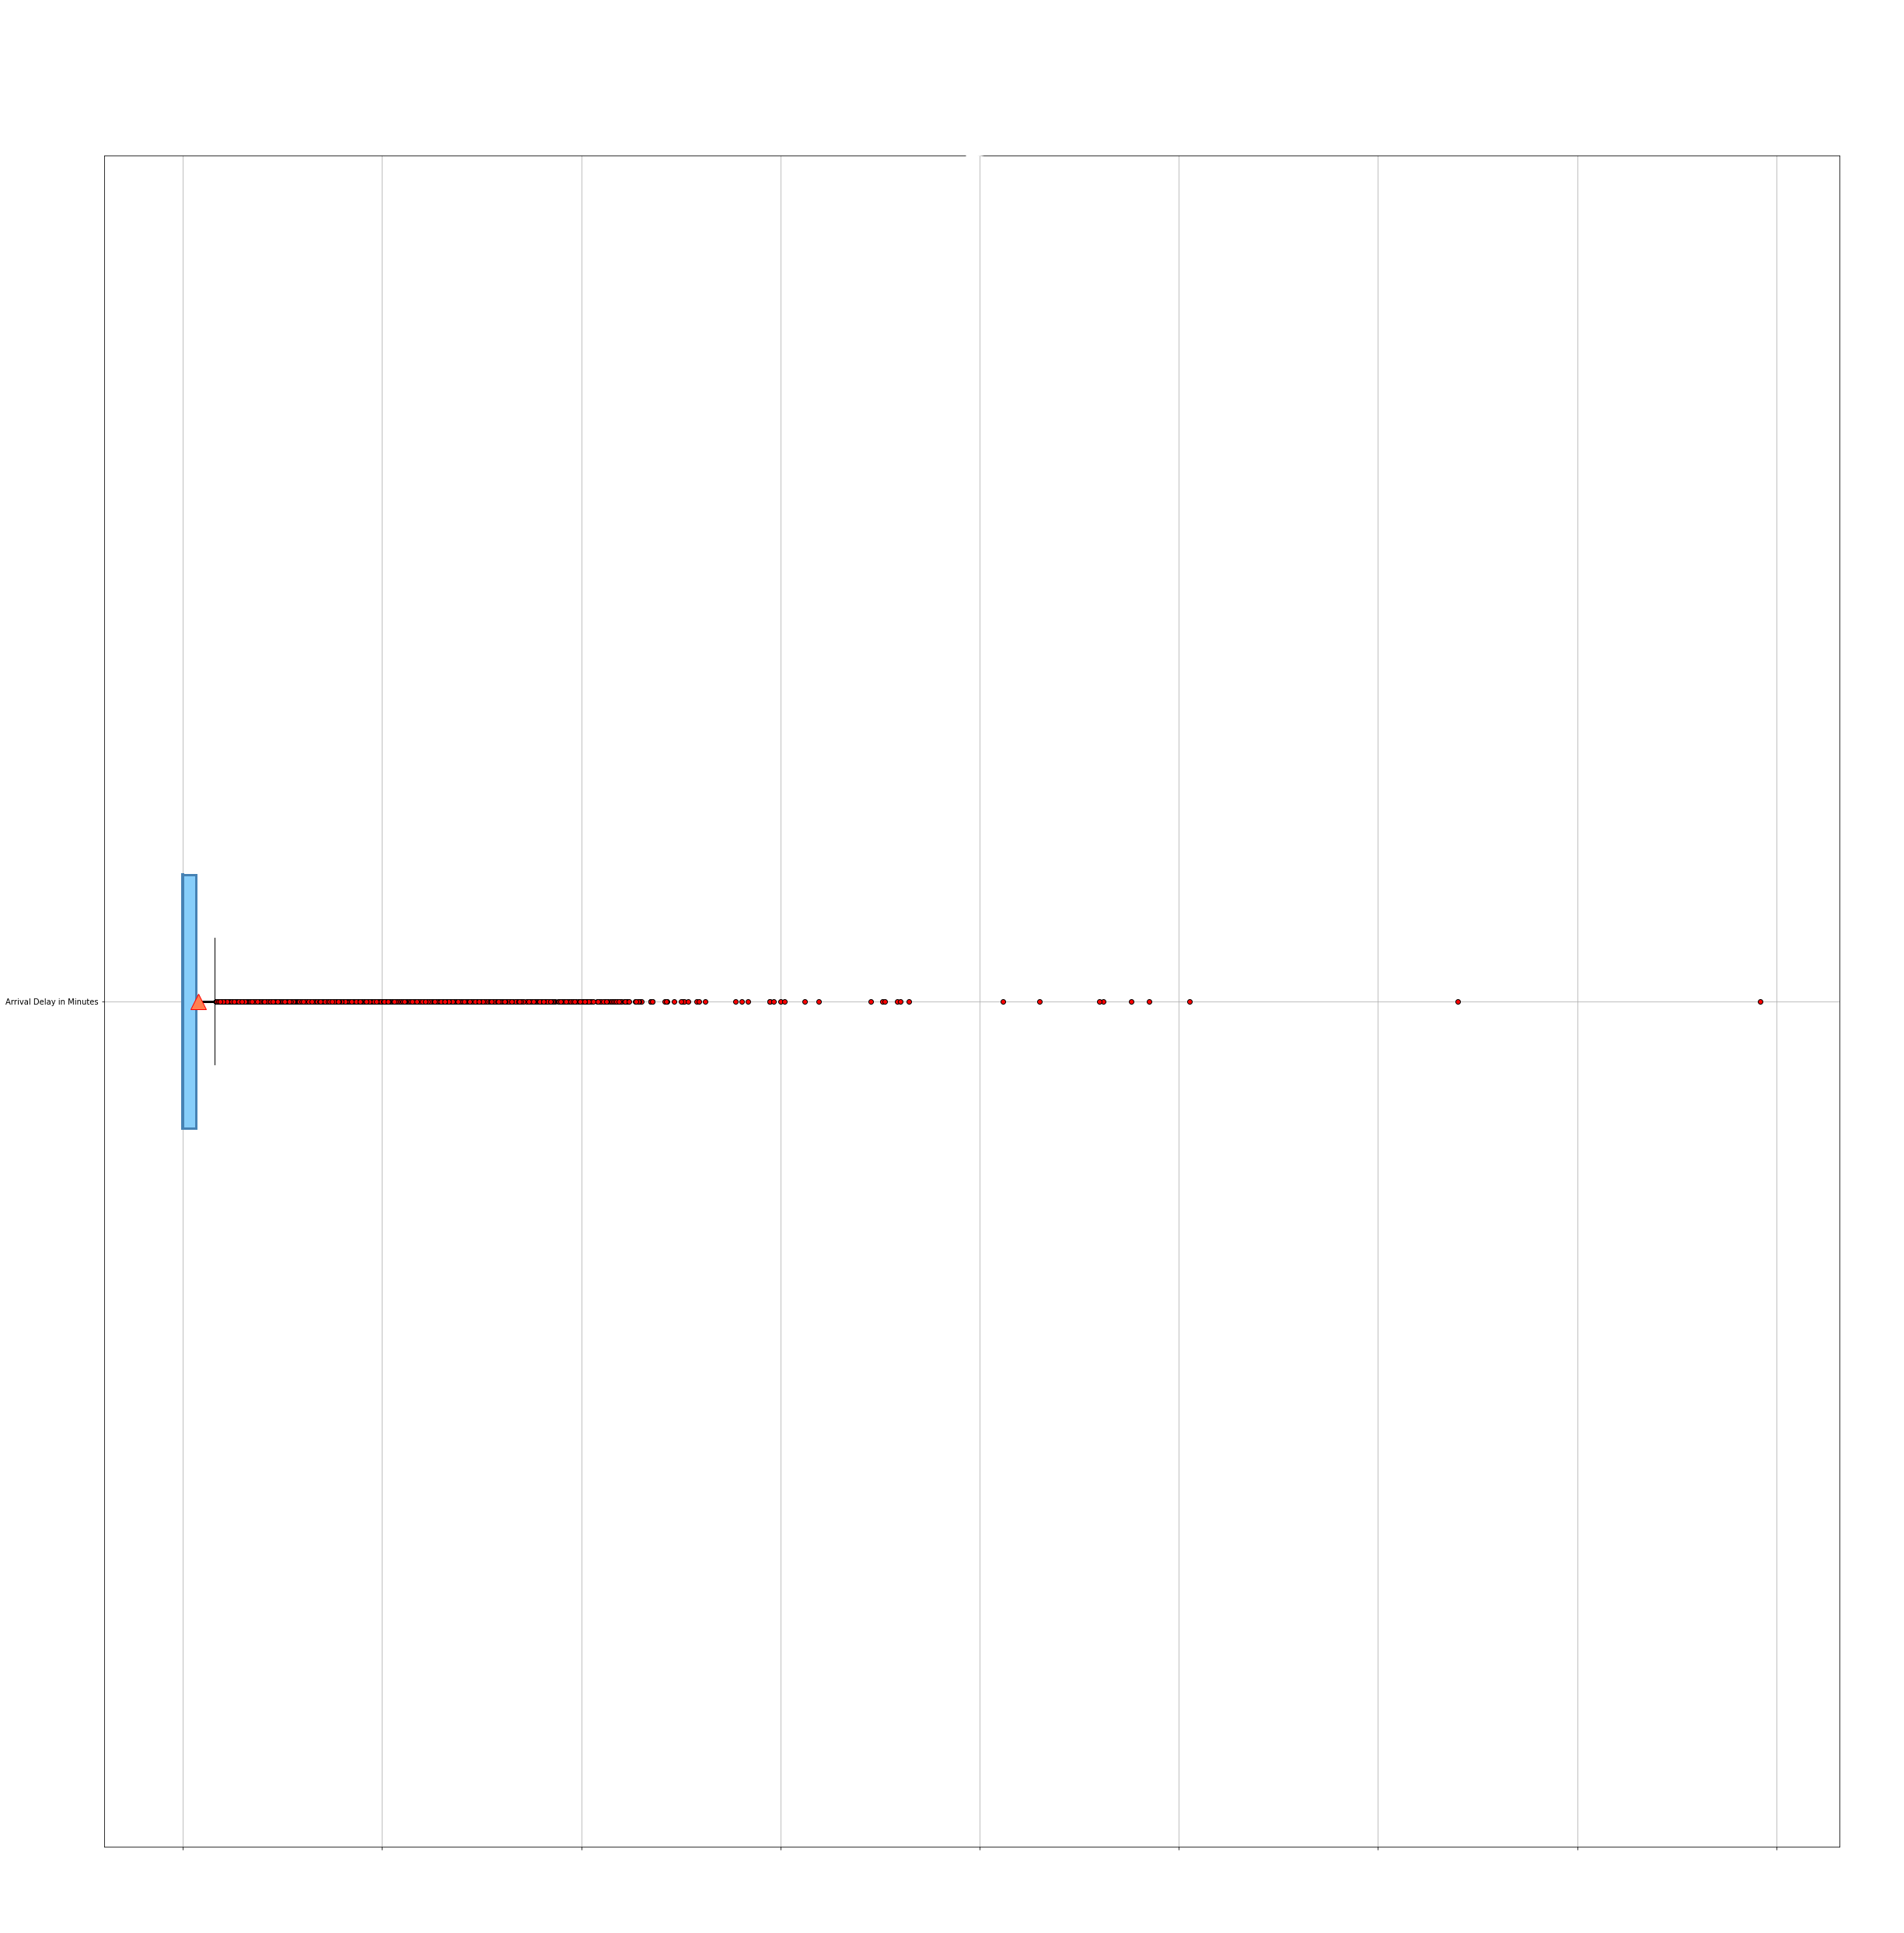

In [200]:
Boxplot_columns=('Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes')
colors = dict(boxes='black', whiskers='black', medians='red', caps='black')
for column in Boxplot_columns:
    plt.figure(figsize=(40,40))
    plt.xticks(fontsize=100,color='white')
    plt.title(column,fontsize = 200,color='white')
    train_nonull.boxplot([column],vert=False,patch_artist=True,showmeans=True,boxprops=dict(color='steelblue', linewidth=3,facecolor='lightskyblue'),medianprops=dict(color='steelblue', linewidth=4),meanprops=dict(markerfacecolor='coral', markersize=20,markeredgecolor='red'),whiskerprops = dict(linestyle='-',linewidth=3.0),flierprops=dict(markerfacecolor='red', marker='o'))

Ho stampato un boxplot di tutte le colonne features per controllare come si comportassero le colonne, in particolare volevo analizzare la media e gli outliers delle varie colonne, per capire quanto fossero simmetriche 

Ho notato che la colonna 'Flight Distance' è l'unica ad avere outliers significativi non correlati con altre colonne. Mentre le due colonne 'Arrival Delay in Minutes' e 'Departure Delay in Minutes' sono molto simili, come avevamo già osservato mediante la matrice di correlazione. Analizzo 'Flight Distance', mentre 'Arrival Delay in Minutes' e 'Departure Delay in Minutes' penso non necessitino di ulteriori analisi in quanto hanno il boxplot molto ravvicinato e gli outliers molto sparsi.

In [13]:
zscore_serie = stats.zscore(train_nonull['Flight Distance'])
mask = zscore_serie > 3
train_outliers = train_nonull[mask]
print("outliers with Z-Score:")
display(train_outliers)

outliers with Z-Score:


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
994,994,59271,26,4243,2,2,2,2,4,4,...,1,0,1,0,1,0,1,0,0,1
2401,2401,59270,25,4963,2,5,2,4,2,5,...,1,0,1,0,0,1,0,1,0,0
2847,2847,31870,63,4983,0,5,0,2,0,5,...,1,0,1,0,0,1,1,0,0,1
5903,5903,58704,25,4243,4,5,3,5,3,4,...,1,0,1,0,1,0,1,0,0,0
11306,11306,58698,22,4243,5,0,5,5,5,5,...,0,1,0,1,1,0,1,0,0,1
11788,11788,58705,52,4243,2,2,2,2,4,4,...,0,1,1,0,1,0,1,0,0,1
15545,15545,56480,45,4963,1,1,1,1,2,1,...,1,0,1,0,1,0,1,0,0,1
18434,18434,31876,31,4983,4,3,3,3,4,4,...,1,0,1,0,1,0,0,1,0,1
18977,18977,53260,42,4817,2,2,2,2,2,2,...,1,0,1,0,1,0,0,0,1,0
19755,19755,31871,50,4983,5,4,5,5,5,1,...,1,0,1,0,1,0,1,0,0,1


In [14]:
train_outliers_rows=train_outliers[zscore_serie>3].index.tolist()
train_nonull_nooutliers= train_nonull.drop(train_outliers_rows)
print("Numero di outliers:")
display(train_nonull_nooutliers.shape[0] - train_nonull.shape[0])
print("Correlazione con outliers:")
display(train_nonull[['Flight Distance','satisfaction']].corr().style.background_gradient(cmap="Spectral"))
print("Correlazione senza Outliers:")
display(train_nonull_nooutliers[['Flight Distance','satisfaction']].corr().style.background_gradient(cmap="Spectral"))


Numero di outliers:


/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_45413/3617244254.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_outliers_rows=train_outliers[zscore_serie>3].index.tolist()


-58

Correlazione con outliers:


,Flight Distance,satisfaction
Flight Distance,1.000000,0.298915
satisfaction,0.298915,1.000000


Correlazione senza Outliers:


,Flight Distance,satisfaction
Flight Distance,1.000000,0.299566
satisfaction,0.299566,1.000000


L'eliminazione degli outliers non ha portato a un cambio drastico della correlazione, questo è dovuto al fatto del basso numero di outliers 58 su 103594. Penso di mantenere gli outliers di 'Flight Distance' in quanto penso possano dare elementi aggiuntivi agli algoritmi per apprendere al meglio rispetto a una situazione inedita.

Ora verifico se estistono valori doppo di 'id', in quanto esiste già la colonna 'Unnamed: 0' come riferimento per le singole entranze del dataframe ed è ordinata come il numero di righe.

In [15]:
train_nonull.drop_duplicates(subset=['id'], keep='first')

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0,70172,13,460,3,4,3,1,5,3,...,0,1,1,0,0,1,0,0,1,0
1,1,5047,25,235,3,2,3,3,1,3,...,0,1,0,1,1,0,1,0,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,1,0,1,0,1,0,1,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,...,1,0,1,0,1,0,1,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,...,1,0,0,1,1,0,0,1,0,0
103900,103900,73097,49,2347,4,4,4,4,2,4,...,0,1,1,0,1,0,1,0,0,1
103901,103901,68825,30,1995,1,1,1,3,4,1,...,0,1,0,1,1,0,1,0,0,0
103902,103902,54173,22,1000,1,1,1,5,1,1,...,1,0,0,1,1,0,0,1,0,0


Elimino le colonne che reputo inutili e fuorvianti per il dataset.
Queste sono 'Unnamed: 0' che rappresenta semplicemente le righe del dataframe, ma all'interno della colonna.
'id' invece potrebbe essere l'identificativo del viaggio o del cliente, in ogni caso non da informazioni utili che possano essere usate per trainare il modello di machine learning.

In [16]:
train_nonull_columns_dropped= train_nonull.columns.drop(['Unnamed: 0','id'])
train_nonull_columns_dropped
train_nonull_cleaned = train_nonull[train_nonull_columns_dropped]
test_nonull_cleaned= test_nonull[train_nonull_columns_dropped]

# Preprocessing


# 3.1 Train -Test split

Per prima cosa identifichiamo la matrice delle features e la matrice target.
Chiameremo la matrice delle feature X, mentre quella target y.
Le features sono le colonne del nostro dataset che descrivono le condizioni in cui la y assume quel valore specifico, sia essa una categoria oppure una variabile continua.

Train Test Split:
Solitamente separiamo il dataset di train da quello di test utilizzando la funzione train_test_split di sklearn, ma in questo caso le i file originali era già suddivisi.

In [17]:
new_columns=train_nonull_cleaned.columns.drop('satisfaction')
X_train=train_nonull_cleaned[new_columns]
y_train=train_nonull_cleaned['satisfaction']
X_test=test_nonull_cleaned[new_columns]
y_test=test_nonull_cleaned['satisfaction']

print(
    " xtrain =>",X_train.shape,"\n",
    "xtest =>",X_test.shape,"\n",
    "ytrain =>",y_train.shape,"\n",
    "ytest =>",y_test.shape
)

 xtrain => (103594, 27) 
 xtest => (25893, 27) 
 ytrain => (103594,) 
 ytest => (25893,)


## 3.2 Encoding

Già fatto prima per poter poter eseguire un EDA.

## 3.3 Scaling

Lo scaling permette di normalizzare il range di variazione delle caratteristiche (feature) di un dataframe. Esistono vari scaler, ma ho deciso di utilizzare MinMaxScaler in quanto uno degli algoritmi utilizzerà il KNN.

In [18]:
for col in train_nonull_cleaned.columns:
    print(f"col: {col} -> {train_nonull_cleaned[col].min(), train_nonull_cleaned[col].max()}")

col: Age -> (7, 85)
col: Flight Distance -> (31, 4983)
col: Inflight wifi service -> (0, 5)
col: Departure/Arrival time convenient -> (0, 5)
col: Ease of Online booking -> (0, 5)
col: Gate location -> (0, 5)
col: Food and drink -> (0, 5)
col: Online boarding -> (0, 5)
col: Seat comfort -> (0, 5)
col: Inflight entertainment -> (0, 5)
col: On-board service -> (0, 5)
col: Leg room service -> (0, 5)
col: Baggage handling -> (1, 5)
col: Checkin service -> (0, 5)
col: Inflight service -> (0, 5)
col: Cleanliness -> (0, 5)
col: Departure Delay in Minutes -> (0, 1592)
col: Arrival Delay in Minutes -> (0.0, 1584.0)
col: Gender_Female -> (0, 1)
col: Gender_Male -> (0, 1)
col: Customer Type_Loyal Customer -> (0, 1)
col: Customer Type_disloyal Customer -> (0, 1)
col: Type of Travel_Business travel -> (0, 1)
col: Type of Travel_Personal Travel -> (0, 1)
col: Class_Business -> (0, 1)
col: Class_Eco -> (0, 1)
col: Class_Eco Plus -> (0, 1)
col: satisfaction -> (0, 1)


In [19]:
columns_X_train=X_train.columns
scaler = MinMaxScaler()
X_train[columns_X_train] = scaler.fit_transform(X_train[columns_X_train])
X_test[columns_X_train] = scaler.fit_transform(X_test[columns_X_train])

display(X_train)
display(X_test)

/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_45413/3277562894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columns_X_train] = scaler.fit_transform(X_train[columns_X_train])
/var/folders/31/qcs22hcn6wl14syxlxyk6w940000gn/T/ipykernel_45413/3277562894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[columns_X_train] = scaler.fit_transform(X_test[columns_X_train])


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.011364,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.003788,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.005682,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.205128,0.032512,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,...,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
103900,0.538462,0.467690,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
103901,0.294872,0.396607,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,...,0.008838,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
103902,0.192308,0.195679,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,...,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0.576923,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,...,0.039462,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.371795,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.166667,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,...,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.474359,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,...,0.005381,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.538462,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,...,0.017937,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.346154,0.099960,0.6,0.6,0.6,0.00,0.8,0.6,0.75,0.8,...,0.000000,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
25972,0.205128,0.124192,0.8,0.8,0.8,0.75,0.8,0.8,0.75,0.8,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25973,0.128205,0.160945,0.4,1.0,0.2,1.00,0.4,0.2,0.25,0.4,...,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
25974,0.089744,0.221325,0.6,0.6,0.6,0.50,0.8,0.8,0.75,0.8,...,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [20]:
for col in X_train.columns:
    print(f"col: {col} -> {X_train[col].min(), X_train[col].max()}")

col: Age -> (0.0, 0.9999999999999999)
col: Flight Distance -> (0.0, 1.0)
col: Inflight wifi service -> (0.0, 1.0)
col: Departure/Arrival time convenient -> (0.0, 1.0)
col: Ease of Online booking -> (0.0, 1.0)
col: Gate location -> (0.0, 1.0)
col: Food and drink -> (0.0, 1.0)
col: Online boarding -> (0.0, 1.0)
col: Seat comfort -> (0.0, 1.0)
col: Inflight entertainment -> (0.0, 1.0)
col: On-board service -> (0.0, 1.0)
col: Leg room service -> (0.0, 1.0)
col: Baggage handling -> (0.0, 1.0)
col: Checkin service -> (0.0, 1.0)
col: Inflight service -> (0.0, 1.0)
col: Cleanliness -> (0.0, 1.0)
col: Departure Delay in Minutes -> (0.0, 1.0)
col: Arrival Delay in Minutes -> (0.0, 1.0)
col: Gender_Female -> (0.0, 1.0)
col: Gender_Male -> (0.0, 1.0)
col: Customer Type_Loyal Customer -> (0.0, 1.0)
col: Customer Type_disloyal Customer -> (0.0, 1.0)
col: Type of Travel_Business travel -> (0.0, 1.0)
col: Type of Travel_Personal Travel -> (0.0, 1.0)
col: Class_Business -> (0.0, 1.0)
col: Class_Eco -> 

## 4. Modelli

Il tipo di problema è una classificazione in quanto la risposta che stiamo cercando è se i clienti sono stati soddisfatti o no dell'esperienza.

Provo a fare 2 modelli:

1. Max voting di KNN + Decition Tree + Logistic Regression

2. Random Forest

Applicherò una Grid Search per ogni algoritmo in modo da trovare gli iper-parametri migliori per ciascuno.

Ho scelto la metrica balanced accuracy perchè è meglio dell'accuracy. In quanto un modello può avere un'alta accuratezza con performance basse dato che potrebbe predirre bene i casi giusti, ma non quelli errati. 

## 4.1 Modello 1

In [21]:
params_KNN = [{'n_neighbors': np.arange(1, 10, 1),
         'weights': ['uniform', 'distance']}]
#n_neighbors è il numero di vicini che vengono presi in considerazioni per decidere il target di appartenenza.
#weights è il peso attribuito ai vicini. Può essere uniforme o in base alla distanza, più è vicino più pesa nel calcolo.

gs_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid=params_KNN,
                      scoring='balanced_accuracy',
                      cv=5,
                      verbose = 10)
gs_knn.fit(X_train, y_train)
gs_knn

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START n_neighbors=1, weights=uniform.............................
[CV 1/5; 1/18] END n_neighbors=1, weights=uniform;, score=0.910 total time=  27.5s
[CV 2/5; 1/18] START n_neighbors=1, weights=uniform.............................
[CV 2/5; 1/18] END n_neighbors=1, weights=uniform;, score=0.914 total time=  28.2s
[CV 3/5; 1/18] START n_neighbors=1, weights=uniform.............................
[CV 3/5; 1/18] END n_neighbors=1, weights=uniform;, score=0.913 total time=  27.7s
[CV 4/5; 1/18] START n_neighbors=1, weights=uniform.............................
[CV 4/5; 1/18] END n_neighbors=1, weights=uniform;, score=0.914 total time=  28.8s
[CV 5/5; 1/18] START n_neighbors=1, weights=uniform.............................
[CV 5/5; 1/18] END n_neighbors=1, weights=uniform;, score=0.917 total time=  27.2s
[CV 1/5; 2/18] START n_neighbors=1, weights=distance............................
[CV 1/5; 2/18] END n_neighbors=1, weig

[CV 5/5; 10/18] END n_neighbors=5, weights=distance;, score=0.927 total time= 1.2min
[CV 1/5; 11/18] START n_neighbors=6, weights=uniform............................
[CV 1/5; 11/18] END n_neighbors=6, weights=uniform;, score=0.915 total time=  51.1s
[CV 2/5; 11/18] START n_neighbors=6, weights=uniform............................
[CV 2/5; 11/18] END n_neighbors=6, weights=uniform;, score=0.913 total time= 1.0min
[CV 3/5; 11/18] START n_neighbors=6, weights=uniform............................
[CV 3/5; 11/18] END n_neighbors=6, weights=uniform;, score=0.916 total time=  56.2s
[CV 4/5; 11/18] START n_neighbors=6, weights=uniform............................
[CV 4/5; 11/18] END n_neighbors=6, weights=uniform;, score=0.916 total time=  53.6s
[CV 5/5; 11/18] START n_neighbors=6, weights=uniform............................
[CV 5/5; 11/18] END n_neighbors=6, weights=uniform;, score=0.921 total time=  52.4s
[CV 1/5; 12/18] START n_neighbors=6, weights=distance...........................
[CV 1/5; 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'weights': ['uniform', 'distance']}],
             scoring='balanced_accuracy', verbose=10)

In [31]:
gs_knn.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [23]:
params_DT = [{'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'min_samples_leaf': np.arange(6, 15),
              'max_features': ['auto', 'sqrt', 'log2', None]}]
#criterion è la funzione che misura la qualità dello split
#max_depth è la strategia usata per decidere la divisione di ogni nodo
#min_samples_leaf è il minimo numero di campioni richiesto per essere un nodo foglia 
#max_features è il numero di caratteristiche da considerare quando si cerca la suddivisione migliore

gs_DT = GridSearchCV(estimator=DecisionTreeClassifier(),
                      param_grid=params_DT,
                      scoring='balanced_accuracy',
                      cv=5,
                      verbose = 10)
gs_DT.fit(X_train, y_train)
gs_DT

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best
[CV 1/5; 1/144] END criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best;, score=0.937 total time=   0.2s
[CV 2/5; 1/144] START criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best
[CV 2/5; 1/144] END criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best;, score=0.935 total time=   0.2s
[CV 3/5; 1/144] START criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best
[CV 3/5; 1/144] END criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best;, score=0.937 total time=   0.1s
[CV 4/5; 1/144] START criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best
[CV 4/5; 1/144] END criterion=gini, max_features=auto, min_samples_leaf=6, splitter=best;, score=0.934 total time=   0.1s
[CV 5/5; 1/144] START criterion=gini, max_features=auto, min_samples_leaf=6, splitter

[CV 1/5; 9/144] END criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best;, score=0.928 total time=   0.1s
[CV 2/5; 9/144] START criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best
[CV 2/5; 9/144] END criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best;, score=0.933 total time=   0.2s
[CV 3/5; 9/144] START criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best
[CV 3/5; 9/144] END criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best;, score=0.938 total time=   0.1s
[CV 4/5; 9/144] START criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best
[CV 4/5; 9/144] END criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best;, score=0.933 total time=   0.1s
[CV 5/5; 9/144] START criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best
[CV 5/5; 9/144] END criterion=gini, max_features=auto, min_samples_leaf=10, splitter=best;, score=0.938 total time=   0.1s
[CV 1/5; 10/144] 

[CV 1/5; 17/144] END criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best;, score=0.925 total time=   0.1s
[CV 2/5; 17/144] START criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best
[CV 2/5; 17/144] END criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best;, score=0.928 total time=   0.1s
[CV 3/5; 17/144] START criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best
[CV 3/5; 17/144] END criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best;, score=0.933 total time=   0.1s
[CV 4/5; 17/144] START criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best
[CV 4/5; 17/144] END criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best;, score=0.933 total time=   0.1s
[CV 5/5; 17/144] START criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best
[CV 5/5; 17/144] END criterion=gini, max_features=auto, min_samples_leaf=14, splitter=best;, score=0.937 total time=   0.1s
[CV 1/5;

[CV 1/5; 25/144] END criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.939 total time=   0.1s
[CV 2/5; 25/144] START criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best
[CV 2/5; 25/144] END criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.928 total time=   0.2s
[CV 3/5; 25/144] START criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best
[CV 3/5; 25/144] END criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.935 total time=   0.1s
[CV 4/5; 25/144] START criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best
[CV 4/5; 25/144] END criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.934 total time=   0.1s
[CV 5/5; 25/144] START criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best
[CV 5/5; 25/144] END criterion=gini, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.940 total time=   0.1s
[CV 1/5; 26/144] 

[CV 1/5; 33/144] END criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best;, score=0.933 total time=   0.1s
[CV 2/5; 33/144] START criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best
[CV 2/5; 33/144] END criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best;, score=0.931 total time=   0.1s
[CV 3/5; 33/144] START criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best
[CV 3/5; 33/144] END criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best;, score=0.942 total time=   0.1s
[CV 4/5; 33/144] START criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best
[CV 4/5; 33/144] END criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best;, score=0.922 total time=   0.2s
[CV 5/5; 33/144] START criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best
[CV 5/5; 33/144] END criterion=gini, max_features=sqrt, min_samples_leaf=13, splitter=best;, score=0.927 total time=   0.2s
[CV 1/5;

[CV 1/5; 41/144] END criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.927 total time=   0.1s
[CV 2/5; 41/144] START criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best
[CV 2/5; 41/144] END criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.934 total time=   0.1s
[CV 3/5; 41/144] START criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best
[CV 3/5; 41/144] END criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.932 total time=   0.1s
[CV 4/5; 41/144] START criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best
[CV 4/5; 41/144] END criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.929 total time=   0.1s
[CV 5/5; 41/144] START criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best
[CV 5/5; 41/144] END criterion=gini, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.932 total time=   0.1s
[CV 1/5; 42/144] 

[CV 4/5; 48/144] END criterion=gini, max_features=log2, min_samples_leaf=11, splitter=random;, score=0.905 total time=   0.1s
[CV 5/5; 48/144] START criterion=gini, max_features=log2, min_samples_leaf=11, splitter=random
[CV 5/5; 48/144] END criterion=gini, max_features=log2, min_samples_leaf=11, splitter=random;, score=0.917 total time=   0.1s
[CV 1/5; 49/144] START criterion=gini, max_features=log2, min_samples_leaf=12, splitter=best
[CV 1/5; 49/144] END criterion=gini, max_features=log2, min_samples_leaf=12, splitter=best;, score=0.927 total time=   0.1s
[CV 2/5; 49/144] START criterion=gini, max_features=log2, min_samples_leaf=12, splitter=best
[CV 2/5; 49/144] END criterion=gini, max_features=log2, min_samples_leaf=12, splitter=best;, score=0.926 total time=   0.1s
[CV 3/5; 49/144] START criterion=gini, max_features=log2, min_samples_leaf=12, splitter=best
[CV 3/5; 49/144] END criterion=gini, max_features=log2, min_samples_leaf=12, splitter=best;, score=0.929 total time=   0.1s
[C

[CV 2/5; 56/144] END criterion=gini, max_features=None, min_samples_leaf=6, splitter=random;, score=0.949 total time=   0.2s
[CV 3/5; 56/144] START criterion=gini, max_features=None, min_samples_leaf=6, splitter=random
[CV 3/5; 56/144] END criterion=gini, max_features=None, min_samples_leaf=6, splitter=random;, score=0.949 total time=   0.2s
[CV 4/5; 56/144] START criterion=gini, max_features=None, min_samples_leaf=6, splitter=random
[CV 4/5; 56/144] END criterion=gini, max_features=None, min_samples_leaf=6, splitter=random;, score=0.948 total time=   0.2s
[CV 5/5; 56/144] START criterion=gini, max_features=None, min_samples_leaf=6, splitter=random
[CV 5/5; 56/144] END criterion=gini, max_features=None, min_samples_leaf=6, splitter=random;, score=0.949 total time=   0.2s
[CV 1/5; 57/144] START criterion=gini, max_features=None, min_samples_leaf=7, splitter=best
[CV 1/5; 57/144] END criterion=gini, max_features=None, min_samples_leaf=7, splitter=best;, score=0.945 total time=   0.6s
[CV

[CV 5/5; 63/144] END criterion=gini, max_features=None, min_samples_leaf=10, splitter=best;, score=0.952 total time=   0.5s
[CV 1/5; 64/144] START criterion=gini, max_features=None, min_samples_leaf=10, splitter=random
[CV 1/5; 64/144] END criterion=gini, max_features=None, min_samples_leaf=10, splitter=random;, score=0.943 total time=   0.2s
[CV 2/5; 64/144] START criterion=gini, max_features=None, min_samples_leaf=10, splitter=random
[CV 2/5; 64/144] END criterion=gini, max_features=None, min_samples_leaf=10, splitter=random;, score=0.943 total time=   0.2s
[CV 3/5; 64/144] START criterion=gini, max_features=None, min_samples_leaf=10, splitter=random
[CV 3/5; 64/144] END criterion=gini, max_features=None, min_samples_leaf=10, splitter=random;, score=0.945 total time=   0.2s
[CV 4/5; 64/144] START criterion=gini, max_features=None, min_samples_leaf=10, splitter=random
[CV 4/5; 64/144] END criterion=gini, max_features=None, min_samples_leaf=10, splitter=random;, score=0.948 total time=

[CV 3/5; 71/144] END criterion=gini, max_features=None, min_samples_leaf=14, splitter=best;, score=0.948 total time=   0.5s
[CV 4/5; 71/144] START criterion=gini, max_features=None, min_samples_leaf=14, splitter=best
[CV 4/5; 71/144] END criterion=gini, max_features=None, min_samples_leaf=14, splitter=best;, score=0.950 total time=   0.5s
[CV 5/5; 71/144] START criterion=gini, max_features=None, min_samples_leaf=14, splitter=best
[CV 5/5; 71/144] END criterion=gini, max_features=None, min_samples_leaf=14, splitter=best;, score=0.952 total time=   0.5s
[CV 1/5; 72/144] START criterion=gini, max_features=None, min_samples_leaf=14, splitter=random
[CV 1/5; 72/144] END criterion=gini, max_features=None, min_samples_leaf=14, splitter=random;, score=0.945 total time=   0.2s
[CV 2/5; 72/144] START criterion=gini, max_features=None, min_samples_leaf=14, splitter=random
[CV 2/5; 72/144] END criterion=gini, max_features=None, min_samples_leaf=14, splitter=random;, score=0.944 total time=   0.2s


[CV 1/5; 79/144] END criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best;, score=0.935 total time=   0.2s
[CV 2/5; 79/144] START criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best
[CV 2/5; 79/144] END criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best;, score=0.937 total time=   0.1s
[CV 3/5; 79/144] START criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best
[CV 3/5; 79/144] END criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best;, score=0.932 total time=   0.2s
[CV 4/5; 79/144] START criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best
[CV 4/5; 79/144] END criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best;, score=0.936 total time=   0.2s
[CV 5/5; 79/144] START criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best
[CV 5/5; 79/144] END criterion=entropy, max_features=auto, min_samples_leaf=9, splitter=best;, score=0.937 total tim

[CV 3/5; 86/144] END criterion=entropy, max_features=auto, min_samples_leaf=12, splitter=random;, score=0.926 total time=   0.1s
[CV 4/5; 86/144] START criterion=entropy, max_features=auto, min_samples_leaf=12, splitter=random
[CV 4/5; 86/144] END criterion=entropy, max_features=auto, min_samples_leaf=12, splitter=random;, score=0.912 total time=   0.1s
[CV 5/5; 86/144] START criterion=entropy, max_features=auto, min_samples_leaf=12, splitter=random
[CV 5/5; 86/144] END criterion=entropy, max_features=auto, min_samples_leaf=12, splitter=random;, score=0.924 total time=   0.1s
[CV 1/5; 87/144] START criterion=entropy, max_features=auto, min_samples_leaf=13, splitter=best
[CV 1/5; 87/144] END criterion=entropy, max_features=auto, min_samples_leaf=13, splitter=best;, score=0.939 total time=   0.1s
[CV 2/5; 87/144] START criterion=entropy, max_features=auto, min_samples_leaf=13, splitter=best
[CV 2/5; 87/144] END criterion=entropy, max_features=auto, min_samples_leaf=13, splitter=best;, sc

[CV 5/5; 93/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=best;, score=0.939 total time=   0.2s
[CV 1/5; 94/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random
[CV 1/5; 94/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random;, score=0.910 total time=   0.1s
[CV 2/5; 94/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random
[CV 2/5; 94/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random;, score=0.935 total time=   0.1s
[CV 3/5; 94/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random
[CV 3/5; 94/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random;, score=0.918 total time=   0.1s
[CV 4/5; 94/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random
[CV 4/5; 94/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=7, splitter=random;, score

[CV 3/5; 101/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=best;, score=0.937 total time=   0.1s
[CV 4/5; 101/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=best
[CV 4/5; 101/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=best;, score=0.933 total time=   0.1s
[CV 5/5; 101/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=best
[CV 5/5; 101/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=best;, score=0.933 total time=   0.2s
[CV 1/5; 102/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=random
[CV 1/5; 102/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=random;, score=0.911 total time=   0.1s
[CV 2/5; 102/144] START criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=random
[CV 2/5; 102/144] END criterion=entropy, max_features=sqrt, min_samples_leaf=11, splitter=rand

[CV 1/5; 109/144] END criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.935 total time=   0.1s
[CV 2/5; 109/144] START criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best
[CV 2/5; 109/144] END criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.928 total time=   0.1s
[CV 3/5; 109/144] START criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best
[CV 3/5; 109/144] END criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.930 total time=   0.1s
[CV 4/5; 109/144] START criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best
[CV 4/5; 109/144] END criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.932 total time=   0.1s
[CV 5/5; 109/144] START criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best
[CV 5/5; 109/144] END criterion=entropy, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.934 

[CV 4/5; 116/144] END criterion=entropy, max_features=log2, min_samples_leaf=9, splitter=random;, score=0.918 total time=   0.1s
[CV 5/5; 116/144] START criterion=entropy, max_features=log2, min_samples_leaf=9, splitter=random
[CV 5/5; 116/144] END criterion=entropy, max_features=log2, min_samples_leaf=9, splitter=random;, score=0.920 total time=   0.1s
[CV 1/5; 117/144] START criterion=entropy, max_features=log2, min_samples_leaf=10, splitter=best
[CV 1/5; 117/144] END criterion=entropy, max_features=log2, min_samples_leaf=10, splitter=best;, score=0.933 total time=   0.1s
[CV 2/5; 117/144] START criterion=entropy, max_features=log2, min_samples_leaf=10, splitter=best
[CV 2/5; 117/144] END criterion=entropy, max_features=log2, min_samples_leaf=10, splitter=best;, score=0.926 total time=   0.1s
[CV 3/5; 117/144] START criterion=entropy, max_features=log2, min_samples_leaf=10, splitter=best
[CV 3/5; 117/144] END criterion=entropy, max_features=log2, min_samples_leaf=10, splitter=best;, 

[CV 4/5; 124/144] END criterion=entropy, max_features=log2, min_samples_leaf=13, splitter=random;, score=0.917 total time=   0.1s
[CV 5/5; 124/144] START criterion=entropy, max_features=log2, min_samples_leaf=13, splitter=random
[CV 5/5; 124/144] END criterion=entropy, max_features=log2, min_samples_leaf=13, splitter=random;, score=0.905 total time=   0.1s
[CV 1/5; 125/144] START criterion=entropy, max_features=log2, min_samples_leaf=14, splitter=best
[CV 1/5; 125/144] END criterion=entropy, max_features=log2, min_samples_leaf=14, splitter=best;, score=0.921 total time=   0.1s
[CV 2/5; 125/144] START criterion=entropy, max_features=log2, min_samples_leaf=14, splitter=best
[CV 2/5; 125/144] END criterion=entropy, max_features=log2, min_samples_leaf=14, splitter=best;, score=0.928 total time=   0.1s
[CV 3/5; 125/144] START criterion=entropy, max_features=log2, min_samples_leaf=14, splitter=best
[CV 3/5; 125/144] END criterion=entropy, max_features=log2, min_samples_leaf=14, splitter=best

[CV 1/5; 132/144] END criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random;, score=0.947 total time=   0.2s
[CV 2/5; 132/144] START criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random
[CV 2/5; 132/144] END criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random;, score=0.951 total time=   0.2s
[CV 3/5; 132/144] START criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random
[CV 3/5; 132/144] END criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random;, score=0.946 total time=   0.2s
[CV 4/5; 132/144] START criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random
[CV 4/5; 132/144] END criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random;, score=0.950 total time=   0.2s
[CV 5/5; 132/144] START criterion=entropy, max_features=None, min_samples_leaf=8, splitter=random
[CV 5/5; 132/144] END criterion=entropy, max_features=None, min_samples_leaf=8, splitter=ran

[CV 3/5; 139/144] END criterion=entropy, max_features=None, min_samples_leaf=12, splitter=best;, score=0.951 total time=   0.5s
[CV 4/5; 139/144] START criterion=entropy, max_features=None, min_samples_leaf=12, splitter=best
[CV 4/5; 139/144] END criterion=entropy, max_features=None, min_samples_leaf=12, splitter=best;, score=0.949 total time=   0.5s
[CV 5/5; 139/144] START criterion=entropy, max_features=None, min_samples_leaf=12, splitter=best
[CV 5/5; 139/144] END criterion=entropy, max_features=None, min_samples_leaf=12, splitter=best;, score=0.952 total time=   0.5s
[CV 1/5; 140/144] START criterion=entropy, max_features=None, min_samples_leaf=12, splitter=random
[CV 1/5; 140/144] END criterion=entropy, max_features=None, min_samples_leaf=12, splitter=random;, score=0.948 total time=   0.2s
[CV 2/5; 140/144] START criterion=entropy, max_features=None, min_samples_leaf=12, splitter=random
[CV 2/5; 140/144] END criterion=entropy, max_features=None, min_samples_leaf=12, splitter=rand

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2', None],
                          'min_samples_leaf': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'splitter': ['best', 'random']}],
             scoring='balanced_accuracy', verbose=10)

In [24]:
gs_DT.best_params_

{'criterion': 'entropy',
 'max_features': None,
 'min_samples_leaf': 9,
 'splitter': 'best'}

In [25]:
params_LR2 = [{'penalty': ['l1', 'l2'],
              'C': np.arange(.1, 2, .1),
              'solver': ['saga', 'liblinear']}]
#penalty impone una penalità al modello logistico nel caso avesse troppe variabili
#C indica al modello di dare più peso ai dati di addestramento o all'adattamento dei dati
#solver è l'algoritmo da utilizzare nel problema di ottimizzazione

gs_LR2 = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                      param_grid=params_LR2,
                      scoring='balanced_accuracy',
                      cv=5,
                      verbose = 10)
gs_LR2.fit(X_train, y_train)
gs_LR2

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV 1/5; 1/76] START C=0.1, penalty=l1, solver=saga.............................
[CV 1/5; 1/76] END C=0.1, penalty=l1, solver=saga;, score=0.870 total time=   1.3s
[CV 2/5; 1/76] START C=0.1, penalty=l1, solver=saga.............................
[CV 2/5; 1/76] END C=0.1, penalty=l1, solver=saga;, score=0.869 total time=   1.1s
[CV 3/5; 1/76] START C=0.1, penalty=l1, solver=saga.............................
[CV 3/5; 1/76] END C=0.1, penalty=l1, solver=saga;, score=0.869 total time=   1.3s
[CV 4/5; 1/76] START C=0.1, penalty=l1, solver=saga.............................
[CV 4/5; 1/76] END C=0.1, penalty=l1, solver=saga;, score=0.871 total time=   1.2s
[CV 5/5; 1/76] START C=0.1, penalty=l1, solver=saga.............................
[CV 5/5; 1/76] END C=0.1, penalty=l1, solver=saga;, score=0.875 total time=   1.0s
[CV 1/5; 2/76] START C=0.1, penalty=l1, solver=liblinear........................
[CV 1/5; 2/76] END C=0.1, penalty=l1,

[CV 4/5; 10/76] END C=0.30000000000000004, penalty=l1, solver=liblinear;, score=0.871 total time=  54.4s
[CV 5/5; 10/76] START C=0.30000000000000004, penalty=l1, solver=liblinear.......
[CV 5/5; 10/76] END C=0.30000000000000004, penalty=l1, solver=liblinear;, score=0.875 total time= 1.0min
[CV 1/5; 11/76] START C=0.30000000000000004, penalty=l2, solver=saga............
[CV 1/5; 11/76] END C=0.30000000000000004, penalty=l2, solver=saga;, score=0.869 total time=   2.7s
[CV 2/5; 11/76] START C=0.30000000000000004, penalty=l2, solver=saga............
[CV 2/5; 11/76] END C=0.30000000000000004, penalty=l2, solver=saga;, score=0.868 total time=   2.7s
[CV 3/5; 11/76] START C=0.30000000000000004, penalty=l2, solver=saga............
[CV 3/5; 11/76] END C=0.30000000000000004, penalty=l2, solver=saga;, score=0.869 total time=   2.9s
[CV 4/5; 11/76] START C=0.30000000000000004, penalty=l2, solver=saga............
[CV 4/5; 11/76] END C=0.30000000000000004, penalty=l2, solver=saga;, score=0.871 tota

[CV 2/5; 20/76] END C=0.5, penalty=l2, solver=liblinear;, score=0.869 total time=   0.6s
[CV 3/5; 20/76] START C=0.5, penalty=l2, solver=liblinear.......................
[CV 3/5; 20/76] END C=0.5, penalty=l2, solver=liblinear;, score=0.869 total time=   0.5s
[CV 4/5; 20/76] START C=0.5, penalty=l2, solver=liblinear.......................
[CV 4/5; 20/76] END C=0.5, penalty=l2, solver=liblinear;, score=0.871 total time=   0.5s
[CV 5/5; 20/76] START C=0.5, penalty=l2, solver=liblinear.......................
[CV 5/5; 20/76] END C=0.5, penalty=l2, solver=liblinear;, score=0.875 total time=   0.5s
[CV 1/5; 21/76] START C=0.6, penalty=l1, solver=saga............................
[CV 1/5; 21/76] END C=0.6, penalty=l1, solver=saga;, score=0.869 total time=   1.5s
[CV 2/5; 21/76] START C=0.6, penalty=l1, solver=saga............................
[CV 2/5; 21/76] END C=0.6, penalty=l1, solver=saga;, score=0.869 total time=   1.4s
[CV 3/5; 21/76] START C=0.6, penalty=l1, solver=saga...................

[CV 5/5; 29/76] END C=0.8, penalty=l1, solver=saga;, score=0.876 total time=   8.0s
[CV 1/5; 30/76] START C=0.8, penalty=l1, solver=liblinear.......................
[CV 1/5; 30/76] END C=0.8, penalty=l1, solver=liblinear;, score=0.869 total time=  12.6s
[CV 2/5; 30/76] START C=0.8, penalty=l1, solver=liblinear.......................
[CV 2/5; 30/76] END C=0.8, penalty=l1, solver=liblinear;, score=0.869 total time=  27.3s
[CV 3/5; 30/76] START C=0.8, penalty=l1, solver=liblinear.......................
[CV 3/5; 30/76] END C=0.8, penalty=l1, solver=liblinear;, score=0.869 total time=  29.0s
[CV 4/5; 30/76] START C=0.8, penalty=l1, solver=liblinear.......................
[CV 4/5; 30/76] END C=0.8, penalty=l1, solver=liblinear;, score=0.871 total time=  31.0s
[CV 5/5; 30/76] START C=0.8, penalty=l1, solver=liblinear.......................
[CV 5/5; 30/76] END C=0.8, penalty=l1, solver=liblinear;, score=0.875 total time=  36.5s
[CV 1/5; 31/76] START C=0.8, penalty=l2, solver=saga..............

[CV 4/5; 39/76] END C=1.0, penalty=l2, solver=saga;, score=0.871 total time=   5.2s
[CV 5/5; 39/76] START C=1.0, penalty=l2, solver=saga............................
[CV 5/5; 39/76] END C=1.0, penalty=l2, solver=saga;, score=0.875 total time=   5.2s
[CV 1/5; 40/76] START C=1.0, penalty=l2, solver=liblinear.......................
[CV 1/5; 40/76] END C=1.0, penalty=l2, solver=liblinear;, score=0.869 total time=   0.5s
[CV 2/5; 40/76] START C=1.0, penalty=l2, solver=liblinear.......................
[CV 2/5; 40/76] END C=1.0, penalty=l2, solver=liblinear;, score=0.869 total time=   0.5s
[CV 3/5; 40/76] START C=1.0, penalty=l2, solver=liblinear.......................
[CV 3/5; 40/76] END C=1.0, penalty=l2, solver=liblinear;, score=0.869 total time=   0.5s
[CV 4/5; 40/76] START C=1.0, penalty=l2, solver=liblinear.......................
[CV 4/5; 40/76] END C=1.0, penalty=l2, solver=liblinear;, score=0.871 total time=   0.5s
[CV 5/5; 40/76] START C=1.0, penalty=l2, solver=liblinear..............

[CV 2/5; 49/76] END C=1.3000000000000003, penalty=l1, solver=saga;, score=0.869 total time=  11.9s
[CV 3/5; 49/76] START C=1.3000000000000003, penalty=l1, solver=saga.............
[CV 3/5; 49/76] END C=1.3000000000000003, penalty=l1, solver=saga;, score=0.869 total time=  11.8s
[CV 4/5; 49/76] START C=1.3000000000000003, penalty=l1, solver=saga.............
[CV 4/5; 49/76] END C=1.3000000000000003, penalty=l1, solver=saga;, score=0.870 total time=  11.9s
[CV 5/5; 49/76] START C=1.3000000000000003, penalty=l1, solver=saga.............
[CV 5/5; 49/76] END C=1.3000000000000003, penalty=l1, solver=saga;, score=0.875 total time=  11.1s
[CV 1/5; 50/76] START C=1.3000000000000003, penalty=l1, solver=liblinear........
[CV 1/5; 50/76] END C=1.3000000000000003, penalty=l1, solver=liblinear;, score=0.869 total time=   1.2s
[CV 2/5; 50/76] START C=1.3000000000000003, penalty=l1, solver=liblinear........
[CV 2/5; 50/76] END C=1.3000000000000003, penalty=l1, solver=liblinear;, score=0.869 total time

[CV 2/5; 58/76] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.869 total time=   1.3s
[CV 3/5; 58/76] START C=1.5000000000000002, penalty=l1, solver=liblinear........
[CV 3/5; 58/76] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.869 total time=   5.9s
[CV 4/5; 58/76] START C=1.5000000000000002, penalty=l1, solver=liblinear........
[CV 4/5; 58/76] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.870 total time=   1.2s
[CV 5/5; 58/76] START C=1.5000000000000002, penalty=l1, solver=liblinear........
[CV 5/5; 58/76] END C=1.5000000000000002, penalty=l1, solver=liblinear;, score=0.875 total time=   0.9s
[CV 1/5; 59/76] START C=1.5000000000000002, penalty=l2, solver=saga.............
[CV 1/5; 59/76] END C=1.5000000000000002, penalty=l2, solver=saga;, score=0.869 total time=   6.7s
[CV 2/5; 59/76] START C=1.5000000000000002, penalty=l2, solver=saga.............
[CV 2/5; 59/76] END C=1.5000000000000002, penalty=l2, solver=saga;, score=0.869 

[CV 4/5; 67/76] END C=1.7000000000000002, penalty=l2, solver=saga;, score=0.870 total time=   7.3s
[CV 5/5; 67/76] START C=1.7000000000000002, penalty=l2, solver=saga.............
[CV 5/5; 67/76] END C=1.7000000000000002, penalty=l2, solver=saga;, score=0.875 total time=   6.8s
[CV 1/5; 68/76] START C=1.7000000000000002, penalty=l2, solver=liblinear........
[CV 1/5; 68/76] END C=1.7000000000000002, penalty=l2, solver=liblinear;, score=0.869 total time=   0.5s
[CV 2/5; 68/76] START C=1.7000000000000002, penalty=l2, solver=liblinear........
[CV 2/5; 68/76] END C=1.7000000000000002, penalty=l2, solver=liblinear;, score=0.869 total time=   0.5s
[CV 3/5; 68/76] START C=1.7000000000000002, penalty=l2, solver=liblinear........
[CV 3/5; 68/76] END C=1.7000000000000002, penalty=l2, solver=liblinear;, score=0.868 total time=   0.6s
[CV 4/5; 68/76] START C=1.7000000000000002, penalty=l2, solver=liblinear........
[CV 4/5; 68/76] END C=1.7000000000000002, penalty=l2, solver=liblinear;, score=0.871 

[CV 4/5; 76/76] END C=1.9000000000000001, penalty=l2, solver=liblinear;, score=0.871 total time=   0.6s
[CV 5/5; 76/76] START C=1.9000000000000001, penalty=l2, solver=liblinear........
[CV 5/5; 76/76] END C=1.9000000000000001, penalty=l2, solver=liblinear;, score=0.875 total time=   0.5s


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                          'penalty': ['l1', 'l2'],
                          'solver': ['saga', 'liblinear']}],
             scoring='balanced_accuracy', verbose=10)

In [26]:
gs_LR2.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

## Test Modello 1

In [27]:
KNN_final= KNeighborsClassifier(n_neighbors= 6, weights= 'distance')
DT_final=DecisionTreeClassifier(criterion= 'entropy',max_features= None,min_samples_leaf= 9,splitter= 'best')
LR_final= LogisticRegression(solver='saga', max_iter=1000,C=0.1, penalty='l1')

In [213]:
Model_1=VotingClassifier(estimators=[('LR',LR_final),('KNN',KNN_final),('DT',DT_final)],voting='hard')
Model_1.fit(X_train, y_train)
pred_final = Model_1.predict(X_test)
print(classification_report(y_test,pred_final))
print(' Balanced Accuracy score:',balanced_accuracy_score(y_test,pred_final),'\n',
     'Matthews Correlation Coefficient:', matthews_corrcoef(y_test,pred_final),'\n',
     'F1_score:', f1_score(y_test,pred_final),'\n')


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14528
           1       0.96      0.89      0.92     11365

    accuracy                           0.94     25893
   macro avg       0.94      0.93      0.93     25893
weighted avg       0.94      0.94      0.93     25893

 Balanced Accuracy score: 0.9305389377503774 
 Matthews Correlation Coefficient: 0.8689466676506665 
 F1_score: 0.923581084156388 



## 4.2 Modello 2

In [29]:
params_RF = [{'criterion': ['gini', 'entropy'],
              'min_samples_split': np.arange(2, 10, 1),
              'min_samples_leaf': np.arange(1, 10, 1)}]
#criterion è la funzione che misura la qualità dello split
#min_samples_split è il numero minimo di campioni per poter fare uno split
#min_samples_leaf è il minimo numero di campioni richiesto per essere un nodo foglia 
gs_RF = GridSearchCV(estimator=RandomForestClassifier(),
                      param_grid=params_RF,
                      scoring='balanced_accuracy',
                      cv=5,
                      verbose = 10)
gs_RF.fit(X_train, y_train)
gs_RF

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START criterion=gini, min_samples_leaf=1, min_samples_split=2...
[CV 1/5; 1/144] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.962 total time=  12.6s
[CV 2/5; 1/144] START criterion=gini, min_samples_leaf=1, min_samples_split=2...
[CV 2/5; 1/144] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.963 total time=  15.6s
[CV 3/5; 1/144] START criterion=gini, min_samples_leaf=1, min_samples_split=2...
[CV 3/5; 1/144] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.961 total time=  10.5s
[CV 4/5; 1/144] START criterion=gini, min_samples_leaf=1, min_samples_split=2...
[CV 4/5; 1/144] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.963 total time=  10.4s
[CV 5/5; 1/144] START criterion=gini, min_samples_leaf=1, min_samples_split=2...
[CV 5/5; 1/144] END criterion=gini, min_samples_leaf=1, min_samples_split=2;, score=0.965 total 

[CV 4/5; 9/144] END criterion=gini, min_samples_leaf=2, min_samples_split=2;, score=0.964 total time=  10.6s
[CV 5/5; 9/144] START criterion=gini, min_samples_leaf=2, min_samples_split=2...
[CV 5/5; 9/144] END criterion=gini, min_samples_leaf=2, min_samples_split=2;, score=0.964 total time=  10.2s
[CV 1/5; 10/144] START criterion=gini, min_samples_leaf=2, min_samples_split=3..
[CV 1/5; 10/144] END criterion=gini, min_samples_leaf=2, min_samples_split=3;, score=0.962 total time=  11.3s
[CV 2/5; 10/144] START criterion=gini, min_samples_leaf=2, min_samples_split=3..
[CV 2/5; 10/144] END criterion=gini, min_samples_leaf=2, min_samples_split=3;, score=0.962 total time=  10.2s
[CV 3/5; 10/144] START criterion=gini, min_samples_leaf=2, min_samples_split=3..
[CV 3/5; 10/144] END criterion=gini, min_samples_leaf=2, min_samples_split=3;, score=0.961 total time=  10.5s
[CV 4/5; 10/144] START criterion=gini, min_samples_leaf=2, min_samples_split=3..
[CV 4/5; 10/144] END criterion=gini, min_sample

[CV 2/5; 18/144] END criterion=gini, min_samples_leaf=3, min_samples_split=3;, score=0.962 total time=  10.5s
[CV 3/5; 18/144] START criterion=gini, min_samples_leaf=3, min_samples_split=3..
[CV 3/5; 18/144] END criterion=gini, min_samples_leaf=3, min_samples_split=3;, score=0.961 total time=  10.2s
[CV 4/5; 18/144] START criterion=gini, min_samples_leaf=3, min_samples_split=3..
[CV 4/5; 18/144] END criterion=gini, min_samples_leaf=3, min_samples_split=3;, score=0.963 total time=  10.0s
[CV 5/5; 18/144] START criterion=gini, min_samples_leaf=3, min_samples_split=3..
[CV 5/5; 18/144] END criterion=gini, min_samples_leaf=3, min_samples_split=3;, score=0.963 total time=  11.5s
[CV 1/5; 19/144] START criterion=gini, min_samples_leaf=3, min_samples_split=4..
[CV 1/5; 19/144] END criterion=gini, min_samples_leaf=3, min_samples_split=4;, score=0.962 total time=  10.9s
[CV 2/5; 19/144] START criterion=gini, min_samples_leaf=3, min_samples_split=4..
[CV 2/5; 19/144] END criterion=gini, min_samp

[CV 5/5; 26/144] END criterion=gini, min_samples_leaf=4, min_samples_split=3;, score=0.963 total time=   9.7s
[CV 1/5; 27/144] START criterion=gini, min_samples_leaf=4, min_samples_split=4..
[CV 1/5; 27/144] END criterion=gini, min_samples_leaf=4, min_samples_split=4;, score=0.961 total time=   9.8s
[CV 2/5; 27/144] START criterion=gini, min_samples_leaf=4, min_samples_split=4..
[CV 2/5; 27/144] END criterion=gini, min_samples_leaf=4, min_samples_split=4;, score=0.961 total time=   9.7s
[CV 3/5; 27/144] START criterion=gini, min_samples_leaf=4, min_samples_split=4..
[CV 3/5; 27/144] END criterion=gini, min_samples_leaf=4, min_samples_split=4;, score=0.960 total time=   9.6s
[CV 4/5; 27/144] START criterion=gini, min_samples_leaf=4, min_samples_split=4..
[CV 4/5; 27/144] END criterion=gini, min_samples_leaf=4, min_samples_split=4;, score=0.964 total time=   9.7s
[CV 5/5; 27/144] START criterion=gini, min_samples_leaf=4, min_samples_split=4..
[CV 5/5; 27/144] END criterion=gini, min_samp

[CV 3/5; 35/144] END criterion=gini, min_samples_leaf=5, min_samples_split=4;, score=0.959 total time=   9.7s
[CV 4/5; 35/144] START criterion=gini, min_samples_leaf=5, min_samples_split=4..
[CV 4/5; 35/144] END criterion=gini, min_samples_leaf=5, min_samples_split=4;, score=0.962 total time=   9.7s
[CV 5/5; 35/144] START criterion=gini, min_samples_leaf=5, min_samples_split=4..
[CV 5/5; 35/144] END criterion=gini, min_samples_leaf=5, min_samples_split=4;, score=0.963 total time=  10.9s
[CV 1/5; 36/144] START criterion=gini, min_samples_leaf=5, min_samples_split=5..
[CV 1/5; 36/144] END criterion=gini, min_samples_leaf=5, min_samples_split=5;, score=0.960 total time=  10.2s
[CV 2/5; 36/144] START criterion=gini, min_samples_leaf=5, min_samples_split=5..
[CV 2/5; 36/144] END criterion=gini, min_samples_leaf=5, min_samples_split=5;, score=0.961 total time=  10.3s
[CV 3/5; 36/144] START criterion=gini, min_samples_leaf=5, min_samples_split=5..
[CV 3/5; 36/144] END criterion=gini, min_samp

[CV 1/5; 44/144] END criterion=gini, min_samples_leaf=6, min_samples_split=5;, score=0.960 total time=  10.4s
[CV 2/5; 44/144] START criterion=gini, min_samples_leaf=6, min_samples_split=5..
[CV 2/5; 44/144] END criterion=gini, min_samples_leaf=6, min_samples_split=5;, score=0.960 total time=   9.8s
[CV 3/5; 44/144] START criterion=gini, min_samples_leaf=6, min_samples_split=5..
[CV 3/5; 44/144] END criterion=gini, min_samples_leaf=6, min_samples_split=5;, score=0.958 total time=   9.8s
[CV 4/5; 44/144] START criterion=gini, min_samples_leaf=6, min_samples_split=5..
[CV 4/5; 44/144] END criterion=gini, min_samples_leaf=6, min_samples_split=5;, score=0.962 total time=   9.8s
[CV 5/5; 44/144] START criterion=gini, min_samples_leaf=6, min_samples_split=5..
[CV 5/5; 44/144] END criterion=gini, min_samples_leaf=6, min_samples_split=5;, score=0.962 total time=  10.2s
[CV 1/5; 45/144] START criterion=gini, min_samples_leaf=6, min_samples_split=6..
[CV 1/5; 45/144] END criterion=gini, min_samp

[CV 4/5; 52/144] END criterion=gini, min_samples_leaf=7, min_samples_split=5;, score=0.961 total time=  10.2s
[CV 5/5; 52/144] START criterion=gini, min_samples_leaf=7, min_samples_split=5..
[CV 5/5; 52/144] END criterion=gini, min_samples_leaf=7, min_samples_split=5;, score=0.961 total time=   9.6s
[CV 1/5; 53/144] START criterion=gini, min_samples_leaf=7, min_samples_split=6..
[CV 1/5; 53/144] END criterion=gini, min_samples_leaf=7, min_samples_split=6;, score=0.959 total time=   9.5s
[CV 2/5; 53/144] START criterion=gini, min_samples_leaf=7, min_samples_split=6..
[CV 2/5; 53/144] END criterion=gini, min_samples_leaf=7, min_samples_split=6;, score=0.959 total time=   9.7s
[CV 3/5; 53/144] START criterion=gini, min_samples_leaf=7, min_samples_split=6..
[CV 3/5; 53/144] END criterion=gini, min_samples_leaf=7, min_samples_split=6;, score=0.957 total time=   9.5s
[CV 4/5; 53/144] START criterion=gini, min_samples_leaf=7, min_samples_split=6..
[CV 4/5; 53/144] END criterion=gini, min_samp

[CV 2/5; 61/144] END criterion=gini, min_samples_leaf=8, min_samples_split=6;, score=0.958 total time=   9.4s
[CV 3/5; 61/144] START criterion=gini, min_samples_leaf=8, min_samples_split=6..
[CV 3/5; 61/144] END criterion=gini, min_samples_leaf=8, min_samples_split=6;, score=0.957 total time=   9.5s
[CV 4/5; 61/144] START criterion=gini, min_samples_leaf=8, min_samples_split=6..
[CV 4/5; 61/144] END criterion=gini, min_samples_leaf=8, min_samples_split=6;, score=0.960 total time=   9.5s
[CV 5/5; 61/144] START criterion=gini, min_samples_leaf=8, min_samples_split=6..
[CV 5/5; 61/144] END criterion=gini, min_samples_leaf=8, min_samples_split=6;, score=0.961 total time=   9.3s
[CV 1/5; 62/144] START criterion=gini, min_samples_leaf=8, min_samples_split=7..
[CV 1/5; 62/144] END criterion=gini, min_samples_leaf=8, min_samples_split=7;, score=0.957 total time=   9.8s
[CV 2/5; 62/144] START criterion=gini, min_samples_leaf=8, min_samples_split=7..
[CV 2/5; 62/144] END criterion=gini, min_samp

[CV 5/5; 69/144] END criterion=gini, min_samples_leaf=9, min_samples_split=6;, score=0.959 total time=  10.4s
[CV 1/5; 70/144] START criterion=gini, min_samples_leaf=9, min_samples_split=7..
[CV 1/5; 70/144] END criterion=gini, min_samples_leaf=9, min_samples_split=7;, score=0.956 total time=  10.2s
[CV 2/5; 70/144] START criterion=gini, min_samples_leaf=9, min_samples_split=7..
[CV 2/5; 70/144] END criterion=gini, min_samples_leaf=9, min_samples_split=7;, score=0.958 total time=   9.3s
[CV 3/5; 70/144] START criterion=gini, min_samples_leaf=9, min_samples_split=7..
[CV 3/5; 70/144] END criterion=gini, min_samples_leaf=9, min_samples_split=7;, score=0.957 total time=   9.8s
[CV 4/5; 70/144] START criterion=gini, min_samples_leaf=9, min_samples_split=7..
[CV 4/5; 70/144] END criterion=gini, min_samples_leaf=9, min_samples_split=7;, score=0.960 total time=   9.3s
[CV 5/5; 70/144] START criterion=gini, min_samples_leaf=9, min_samples_split=7..
[CV 5/5; 70/144] END criterion=gini, min_samp

[CV 3/5; 78/144] END criterion=entropy, min_samples_leaf=1, min_samples_split=7;, score=0.961 total time=  10.9s
[CV 4/5; 78/144] START criterion=entropy, min_samples_leaf=1, min_samples_split=7
[CV 4/5; 78/144] END criterion=entropy, min_samples_leaf=1, min_samples_split=7;, score=0.965 total time=  10.2s
[CV 5/5; 78/144] START criterion=entropy, min_samples_leaf=1, min_samples_split=7
[CV 5/5; 78/144] END criterion=entropy, min_samples_leaf=1, min_samples_split=7;, score=0.965 total time=  10.2s
[CV 1/5; 79/144] START criterion=entropy, min_samples_leaf=1, min_samples_split=8
[CV 1/5; 79/144] END criterion=entropy, min_samples_leaf=1, min_samples_split=8;, score=0.962 total time=  10.6s
[CV 2/5; 79/144] START criterion=entropy, min_samples_leaf=1, min_samples_split=8
[CV 2/5; 79/144] END criterion=entropy, min_samples_leaf=1, min_samples_split=8;, score=0.963 total time=  10.3s
[CV 3/5; 79/144] START criterion=entropy, min_samples_leaf=1, min_samples_split=8
[CV 3/5; 79/144] END crit

[CV 1/5; 87/144] END criterion=entropy, min_samples_leaf=2, min_samples_split=8;, score=0.961 total time=  10.2s
[CV 2/5; 87/144] START criterion=entropy, min_samples_leaf=2, min_samples_split=8
[CV 2/5; 87/144] END criterion=entropy, min_samples_leaf=2, min_samples_split=8;, score=0.963 total time=  10.0s
[CV 3/5; 87/144] START criterion=entropy, min_samples_leaf=2, min_samples_split=8
[CV 3/5; 87/144] END criterion=entropy, min_samples_leaf=2, min_samples_split=8;, score=0.961 total time=  10.0s
[CV 4/5; 87/144] START criterion=entropy, min_samples_leaf=2, min_samples_split=8
[CV 4/5; 87/144] END criterion=entropy, min_samples_leaf=2, min_samples_split=8;, score=0.965 total time=   9.9s
[CV 5/5; 87/144] START criterion=entropy, min_samples_leaf=2, min_samples_split=8
[CV 5/5; 87/144] END criterion=entropy, min_samples_leaf=2, min_samples_split=8;, score=0.964 total time=  10.2s
[CV 1/5; 88/144] START criterion=entropy, min_samples_leaf=2, min_samples_split=9
[CV 1/5; 88/144] END crit

[CV 4/5; 95/144] END criterion=entropy, min_samples_leaf=3, min_samples_split=8;, score=0.964 total time=   9.8s
[CV 5/5; 95/144] START criterion=entropy, min_samples_leaf=3, min_samples_split=8
[CV 5/5; 95/144] END criterion=entropy, min_samples_leaf=3, min_samples_split=8;, score=0.964 total time=   9.7s
[CV 1/5; 96/144] START criterion=entropy, min_samples_leaf=3, min_samples_split=9
[CV 1/5; 96/144] END criterion=entropy, min_samples_leaf=3, min_samples_split=9;, score=0.962 total time=   9.9s
[CV 2/5; 96/144] START criterion=entropy, min_samples_leaf=3, min_samples_split=9
[CV 2/5; 96/144] END criterion=entropy, min_samples_leaf=3, min_samples_split=9;, score=0.963 total time=  10.1s
[CV 3/5; 96/144] START criterion=entropy, min_samples_leaf=3, min_samples_split=9
[CV 3/5; 96/144] END criterion=entropy, min_samples_leaf=3, min_samples_split=9;, score=0.961 total time=  10.7s
[CV 4/5; 96/144] START criterion=entropy, min_samples_leaf=3, min_samples_split=9
[CV 4/5; 96/144] END crit

[CV 1/5; 104/144] END criterion=entropy, min_samples_leaf=4, min_samples_split=9;, score=0.961 total time=   9.6s
[CV 2/5; 104/144] START criterion=entropy, min_samples_leaf=4, min_samples_split=9
[CV 2/5; 104/144] END criterion=entropy, min_samples_leaf=4, min_samples_split=9;, score=0.961 total time=   9.7s
[CV 3/5; 104/144] START criterion=entropy, min_samples_leaf=4, min_samples_split=9
[CV 3/5; 104/144] END criterion=entropy, min_samples_leaf=4, min_samples_split=9;, score=0.961 total time=  10.0s
[CV 4/5; 104/144] START criterion=entropy, min_samples_leaf=4, min_samples_split=9
[CV 4/5; 104/144] END criterion=entropy, min_samples_leaf=4, min_samples_split=9;, score=0.964 total time=   9.7s
[CV 5/5; 104/144] START criterion=entropy, min_samples_leaf=4, min_samples_split=9
[CV 5/5; 104/144] END criterion=entropy, min_samples_leaf=4, min_samples_split=9;, score=0.964 total time=   9.5s
[CV 1/5; 105/144] START criterion=entropy, min_samples_leaf=5, min_samples_split=2
[CV 1/5; 105/14

[CV 3/5; 112/144] END criterion=entropy, min_samples_leaf=5, min_samples_split=9;, score=0.960 total time=   9.8s
[CV 4/5; 112/144] START criterion=entropy, min_samples_leaf=5, min_samples_split=9
[CV 4/5; 112/144] END criterion=entropy, min_samples_leaf=5, min_samples_split=9;, score=0.963 total time=   9.8s
[CV 5/5; 112/144] START criterion=entropy, min_samples_leaf=5, min_samples_split=9
[CV 5/5; 112/144] END criterion=entropy, min_samples_leaf=5, min_samples_split=9;, score=0.963 total time=   9.9s
[CV 1/5; 113/144] START criterion=entropy, min_samples_leaf=6, min_samples_split=2
[CV 1/5; 113/144] END criterion=entropy, min_samples_leaf=6, min_samples_split=2;, score=0.960 total time=  10.0s
[CV 2/5; 113/144] START criterion=entropy, min_samples_leaf=6, min_samples_split=2
[CV 2/5; 113/144] END criterion=entropy, min_samples_leaf=6, min_samples_split=2;, score=0.960 total time=   9.7s
[CV 3/5; 113/144] START criterion=entropy, min_samples_leaf=6, min_samples_split=2
[CV 3/5; 113/14

[CV 5/5; 120/144] END criterion=entropy, min_samples_leaf=6, min_samples_split=9;, score=0.963 total time=   9.7s
[CV 1/5; 121/144] START criterion=entropy, min_samples_leaf=7, min_samples_split=2
[CV 1/5; 121/144] END criterion=entropy, min_samples_leaf=7, min_samples_split=2;, score=0.959 total time=   9.9s
[CV 2/5; 121/144] START criterion=entropy, min_samples_leaf=7, min_samples_split=2
[CV 2/5; 121/144] END criterion=entropy, min_samples_leaf=7, min_samples_split=2;, score=0.960 total time=   9.3s
[CV 3/5; 121/144] START criterion=entropy, min_samples_leaf=7, min_samples_split=2
[CV 3/5; 121/144] END criterion=entropy, min_samples_leaf=7, min_samples_split=2;, score=0.959 total time=   9.5s
[CV 4/5; 121/144] START criterion=entropy, min_samples_leaf=7, min_samples_split=2
[CV 4/5; 121/144] END criterion=entropy, min_samples_leaf=7, min_samples_split=2;, score=0.961 total time=   9.5s
[CV 5/5; 121/144] START criterion=entropy, min_samples_leaf=7, min_samples_split=2
[CV 5/5; 121/14

[CV 2/5; 129/144] END criterion=entropy, min_samples_leaf=8, min_samples_split=2;, score=0.959 total time=   9.4s
[CV 3/5; 129/144] START criterion=entropy, min_samples_leaf=8, min_samples_split=2
[CV 3/5; 129/144] END criterion=entropy, min_samples_leaf=8, min_samples_split=2;, score=0.958 total time=   9.3s
[CV 4/5; 129/144] START criterion=entropy, min_samples_leaf=8, min_samples_split=2
[CV 4/5; 129/144] END criterion=entropy, min_samples_leaf=8, min_samples_split=2;, score=0.962 total time=   9.3s
[CV 5/5; 129/144] START criterion=entropy, min_samples_leaf=8, min_samples_split=2
[CV 5/5; 129/144] END criterion=entropy, min_samples_leaf=8, min_samples_split=2;, score=0.961 total time=   9.7s
[CV 1/5; 130/144] START criterion=entropy, min_samples_leaf=8, min_samples_split=3
[CV 1/5; 130/144] END criterion=entropy, min_samples_leaf=8, min_samples_split=3;, score=0.958 total time=   9.3s
[CV 2/5; 130/144] START criterion=entropy, min_samples_leaf=8, min_samples_split=3
[CV 2/5; 130/14

[CV 4/5; 137/144] END criterion=entropy, min_samples_leaf=9, min_samples_split=2;, score=0.960 total time=   9.2s
[CV 5/5; 137/144] START criterion=entropy, min_samples_leaf=9, min_samples_split=2
[CV 5/5; 137/144] END criterion=entropy, min_samples_leaf=9, min_samples_split=2;, score=0.961 total time=   9.2s
[CV 1/5; 138/144] START criterion=entropy, min_samples_leaf=9, min_samples_split=3
[CV 1/5; 138/144] END criterion=entropy, min_samples_leaf=9, min_samples_split=3;, score=0.958 total time=   9.2s
[CV 2/5; 138/144] START criterion=entropy, min_samples_leaf=9, min_samples_split=3
[CV 2/5; 138/144] END criterion=entropy, min_samples_leaf=9, min_samples_split=3;, score=0.958 total time=  10.1s
[CV 3/5; 138/144] START criterion=entropy, min_samples_leaf=9, min_samples_split=3
[CV 3/5; 138/144] END criterion=entropy, min_samples_leaf=9, min_samples_split=3;, score=0.957 total time=  27.8s
[CV 4/5; 138/144] START criterion=entropy, min_samples_leaf=9, min_samples_split=3
[CV 4/5; 138/14

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])}],
             scoring='accuracy', verbose=10)

In [30]:
gs_RF.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 7}

## Test Modello 2

In [212]:
Model_2=RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 7)
Model_2.fit(X_train, y_train)
pred_final_2 = Model_2.predict(X_test)
print(classification_report(y_test,pred_final_2))
print(' Balanced Accuracy score:',balanced_accuracy_score(y_test,pred_final_2),'\n',
     'Matthews Correlation Coefficient:', matthews_corrcoef(y_test,pred_final),'\n',
     'F1_score:', f1_score(y_test,pred_final),'\n')

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14528
           1       0.97      0.94      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893

 Balanced Accuracy score: 0.9578821865715321 
 Matthews Correlation Coefficient: 0.8684071940456102 
 F1_score: 0.9232450150232178 



## Feature Importance

Genero una tabella per verificare le feature che più influenzano la soddisfazione dei clienti.

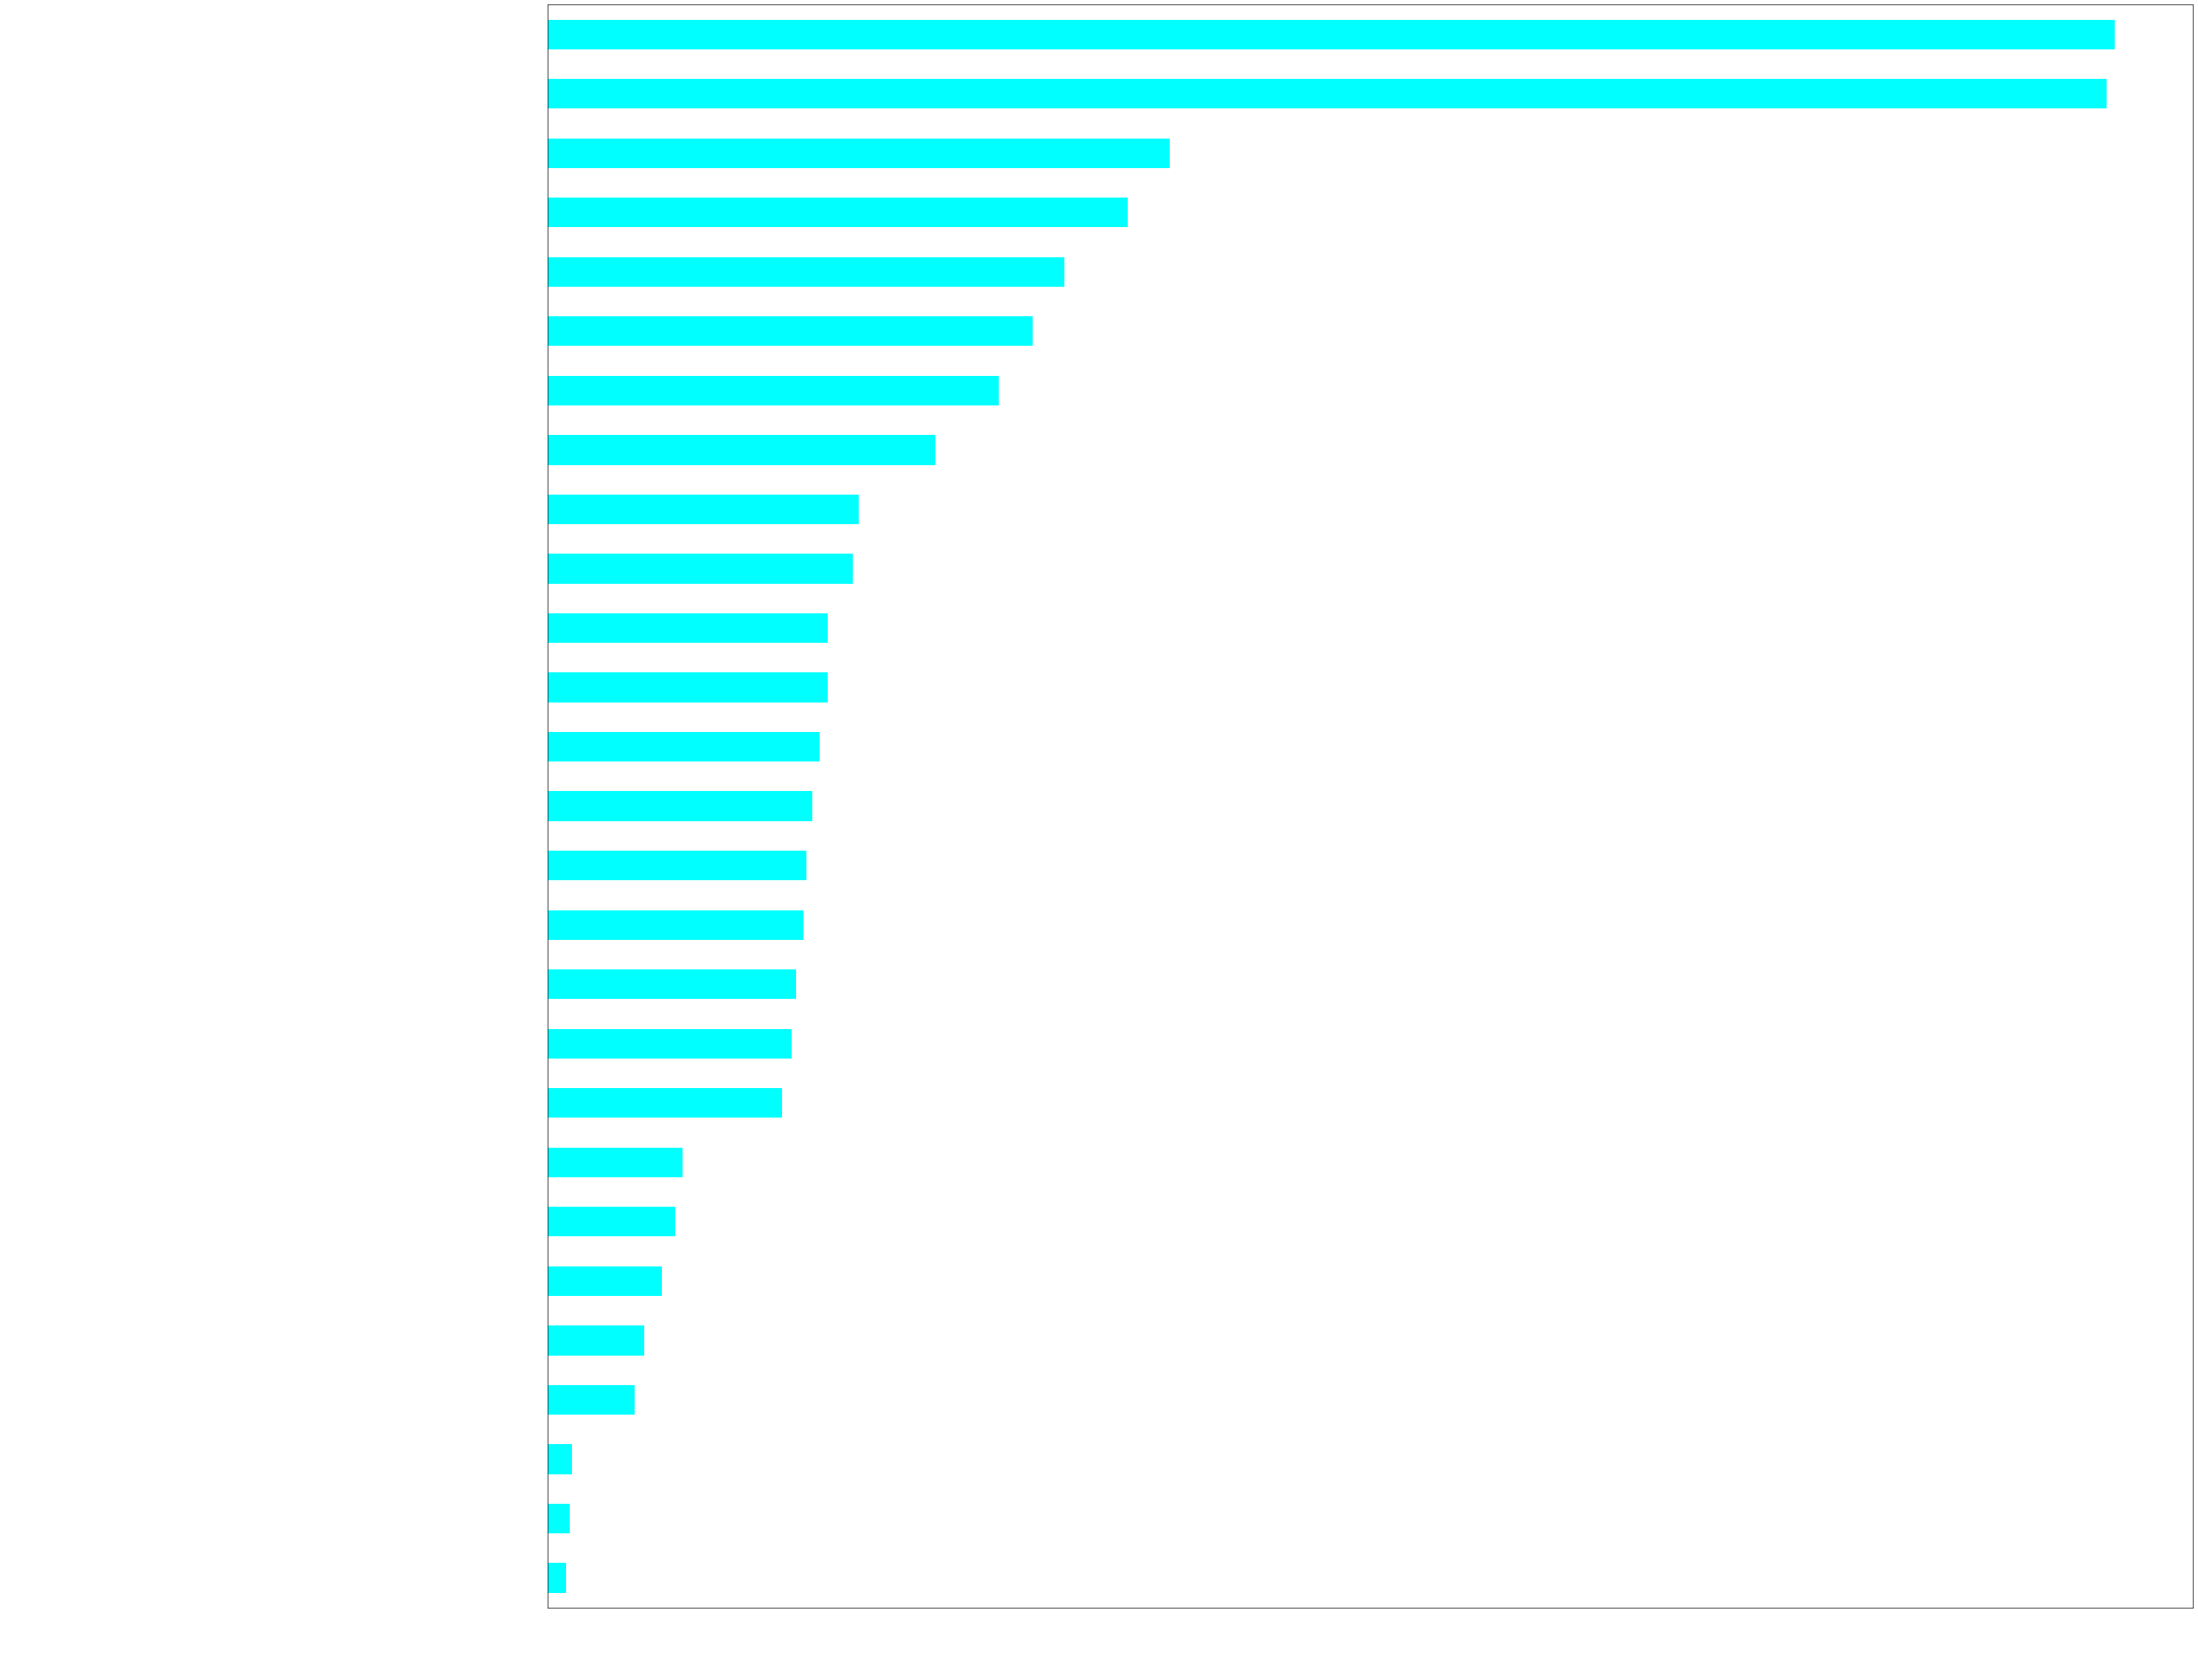

In [80]:
# Create a pd.Series of features importances
importances_Model_2 = pd.Series(Model_2.feature_importances_, index = X_train.columns)
# Sort importances_rf
sorted_importances_Model_2 = importances_Model_2.sort_values()*100
# Make a horizontal bar plot
ax = plt.subplot(111)
ax.tick_params(colors='white',labelsize=40)
ax.set_xlabel("Percentage", color="white",size=40)
ax.set_ylabel("Features", color="white",size=40)
sorted_importances_Model_2.plot(kind='barh', color='cyan',figsize=(40,40));
plt.show()

Possiamo notare che 'Online Boarding' e 'Inflight Wifi Service' generano la maggior parte della soddisfazione con circa un 16% l'uno. Al terzo e quarto posto troviamo il tipo di viaggio 'Business' e 'Personal'. Coprendo entrambe le possibilità, ma non avendo una grande differenza di percentuali, non ci possono dare grandi informazioni su come migliorare il servizio. Servono probabilmente ulteriori dati di tipologia diversa. Possiamo vedere come tra le 3 classi 'Business', 'Eco' e 'Eco-plus' abbiano indici di influenza diversi sulla soddisfazione del cliente. Inoltre 'Inflight entertainment' 'Seat comfort' 'Ease of Online booking' e 'Leg room service' hanno un influenza che varia dal 6% al 4% nell'ordine in cui sono stati citati. Inoltre un la metrica riguardante la fedeltà di un cliente è inversamente proporzionale all'influenza sulla soddisfaizone. 